In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms, models
from tqdm import tqdm
import os
import time
import copy
# 數據預處理
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(960),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'valid': transforms.Compose([
        transforms.Resize(960),
        transforms.CenterCrop(960),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

data_dir = '/home/kevinluo/breast_density_classification/datasets'
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x), data_transforms[x]) for x in ['train', 'valid']}
dataloaders = {x: DataLoader(image_datasets[x], batch_size=6, shuffle=True, num_workers=4) for x in ['train', 'valid']}
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'valid']}
class_names = image_datasets['train'].classes

device = torch.device("cuda:1" if torch.cuda.is_available() else "cpu")

# 使用DenseNet169
model = models.densenet169(pretrained=True)
num_ftrs = model.classifier.in_features
model.classifier = nn.Linear(num_ftrs, 4)
model = model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)


In [3]:
def train_model(model, criterion, optimizer, num_epochs):
    since = time.time()

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    for epoch in range(num_epochs):
        print("Epoch {}/{}".format(epoch + 1, num_epochs))
        print("-" * 10)

        for phase in ["train", "valid"]:
            if phase == "train":
                model.train()
            else:
                model.eval()

            running_loss = 0.0
            running_corrects = 0

            for inputs, labels in tqdm(dataloaders[phase]):
                inputs = inputs.to(device)
                labels = labels.to(device)

                optimizer.zero_grad()

                with torch.set_grad_enabled(phase == "train"):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    if phase == "train":
                        loss.backward()
                        optimizer.step()

                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]

            print("{} Loss: {:.4f} Acc: {:.4f}".format(phase, epoch_loss, epoch_acc))

            if phase == "valid" and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())

    time_elapsed = time.time() - since
    print("Training complete in {:.0f}m {:.0f}s".format(time_elapsed // 60, time_elapsed % 60))
    print("Best validation accuracy: {:4f}".format(best_acc))

    model.load_state_dict(best_model_wts)
    return model

trained_model = train_model(model, criterion, optimizer, num_epochs=200)


Epoch 1/200
----------


100%|██████████| 701/701 [06:39<00:00,  1.75it/s]


train Loss: 1.1864 Acc: 0.4631


100%|██████████| 72/72 [00:14<00:00,  4.99it/s]


valid Loss: 0.9924 Acc: 0.5581
Epoch 2/200
----------


100%|██████████| 701/701 [07:23<00:00,  1.58it/s]


train Loss: 1.0213 Acc: 0.5537


100%|██████████| 72/72 [00:14<00:00,  5.08it/s]


valid Loss: 0.6738 Acc: 0.7209
Epoch 3/200
----------


100%|██████████| 701/701 [07:16<00:00,  1.61it/s]


train Loss: 0.9304 Acc: 0.6001


100%|██████████| 72/72 [00:14<00:00,  5.00it/s]


valid Loss: 0.7550 Acc: 0.6628
Epoch 4/200
----------


100%|██████████| 701/701 [07:27<00:00,  1.57it/s]


train Loss: 0.9072 Acc: 0.6032


100%|██████████| 72/72 [00:14<00:00,  4.84it/s]


valid Loss: 0.5670 Acc: 0.7860
Epoch 5/200
----------


100%|██████████| 701/701 [07:30<00:00,  1.56it/s]


train Loss: 0.8572 Acc: 0.6320


100%|██████████| 72/72 [00:15<00:00,  4.70it/s]


valid Loss: 0.7517 Acc: 0.6698
Epoch 6/200
----------


100%|██████████| 701/701 [07:28<00:00,  1.56it/s]


train Loss: 0.8470 Acc: 0.6346


100%|██████████| 72/72 [00:14<00:00,  4.97it/s]


valid Loss: 0.9588 Acc: 0.6512
Epoch 7/200
----------


100%|██████████| 701/701 [07:28<00:00,  1.56it/s]


train Loss: 0.7976 Acc: 0.6569


100%|██████████| 72/72 [00:14<00:00,  4.92it/s]


valid Loss: 0.6963 Acc: 0.6930
Epoch 8/200
----------


100%|██████████| 701/701 [07:28<00:00,  1.56it/s]


train Loss: 0.8142 Acc: 0.6372


100%|██████████| 72/72 [00:14<00:00,  4.95it/s]


valid Loss: 0.8686 Acc: 0.6116
Epoch 9/200
----------


100%|██████████| 701/701 [07:28<00:00,  1.56it/s]


train Loss: 0.7725 Acc: 0.6650


100%|██████████| 72/72 [00:15<00:00,  4.70it/s]


valid Loss: 0.7372 Acc: 0.6628
Epoch 10/200
----------


100%|██████████| 701/701 [07:29<00:00,  1.56it/s]


train Loss: 0.7572 Acc: 0.6736


100%|██████████| 72/72 [00:14<00:00,  4.97it/s]


valid Loss: 0.5784 Acc: 0.7674
Epoch 11/200
----------


100%|██████████| 701/701 [07:28<00:00,  1.56it/s]


train Loss: 0.7459 Acc: 0.6831


100%|██████████| 72/72 [00:15<00:00,  4.75it/s]


valid Loss: 0.5373 Acc: 0.7884
Epoch 12/200
----------


100%|██████████| 701/701 [07:29<00:00,  1.56it/s]


train Loss: 0.7474 Acc: 0.6828


100%|██████████| 72/72 [00:15<00:00,  4.72it/s]


valid Loss: 0.6595 Acc: 0.7419
Epoch 13/200
----------


100%|██████████| 701/701 [07:29<00:00,  1.56it/s]


train Loss: 0.7079 Acc: 0.6959


100%|██████████| 72/72 [00:14<00:00,  4.91it/s]


valid Loss: 0.5801 Acc: 0.7860
Epoch 14/200
----------


100%|██████████| 701/701 [07:28<00:00,  1.56it/s]


train Loss: 0.7097 Acc: 0.6902


100%|██████████| 72/72 [00:14<00:00,  4.99it/s]


valid Loss: 0.5939 Acc: 0.7488
Epoch 15/200
----------


100%|██████████| 701/701 [07:29<00:00,  1.56it/s]


train Loss: 0.6865 Acc: 0.7109


100%|██████████| 72/72 [00:14<00:00,  4.85it/s]


valid Loss: 0.6196 Acc: 0.7465
Epoch 16/200
----------


100%|██████████| 701/701 [07:30<00:00,  1.56it/s]


train Loss: 0.6677 Acc: 0.7164


100%|██████████| 72/72 [00:15<00:00,  4.78it/s]


valid Loss: 0.5062 Acc: 0.7930
Epoch 17/200
----------


100%|██████████| 701/701 [07:29<00:00,  1.56it/s]


train Loss: 0.6639 Acc: 0.7209


100%|██████████| 72/72 [00:15<00:00,  4.68it/s]


valid Loss: 0.6724 Acc: 0.7395
Epoch 18/200
----------


100%|██████████| 701/701 [07:27<00:00,  1.57it/s]


train Loss: 0.6794 Acc: 0.7175


100%|██████████| 72/72 [00:14<00:00,  4.89it/s]


valid Loss: 0.5287 Acc: 0.7791
Epoch 19/200
----------


100%|██████████| 701/701 [07:27<00:00,  1.57it/s]


train Loss: 0.6468 Acc: 0.7256


100%|██████████| 72/72 [00:14<00:00,  4.93it/s]


valid Loss: 0.5676 Acc: 0.7744
Epoch 20/200
----------


100%|██████████| 701/701 [07:27<00:00,  1.57it/s]


train Loss: 0.6258 Acc: 0.7344


100%|██████████| 72/72 [00:14<00:00,  4.91it/s]


valid Loss: 0.5176 Acc: 0.7698
Epoch 21/200
----------


100%|██████████| 701/701 [07:26<00:00,  1.57it/s]


train Loss: 0.6320 Acc: 0.7275


100%|██████████| 72/72 [00:14<00:00,  4.83it/s]


valid Loss: 1.1254 Acc: 0.6372
Epoch 22/200
----------


100%|██████████| 701/701 [07:27<00:00,  1.57it/s]


train Loss: 0.6247 Acc: 0.7363


100%|██████████| 72/72 [00:14<00:00,  5.00it/s]


valid Loss: 0.6139 Acc: 0.7233
Epoch 23/200
----------


100%|██████████| 701/701 [07:27<00:00,  1.57it/s]


train Loss: 0.6095 Acc: 0.7477


100%|██████████| 72/72 [00:14<00:00,  4.91it/s]


valid Loss: 1.1815 Acc: 0.5395
Epoch 24/200
----------


100%|██████████| 701/701 [07:26<00:00,  1.57it/s]


train Loss: 0.6232 Acc: 0.7328


100%|██████████| 72/72 [00:15<00:00,  4.77it/s]


valid Loss: 0.5351 Acc: 0.7837
Epoch 25/200
----------


100%|██████████| 701/701 [07:26<00:00,  1.57it/s]


train Loss: 0.5883 Acc: 0.7553


100%|██████████| 72/72 [00:15<00:00,  4.73it/s]


valid Loss: 1.1109 Acc: 0.6349
Epoch 26/200
----------


100%|██████████| 701/701 [07:26<00:00,  1.57it/s]


train Loss: 0.6032 Acc: 0.7518


100%|██████████| 72/72 [00:14<00:00,  4.87it/s]


valid Loss: 1.0869 Acc: 0.6279
Epoch 27/200
----------


100%|██████████| 701/701 [07:26<00:00,  1.57it/s]


train Loss: 0.5770 Acc: 0.7663


100%|██████████| 72/72 [00:14<00:00,  5.01it/s]


valid Loss: 0.5142 Acc: 0.7791
Epoch 28/200
----------


100%|██████████| 701/701 [07:25<00:00,  1.57it/s]


train Loss: 0.5627 Acc: 0.7589


100%|██████████| 72/72 [00:14<00:00,  4.96it/s]


valid Loss: 0.7325 Acc: 0.6837
Epoch 29/200
----------


100%|██████████| 701/701 [07:26<00:00,  1.57it/s]


train Loss: 0.5534 Acc: 0.7720


100%|██████████| 72/72 [00:14<00:00,  5.01it/s]


valid Loss: 0.5154 Acc: 0.8209
Epoch 30/200
----------


100%|██████████| 701/701 [07:27<00:00,  1.57it/s]


train Loss: 0.5448 Acc: 0.7767


100%|██████████| 72/72 [00:14<00:00,  4.99it/s]


valid Loss: 0.5107 Acc: 0.7674
Epoch 31/200
----------


100%|██████████| 701/701 [07:27<00:00,  1.57it/s]


train Loss: 0.5369 Acc: 0.7765


100%|██████████| 72/72 [00:14<00:00,  4.87it/s]


valid Loss: 0.5576 Acc: 0.7512
Epoch 32/200
----------


100%|██████████| 701/701 [07:25<00:00,  1.57it/s]


train Loss: 0.5256 Acc: 0.7872


100%|██████████| 72/72 [00:14<00:00,  4.96it/s]


valid Loss: 0.5382 Acc: 0.7791
Epoch 33/200
----------


100%|██████████| 701/701 [07:26<00:00,  1.57it/s]


train Loss: 0.5219 Acc: 0.7772


100%|██████████| 72/72 [00:14<00:00,  4.96it/s]


valid Loss: 0.4752 Acc: 0.8023
Epoch 34/200
----------


100%|██████████| 701/701 [07:26<00:00,  1.57it/s]


train Loss: 0.5155 Acc: 0.7915


100%|██████████| 72/72 [00:14<00:00,  4.92it/s]


valid Loss: 1.1489 Acc: 0.6116
Epoch 35/200
----------


100%|██████████| 701/701 [07:25<00:00,  1.57it/s]


train Loss: 0.5111 Acc: 0.7870


100%|██████████| 72/72 [00:14<00:00,  4.93it/s]


valid Loss: 0.4969 Acc: 0.7977
Epoch 36/200
----------


100%|██████████| 701/701 [07:26<00:00,  1.57it/s]


train Loss: 0.5095 Acc: 0.7936


100%|██████████| 72/72 [00:14<00:00,  4.91it/s]


valid Loss: 0.7706 Acc: 0.7302
Epoch 37/200
----------


100%|██████████| 701/701 [07:25<00:00,  1.57it/s]


train Loss: 0.5105 Acc: 0.7848


100%|██████████| 72/72 [00:14<00:00,  4.96it/s]


valid Loss: 0.5560 Acc: 0.7512
Epoch 38/200
----------


100%|██████████| 701/701 [07:27<00:00,  1.57it/s]


train Loss: 0.4924 Acc: 0.7948


100%|██████████| 72/72 [00:14<00:00,  4.98it/s]


valid Loss: 0.5087 Acc: 0.7907
Epoch 39/200
----------


100%|██████████| 701/701 [07:25<00:00,  1.57it/s]


train Loss: 0.4948 Acc: 0.7965


100%|██████████| 72/72 [00:14<00:00,  4.98it/s]


valid Loss: 0.8849 Acc: 0.7093
Epoch 40/200
----------


100%|██████████| 701/701 [07:26<00:00,  1.57it/s]


train Loss: 0.4907 Acc: 0.7934


100%|██████████| 72/72 [00:14<00:00,  5.00it/s]


valid Loss: 0.6669 Acc: 0.7442
Epoch 41/200
----------


100%|██████████| 701/701 [07:26<00:00,  1.57it/s]


train Loss: 0.4799 Acc: 0.8048


100%|██████████| 72/72 [00:14<00:00,  4.94it/s]


valid Loss: 0.5353 Acc: 0.7930
Epoch 42/200
----------


100%|██████████| 701/701 [07:26<00:00,  1.57it/s]


train Loss: 0.4741 Acc: 0.8088


100%|██████████| 72/72 [00:14<00:00,  4.91it/s]


valid Loss: 0.7507 Acc: 0.7767
Epoch 43/200
----------


100%|██████████| 701/701 [07:25<00:00,  1.57it/s]


train Loss: 0.4769 Acc: 0.8088


100%|██████████| 72/72 [00:15<00:00,  4.79it/s]


valid Loss: 0.8075 Acc: 0.7465
Epoch 44/200
----------


100%|██████████| 701/701 [07:26<00:00,  1.57it/s]


train Loss: 0.4487 Acc: 0.8138


100%|██████████| 72/72 [00:14<00:00,  4.92it/s]


valid Loss: 0.5817 Acc: 0.8093
Epoch 45/200
----------


100%|██████████| 701/701 [07:25<00:00,  1.57it/s]


train Loss: 0.4632 Acc: 0.8105


100%|██████████| 72/72 [00:14<00:00,  4.93it/s]


valid Loss: 0.6014 Acc: 0.7558
Epoch 46/200
----------


100%|██████████| 701/701 [07:26<00:00,  1.57it/s]


train Loss: 0.4430 Acc: 0.8184


100%|██████████| 72/72 [00:14<00:00,  4.97it/s]


valid Loss: 0.5827 Acc: 0.7558
Epoch 47/200
----------


100%|██████████| 701/701 [07:26<00:00,  1.57it/s]


train Loss: 0.4288 Acc: 0.8264


100%|██████████| 72/72 [00:14<00:00,  4.99it/s]


valid Loss: 0.6794 Acc: 0.7628
Epoch 48/200
----------


100%|██████████| 701/701 [07:27<00:00,  1.57it/s]


train Loss: 0.4596 Acc: 0.8027


100%|██████████| 72/72 [00:14<00:00,  4.94it/s]


valid Loss: 0.5991 Acc: 0.7395
Epoch 49/200
----------


100%|██████████| 701/701 [07:25<00:00,  1.57it/s]


train Loss: 0.4189 Acc: 0.8314


100%|██████████| 72/72 [00:14<00:00,  4.91it/s]


valid Loss: 0.5187 Acc: 0.8047
Epoch 50/200
----------


100%|██████████| 701/701 [07:26<00:00,  1.57it/s]


train Loss: 0.4380 Acc: 0.8226


100%|██████████| 72/72 [00:14<00:00,  4.94it/s]


valid Loss: 0.6435 Acc: 0.7814
Epoch 51/200
----------


100%|██████████| 701/701 [07:25<00:00,  1.57it/s]


train Loss: 0.4411 Acc: 0.8191


100%|██████████| 72/72 [00:14<00:00,  5.00it/s]


valid Loss: 0.7037 Acc: 0.7395
Epoch 52/200
----------


100%|██████████| 701/701 [07:25<00:00,  1.57it/s]


train Loss: 0.4101 Acc: 0.8350


100%|██████████| 72/72 [00:14<00:00,  4.89it/s]


valid Loss: 0.5990 Acc: 0.7860
Epoch 53/200
----------


100%|██████████| 701/701 [07:26<00:00,  1.57it/s]


train Loss: 0.3999 Acc: 0.8355


100%|██████████| 72/72 [00:14<00:00,  4.91it/s]


valid Loss: 0.8175 Acc: 0.7581
Epoch 54/200
----------


100%|██████████| 701/701 [07:26<00:00,  1.57it/s]


train Loss: 0.4243 Acc: 0.8241


100%|██████████| 72/72 [00:14<00:00,  4.82it/s]


valid Loss: 0.5782 Acc: 0.7884
Epoch 55/200
----------


100%|██████████| 701/701 [07:25<00:00,  1.57it/s]


train Loss: 0.4150 Acc: 0.8269


100%|██████████| 72/72 [00:14<00:00,  4.84it/s]


valid Loss: 0.6178 Acc: 0.8000
Epoch 56/200
----------


100%|██████████| 701/701 [07:25<00:00,  1.57it/s]


train Loss: 0.3872 Acc: 0.8352


100%|██████████| 72/72 [00:14<00:00,  4.93it/s]


valid Loss: 0.6929 Acc: 0.7605
Epoch 57/200
----------


100%|██████████| 701/701 [07:26<00:00,  1.57it/s]


train Loss: 0.4104 Acc: 0.8331


100%|██████████| 72/72 [00:14<00:00,  4.99it/s]


valid Loss: 0.6294 Acc: 0.7558
Epoch 58/200
----------


100%|██████████| 701/701 [07:26<00:00,  1.57it/s]


train Loss: 0.3922 Acc: 0.8402


100%|██████████| 72/72 [00:14<00:00,  5.04it/s]


valid Loss: 0.7323 Acc: 0.7605
Epoch 59/200
----------


100%|██████████| 701/701 [07:26<00:00,  1.57it/s]


train Loss: 0.3965 Acc: 0.8412


100%|██████████| 72/72 [00:14<00:00,  4.91it/s]


valid Loss: 0.7395 Acc: 0.7674
Epoch 60/200
----------


100%|██████████| 701/701 [07:26<00:00,  1.57it/s]


train Loss: 0.3767 Acc: 0.8428


100%|██████████| 72/72 [00:14<00:00,  4.93it/s]


valid Loss: 0.4640 Acc: 0.8326
Epoch 61/200
----------


100%|██████████| 701/701 [07:25<00:00,  1.57it/s]


train Loss: 0.3877 Acc: 0.8457


100%|██████████| 72/72 [00:14<00:00,  4.95it/s]


valid Loss: 0.6873 Acc: 0.7698
Epoch 62/200
----------


100%|██████████| 701/701 [07:26<00:00,  1.57it/s]


train Loss: 0.4015 Acc: 0.8424


100%|██████████| 72/72 [00:14<00:00,  4.99it/s]


valid Loss: 0.5677 Acc: 0.7837
Epoch 63/200
----------


100%|██████████| 701/701 [07:28<00:00,  1.56it/s]


train Loss: 0.3594 Acc: 0.8531


100%|██████████| 72/72 [00:14<00:00,  4.95it/s]


valid Loss: 0.6084 Acc: 0.8163
Epoch 64/200
----------


100%|██████████| 701/701 [07:27<00:00,  1.57it/s]


train Loss: 0.3757 Acc: 0.8493


100%|██████████| 72/72 [00:14<00:00,  4.89it/s]


valid Loss: 0.6893 Acc: 0.7698
Epoch 65/200
----------


100%|██████████| 701/701 [07:26<00:00,  1.57it/s]


train Loss: 0.3708 Acc: 0.8485


100%|██████████| 72/72 [00:14<00:00,  4.99it/s]


valid Loss: 0.5685 Acc: 0.8186
Epoch 66/200
----------


100%|██████████| 701/701 [07:26<00:00,  1.57it/s]


train Loss: 0.3603 Acc: 0.8502


100%|██████████| 72/72 [00:14<00:00,  4.96it/s]


valid Loss: 1.0229 Acc: 0.7047
Epoch 67/200
----------


100%|██████████| 701/701 [07:25<00:00,  1.57it/s]


train Loss: 0.3705 Acc: 0.8488


100%|██████████| 72/72 [00:14<00:00,  4.99it/s]


valid Loss: 0.8761 Acc: 0.7163
Epoch 68/200
----------


100%|██████████| 701/701 [07:26<00:00,  1.57it/s]


train Loss: 0.3577 Acc: 0.8562


100%|██████████| 72/72 [00:14<00:00,  4.98it/s]


valid Loss: 0.5330 Acc: 0.8209
Epoch 69/200
----------


100%|██████████| 701/701 [07:26<00:00,  1.57it/s]


train Loss: 0.3462 Acc: 0.8600


100%|██████████| 72/72 [00:14<00:00,  4.86it/s]


valid Loss: 0.6082 Acc: 0.7791
Epoch 70/200
----------


100%|██████████| 701/701 [07:26<00:00,  1.57it/s]


train Loss: 0.3629 Acc: 0.8576


100%|██████████| 72/72 [00:14<00:00,  4.89it/s]


valid Loss: 0.9458 Acc: 0.6698
Epoch 71/200
----------


100%|██████████| 701/701 [07:26<00:00,  1.57it/s]


train Loss: 0.3589 Acc: 0.8562


100%|██████████| 72/72 [00:14<00:00,  4.90it/s]


valid Loss: 0.5433 Acc: 0.8349
Epoch 72/200
----------


100%|██████████| 701/701 [07:26<00:00,  1.57it/s]


train Loss: 0.3390 Acc: 0.8638


100%|██████████| 72/72 [00:14<00:00,  4.96it/s]


valid Loss: 0.6696 Acc: 0.7628
Epoch 73/200
----------


100%|██████████| 701/701 [07:26<00:00,  1.57it/s]


train Loss: 0.3389 Acc: 0.8652


100%|██████████| 72/72 [00:14<00:00,  4.87it/s]


valid Loss: 0.6893 Acc: 0.7419
Epoch 74/200
----------


100%|██████████| 701/701 [07:26<00:00,  1.57it/s]


train Loss: 0.3484 Acc: 0.8635


100%|██████████| 72/72 [00:14<00:00,  4.90it/s]


valid Loss: 0.6938 Acc: 0.7884
Epoch 75/200
----------


100%|██████████| 701/701 [07:25<00:00,  1.57it/s]


train Loss: 0.3298 Acc: 0.8718


100%|██████████| 72/72 [00:15<00:00,  4.72it/s]


valid Loss: 0.6048 Acc: 0.7907
Epoch 76/200
----------


100%|██████████| 701/701 [07:26<00:00,  1.57it/s]


train Loss: 0.3209 Acc: 0.8728


100%|██████████| 72/72 [00:15<00:00,  4.80it/s]


valid Loss: 0.6117 Acc: 0.8070
Epoch 77/200
----------


100%|██████████| 701/701 [07:25<00:00,  1.57it/s]


train Loss: 0.3210 Acc: 0.8730


100%|██████████| 72/72 [00:14<00:00,  4.89it/s]


valid Loss: 0.8544 Acc: 0.7093
Epoch 78/200
----------


100%|██████████| 701/701 [07:26<00:00,  1.57it/s]


train Loss: 0.3279 Acc: 0.8707


100%|██████████| 72/72 [00:15<00:00,  4.79it/s]


valid Loss: 0.6151 Acc: 0.7930
Epoch 79/200
----------


100%|██████████| 701/701 [07:26<00:00,  1.57it/s]


train Loss: 0.3159 Acc: 0.8809


100%|██████████| 72/72 [00:14<00:00,  4.94it/s]


valid Loss: 0.7482 Acc: 0.7674
Epoch 80/200
----------


100%|██████████| 701/701 [07:27<00:00,  1.57it/s]


train Loss: 0.3301 Acc: 0.8688


100%|██████████| 72/72 [00:14<00:00,  4.92it/s]


valid Loss: 0.8080 Acc: 0.7419
Epoch 81/200
----------


100%|██████████| 701/701 [07:27<00:00,  1.57it/s]


train Loss: 0.3211 Acc: 0.8714


100%|██████████| 72/72 [00:14<00:00,  4.98it/s]


valid Loss: 0.9374 Acc: 0.7233
Epoch 82/200
----------


100%|██████████| 701/701 [07:26<00:00,  1.57it/s]


train Loss: 0.3189 Acc: 0.8757


100%|██████████| 72/72 [00:15<00:00,  4.76it/s]


valid Loss: 0.6613 Acc: 0.7791
Epoch 83/200
----------


100%|██████████| 701/701 [07:27<00:00,  1.57it/s]


train Loss: 0.3018 Acc: 0.8795


100%|██████████| 72/72 [00:14<00:00,  4.90it/s]


valid Loss: 0.6841 Acc: 0.7605
Epoch 84/200
----------


100%|██████████| 701/701 [07:26<00:00,  1.57it/s]


train Loss: 0.3118 Acc: 0.8771


100%|██████████| 72/72 [00:14<00:00,  4.84it/s]


valid Loss: 0.6796 Acc: 0.7907
Epoch 85/200
----------


100%|██████████| 701/701 [07:25<00:00,  1.57it/s]


train Loss: 0.3189 Acc: 0.8735


100%|██████████| 72/72 [00:14<00:00,  4.93it/s]


valid Loss: 0.5202 Acc: 0.8116
Epoch 86/200
----------


100%|██████████| 701/701 [07:26<00:00,  1.57it/s]


train Loss: 0.3182 Acc: 0.8742


100%|██████████| 72/72 [00:14<00:00,  4.91it/s]


valid Loss: 0.7592 Acc: 0.7581
Epoch 87/200
----------


100%|██████████| 701/701 [07:26<00:00,  1.57it/s]


train Loss: 0.3164 Acc: 0.8726


100%|██████████| 72/72 [00:14<00:00,  4.91it/s]


valid Loss: 0.8099 Acc: 0.7000
Epoch 88/200
----------


100%|██████████| 701/701 [07:25<00:00,  1.57it/s]


train Loss: 0.2927 Acc: 0.8845


100%|██████████| 72/72 [00:14<00:00,  4.97it/s]


valid Loss: 0.8424 Acc: 0.8023
Epoch 89/200
----------


100%|██████████| 701/701 [07:26<00:00,  1.57it/s]


train Loss: 0.3000 Acc: 0.8825


100%|██████████| 72/72 [00:15<00:00,  4.75it/s]


valid Loss: 0.6031 Acc: 0.7930
Epoch 90/200
----------


100%|██████████| 701/701 [07:26<00:00,  1.57it/s]


train Loss: 0.2781 Acc: 0.8935


100%|██████████| 72/72 [00:14<00:00,  4.87it/s]


valid Loss: 0.8205 Acc: 0.7628
Epoch 91/200
----------


100%|██████████| 701/701 [07:27<00:00,  1.57it/s]


train Loss: 0.2912 Acc: 0.8902


100%|██████████| 72/72 [00:14<00:00,  4.81it/s]


valid Loss: 0.6850 Acc: 0.7744
Epoch 92/200
----------


100%|██████████| 701/701 [07:27<00:00,  1.57it/s]


train Loss: 0.3009 Acc: 0.8776


100%|██████████| 72/72 [00:15<00:00,  4.72it/s]


valid Loss: 0.8043 Acc: 0.7953
Epoch 93/200
----------


100%|██████████| 701/701 [07:25<00:00,  1.57it/s]


train Loss: 0.2838 Acc: 0.8837


100%|██████████| 72/72 [00:14<00:00,  4.94it/s]


valid Loss: 0.8763 Acc: 0.7465
Epoch 94/200
----------


100%|██████████| 701/701 [07:27<00:00,  1.57it/s]


train Loss: 0.2689 Acc: 0.8928


100%|██████████| 72/72 [00:15<00:00,  4.67it/s]


valid Loss: 1.1732 Acc: 0.7209
Epoch 95/200
----------


100%|██████████| 701/701 [07:25<00:00,  1.57it/s]


train Loss: 0.2772 Acc: 0.8966


100%|██████████| 72/72 [00:14<00:00,  4.88it/s]


valid Loss: 0.6395 Acc: 0.7953
Epoch 96/200
----------


100%|██████████| 701/701 [07:26<00:00,  1.57it/s]


train Loss: 0.2781 Acc: 0.8906


100%|██████████| 72/72 [00:14<00:00,  4.83it/s]


valid Loss: 0.8097 Acc: 0.7744
Epoch 97/200
----------


100%|██████████| 701/701 [07:27<00:00,  1.57it/s]


train Loss: 0.2799 Acc: 0.8942


100%|██████████| 72/72 [00:15<00:00,  4.76it/s]


valid Loss: 0.9149 Acc: 0.7419
Epoch 98/200
----------


100%|██████████| 701/701 [07:27<00:00,  1.57it/s]


train Loss: 0.2647 Acc: 0.8968


100%|██████████| 72/72 [00:14<00:00,  4.94it/s]


valid Loss: 0.8504 Acc: 0.7581
Epoch 99/200
----------


100%|██████████| 701/701 [07:26<00:00,  1.57it/s]


train Loss: 0.2702 Acc: 0.8932


100%|██████████| 72/72 [00:15<00:00,  4.78it/s]


valid Loss: 0.6053 Acc: 0.7977
Epoch 100/200
----------


100%|██████████| 701/701 [07:25<00:00,  1.57it/s]


train Loss: 0.2656 Acc: 0.8994


100%|██████████| 72/72 [00:14<00:00,  4.95it/s]


valid Loss: 0.6549 Acc: 0.7814
Epoch 101/200
----------


100%|██████████| 701/701 [07:27<00:00,  1.57it/s]


train Loss: 0.2901 Acc: 0.8849


100%|██████████| 72/72 [00:14<00:00,  5.02it/s]


valid Loss: 0.5605 Acc: 0.8163
Epoch 102/200
----------


100%|██████████| 701/701 [07:27<00:00,  1.57it/s]


train Loss: 0.2674 Acc: 0.8963


100%|██████████| 72/72 [00:14<00:00,  4.99it/s]


valid Loss: 0.6586 Acc: 0.7953
Epoch 103/200
----------


100%|██████████| 701/701 [07:27<00:00,  1.57it/s]


train Loss: 0.2840 Acc: 0.8840


100%|██████████| 72/72 [00:14<00:00,  4.92it/s]


valid Loss: 1.1939 Acc: 0.6837
Epoch 104/200
----------


100%|██████████| 701/701 [07:27<00:00,  1.57it/s]


train Loss: 0.2845 Acc: 0.8885


100%|██████████| 72/72 [00:14<00:00,  4.89it/s]


valid Loss: 0.5985 Acc: 0.8186
Epoch 105/200
----------


100%|██████████| 701/701 [07:26<00:00,  1.57it/s]


train Loss: 0.2681 Acc: 0.8966


100%|██████████| 72/72 [00:14<00:00,  4.95it/s]


valid Loss: 0.6059 Acc: 0.8070
Epoch 106/200
----------


100%|██████████| 701/701 [07:26<00:00,  1.57it/s]


train Loss: 0.2697 Acc: 0.8961


100%|██████████| 72/72 [00:14<00:00,  4.82it/s]


valid Loss: 0.8280 Acc: 0.7860
Epoch 107/200
----------


100%|██████████| 701/701 [07:26<00:00,  1.57it/s]


train Loss: 0.2596 Acc: 0.8963


100%|██████████| 72/72 [00:14<00:00,  4.94it/s]


valid Loss: 0.7687 Acc: 0.7651
Epoch 108/200
----------


100%|██████████| 701/701 [07:26<00:00,  1.57it/s]


train Loss: 0.2625 Acc: 0.8947


100%|██████████| 72/72 [00:15<00:00,  4.77it/s]


valid Loss: 0.7071 Acc: 0.7930
Epoch 109/200
----------


100%|██████████| 701/701 [07:26<00:00,  1.57it/s]


train Loss: 0.2561 Acc: 0.8911


100%|██████████| 72/72 [00:14<00:00,  4.97it/s]


valid Loss: 0.7389 Acc: 0.7744
Epoch 110/200
----------


100%|██████████| 701/701 [07:27<00:00,  1.57it/s]


train Loss: 0.2396 Acc: 0.9080


100%|██████████| 72/72 [00:14<00:00,  4.93it/s]


valid Loss: 0.5364 Acc: 0.8140
Epoch 111/200
----------


100%|██████████| 701/701 [07:26<00:00,  1.57it/s]


train Loss: 0.2540 Acc: 0.9020


100%|██████████| 72/72 [00:15<00:00,  4.77it/s]


valid Loss: 0.6781 Acc: 0.7442
Epoch 112/200
----------


100%|██████████| 701/701 [07:26<00:00,  1.57it/s]


train Loss: 0.2526 Acc: 0.9035


100%|██████████| 72/72 [00:14<00:00,  4.96it/s]


valid Loss: 0.7254 Acc: 0.7837
Epoch 113/200
----------


100%|██████████| 701/701 [07:27<00:00,  1.57it/s]


train Loss: 0.2445 Acc: 0.9037


100%|██████████| 72/72 [00:14<00:00,  4.81it/s]


valid Loss: 1.0047 Acc: 0.7465
Epoch 114/200
----------


100%|██████████| 701/701 [07:26<00:00,  1.57it/s]


train Loss: 0.2450 Acc: 0.8999


100%|██████████| 72/72 [00:14<00:00,  5.03it/s]


valid Loss: 0.6464 Acc: 0.7860
Epoch 115/200
----------


100%|██████████| 701/701 [07:26<00:00,  1.57it/s]


train Loss: 0.2470 Acc: 0.9020


100%|██████████| 72/72 [00:14<00:00,  4.91it/s]


valid Loss: 0.5885 Acc: 0.8116
Epoch 116/200
----------


100%|██████████| 701/701 [07:26<00:00,  1.57it/s]


train Loss: 0.2417 Acc: 0.9035


100%|██████████| 72/72 [00:14<00:00,  4.99it/s]


valid Loss: 0.7222 Acc: 0.7907
Epoch 117/200
----------


100%|██████████| 701/701 [07:27<00:00,  1.57it/s]


train Loss: 0.2444 Acc: 0.9023


100%|██████████| 72/72 [00:14<00:00,  5.01it/s]


valid Loss: 0.7406 Acc: 0.7791
Epoch 118/200
----------


100%|██████████| 701/701 [07:26<00:00,  1.57it/s]


train Loss: 0.2406 Acc: 0.9108


100%|██████████| 72/72 [00:14<00:00,  4.94it/s]


valid Loss: 0.7950 Acc: 0.7884
Epoch 119/200
----------


100%|██████████| 701/701 [07:26<00:00,  1.57it/s]


train Loss: 0.2375 Acc: 0.9087


100%|██████████| 72/72 [00:14<00:00,  4.99it/s]


valid Loss: 0.7003 Acc: 0.7930
Epoch 120/200
----------


100%|██████████| 701/701 [07:28<00:00,  1.56it/s]


train Loss: 0.2456 Acc: 0.9011


100%|██████████| 72/72 [00:14<00:00,  4.95it/s]


valid Loss: 0.9378 Acc: 0.7767
Epoch 121/200
----------


100%|██████████| 701/701 [07:27<00:00,  1.57it/s]


train Loss: 0.2441 Acc: 0.9018


100%|██████████| 72/72 [00:14<00:00,  4.99it/s]


valid Loss: 0.7460 Acc: 0.8140
Epoch 122/200
----------


100%|██████████| 701/701 [07:26<00:00,  1.57it/s]


train Loss: 0.2231 Acc: 0.9139


100%|██████████| 72/72 [00:14<00:00,  4.81it/s]


valid Loss: 0.7407 Acc: 0.7791
Epoch 123/200
----------


100%|██████████| 701/701 [07:25<00:00,  1.57it/s]


train Loss: 0.2259 Acc: 0.9068


100%|██████████| 72/72 [00:15<00:00,  4.80it/s]


valid Loss: 0.9973 Acc: 0.7698
Epoch 124/200
----------


100%|██████████| 701/701 [07:26<00:00,  1.57it/s]


train Loss: 0.2229 Acc: 0.9089


100%|██████████| 72/72 [00:14<00:00,  4.98it/s]


valid Loss: 0.6598 Acc: 0.7791
Epoch 125/200
----------


100%|██████████| 701/701 [07:26<00:00,  1.57it/s]


train Loss: 0.2403 Acc: 0.9054


100%|██████████| 72/72 [00:14<00:00,  4.83it/s]


valid Loss: 0.5389 Acc: 0.8209
Epoch 126/200
----------


100%|██████████| 701/701 [07:26<00:00,  1.57it/s]


train Loss: 0.2317 Acc: 0.9113


100%|██████████| 72/72 [00:14<00:00,  5.02it/s]


valid Loss: 0.8565 Acc: 0.7884
Epoch 127/200
----------


100%|██████████| 701/701 [07:27<00:00,  1.57it/s]


train Loss: 0.2162 Acc: 0.9151


100%|██████████| 72/72 [00:14<00:00,  4.97it/s]


valid Loss: 0.7233 Acc: 0.7837
Epoch 128/200
----------


100%|██████████| 701/701 [07:27<00:00,  1.57it/s]


train Loss: 0.2271 Acc: 0.9149


100%|██████████| 72/72 [00:15<00:00,  4.75it/s]


valid Loss: 0.9573 Acc: 0.7535
Epoch 129/200
----------


100%|██████████| 701/701 [07:27<00:00,  1.57it/s]


train Loss: 0.2243 Acc: 0.9137


100%|██████████| 72/72 [00:14<00:00,  4.92it/s]


valid Loss: 0.8458 Acc: 0.7744
Epoch 130/200
----------


100%|██████████| 701/701 [07:26<00:00,  1.57it/s]


train Loss: 0.2303 Acc: 0.9108


100%|██████████| 72/72 [00:14<00:00,  4.87it/s]


valid Loss: 0.7734 Acc: 0.7814
Epoch 131/200
----------


100%|██████████| 701/701 [07:27<00:00,  1.57it/s]


train Loss: 0.2169 Acc: 0.9078


100%|██████████| 72/72 [00:14<00:00,  4.94it/s]


valid Loss: 1.3552 Acc: 0.6651
Epoch 132/200
----------


100%|██████████| 701/701 [07:26<00:00,  1.57it/s]


train Loss: 0.2187 Acc: 0.9154


100%|██████████| 72/72 [00:15<00:00,  4.79it/s]


valid Loss: 0.8307 Acc: 0.7791
Epoch 133/200
----------


100%|██████████| 701/701 [07:26<00:00,  1.57it/s]


train Loss: 0.2210 Acc: 0.9187


100%|██████████| 72/72 [00:15<00:00,  4.71it/s]


valid Loss: 0.8837 Acc: 0.7721
Epoch 134/200
----------


100%|██████████| 701/701 [07:25<00:00,  1.57it/s]


train Loss: 0.2115 Acc: 0.9163


100%|██████████| 72/72 [00:14<00:00,  4.92it/s]


valid Loss: 0.6883 Acc: 0.7814
Epoch 135/200
----------


100%|██████████| 701/701 [07:27<00:00,  1.56it/s]


train Loss: 0.2027 Acc: 0.9230


100%|██████████| 72/72 [00:14<00:00,  4.95it/s]


valid Loss: 0.7592 Acc: 0.7953
Epoch 136/200
----------


100%|██████████| 701/701 [07:27<00:00,  1.57it/s]


train Loss: 0.2217 Acc: 0.9137


100%|██████████| 72/72 [00:14<00:00,  4.96it/s]


valid Loss: 0.8293 Acc: 0.7814
Epoch 137/200
----------


100%|██████████| 701/701 [07:27<00:00,  1.57it/s]


train Loss: 0.2107 Acc: 0.9204


100%|██████████| 72/72 [00:14<00:00,  4.95it/s]


valid Loss: 0.7015 Acc: 0.8093
Epoch 138/200
----------


100%|██████████| 701/701 [07:27<00:00,  1.57it/s]


train Loss: 0.2155 Acc: 0.9120


100%|██████████| 72/72 [00:14<00:00,  4.95it/s]


valid Loss: 0.9447 Acc: 0.7233
Epoch 139/200
----------


100%|██████████| 701/701 [07:27<00:00,  1.56it/s]


train Loss: 0.2200 Acc: 0.9078


100%|██████████| 72/72 [00:14<00:00,  4.94it/s]


valid Loss: 0.6863 Acc: 0.8140
Epoch 140/200
----------


100%|██████████| 701/701 [07:27<00:00,  1.56it/s]


train Loss: 0.2247 Acc: 0.9127


100%|██████████| 72/72 [00:14<00:00,  4.87it/s]


valid Loss: 0.8194 Acc: 0.7721
Epoch 141/200
----------


100%|██████████| 701/701 [07:27<00:00,  1.57it/s]


train Loss: 0.2267 Acc: 0.9104


100%|██████████| 72/72 [00:15<00:00,  4.79it/s]


valid Loss: 0.9595 Acc: 0.7279
Epoch 142/200
----------


100%|██████████| 701/701 [07:28<00:00,  1.56it/s]


train Loss: 0.2160 Acc: 0.9182


100%|██████████| 72/72 [00:14<00:00,  5.02it/s]


valid Loss: 1.1073 Acc: 0.7233
Epoch 143/200
----------


100%|██████████| 701/701 [07:28<00:00,  1.56it/s]


train Loss: 0.2236 Acc: 0.9116


100%|██████████| 72/72 [00:14<00:00,  4.87it/s]


valid Loss: 0.8358 Acc: 0.7767
Epoch 144/200
----------


100%|██████████| 701/701 [07:27<00:00,  1.57it/s]


train Loss: 0.2113 Acc: 0.9163


100%|██████████| 72/72 [00:15<00:00,  4.77it/s]


valid Loss: 0.7112 Acc: 0.8000
Epoch 145/200
----------


100%|██████████| 701/701 [07:27<00:00,  1.57it/s]


train Loss: 0.2169 Acc: 0.9196


100%|██████████| 72/72 [00:14<00:00,  4.96it/s]


valid Loss: 0.8849 Acc: 0.7674
Epoch 146/200
----------


100%|██████████| 701/701 [07:28<00:00,  1.56it/s]


train Loss: 0.2226 Acc: 0.9125


100%|██████████| 72/72 [00:14<00:00,  4.92it/s]


valid Loss: 0.7801 Acc: 0.7558
Epoch 147/200
----------


100%|██████████| 701/701 [07:28<00:00,  1.56it/s]


train Loss: 0.1853 Acc: 0.9268


100%|██████████| 72/72 [00:14<00:00,  4.87it/s]


valid Loss: 0.7484 Acc: 0.7884
Epoch 148/200
----------


100%|██████████| 701/701 [07:31<00:00,  1.55it/s]


train Loss: 0.1916 Acc: 0.9239


100%|██████████| 72/72 [00:14<00:00,  4.92it/s]


valid Loss: 0.8897 Acc: 0.7698
Epoch 149/200
----------


100%|██████████| 701/701 [07:31<00:00,  1.55it/s]


train Loss: 0.2114 Acc: 0.9187


100%|██████████| 72/72 [00:14<00:00,  4.92it/s]


valid Loss: 0.7906 Acc: 0.7884
Epoch 150/200
----------


100%|██████████| 701/701 [07:30<00:00,  1.55it/s]


train Loss: 0.2124 Acc: 0.9144


100%|██████████| 72/72 [00:14<00:00,  4.86it/s]


valid Loss: 0.9857 Acc: 0.7395
Epoch 151/200
----------


100%|██████████| 701/701 [07:31<00:00,  1.55it/s]


train Loss: 0.1903 Acc: 0.9291


100%|██████████| 72/72 [00:15<00:00,  4.71it/s]


valid Loss: 0.7173 Acc: 0.7791
Epoch 152/200
----------


100%|██████████| 701/701 [07:28<00:00,  1.56it/s]


train Loss: 0.2164 Acc: 0.9187


100%|██████████| 72/72 [00:14<00:00,  4.90it/s]


valid Loss: 0.7890 Acc: 0.7651
Epoch 153/200
----------


100%|██████████| 701/701 [07:29<00:00,  1.56it/s]


train Loss: 0.2123 Acc: 0.9196


100%|██████████| 72/72 [00:14<00:00,  4.84it/s]


valid Loss: 0.7073 Acc: 0.8186
Epoch 154/200
----------


100%|██████████| 701/701 [07:30<00:00,  1.55it/s]


train Loss: 0.1842 Acc: 0.9277


100%|██████████| 72/72 [00:14<00:00,  4.89it/s]


valid Loss: 0.8828 Acc: 0.7628
Epoch 155/200
----------


100%|██████████| 701/701 [07:30<00:00,  1.56it/s]


train Loss: 0.1988 Acc: 0.9225


100%|██████████| 72/72 [00:15<00:00,  4.54it/s]


valid Loss: 0.7103 Acc: 0.7930
Epoch 156/200
----------


100%|██████████| 701/701 [07:29<00:00,  1.56it/s]


train Loss: 0.2206 Acc: 0.9089


100%|██████████| 72/72 [00:14<00:00,  4.97it/s]


valid Loss: 0.6523 Acc: 0.8209
Epoch 157/200
----------


100%|██████████| 701/701 [07:27<00:00,  1.57it/s]


train Loss: 0.1873 Acc: 0.9263


100%|██████████| 72/72 [00:15<00:00,  4.71it/s]


valid Loss: 0.8042 Acc: 0.7791
Epoch 158/200
----------


100%|██████████| 701/701 [07:27<00:00,  1.57it/s]


train Loss: 0.1974 Acc: 0.9211


100%|██████████| 72/72 [00:15<00:00,  4.74it/s]


valid Loss: 1.2679 Acc: 0.6698
Epoch 159/200
----------


100%|██████████| 701/701 [07:27<00:00,  1.57it/s]


train Loss: 0.1851 Acc: 0.9289


100%|██████████| 72/72 [00:14<00:00,  4.85it/s]


valid Loss: 0.7797 Acc: 0.7953
Epoch 160/200
----------


100%|██████████| 701/701 [07:27<00:00,  1.57it/s]


train Loss: 0.1981 Acc: 0.9213


100%|██████████| 72/72 [00:15<00:00,  4.79it/s]


valid Loss: 0.9940 Acc: 0.7605
Epoch 161/200
----------


100%|██████████| 701/701 [07:28<00:00,  1.56it/s]


train Loss: 0.1974 Acc: 0.9208


100%|██████████| 72/72 [00:14<00:00,  4.91it/s]


valid Loss: 0.9258 Acc: 0.7558
Epoch 162/200
----------


100%|██████████| 701/701 [07:27<00:00,  1.57it/s]


train Loss: 0.1866 Acc: 0.9256


100%|██████████| 72/72 [00:14<00:00,  4.92it/s]


valid Loss: 0.6988 Acc: 0.8093
Epoch 163/200
----------


100%|██████████| 701/701 [07:27<00:00,  1.57it/s]


train Loss: 0.1854 Acc: 0.9287


100%|██████████| 72/72 [00:14<00:00,  4.92it/s]


valid Loss: 0.7581 Acc: 0.8047
Epoch 164/200
----------


100%|██████████| 701/701 [07:29<00:00,  1.56it/s]


train Loss: 0.1913 Acc: 0.9299


100%|██████████| 72/72 [00:14<00:00,  4.89it/s]


valid Loss: 0.6426 Acc: 0.8023
Epoch 165/200
----------


100%|██████████| 701/701 [07:27<00:00,  1.57it/s]


train Loss: 0.1932 Acc: 0.9225


100%|██████████| 72/72 [00:15<00:00,  4.75it/s]


valid Loss: 0.9172 Acc: 0.7605
Epoch 166/200
----------


100%|██████████| 701/701 [07:31<00:00,  1.55it/s]


train Loss: 0.1895 Acc: 0.9261


100%|██████████| 72/72 [00:14<00:00,  4.84it/s]


valid Loss: 0.7043 Acc: 0.8070
Epoch 167/200
----------


100%|██████████| 701/701 [07:33<00:00,  1.54it/s]


train Loss: 0.1843 Acc: 0.9284


100%|██████████| 72/72 [00:14<00:00,  4.91it/s]


valid Loss: 0.8867 Acc: 0.7721
Epoch 168/200
----------


100%|██████████| 701/701 [07:21<00:00,  1.59it/s]


train Loss: 0.2015 Acc: 0.9204


100%|██████████| 72/72 [00:14<00:00,  5.00it/s]


valid Loss: 0.8511 Acc: 0.7558
Epoch 169/200
----------


100%|██████████| 701/701 [07:26<00:00,  1.57it/s]


train Loss: 0.1977 Acc: 0.9173


100%|██████████| 72/72 [00:14<00:00,  5.00it/s]


valid Loss: 0.8612 Acc: 0.7535
Epoch 170/200
----------


100%|██████████| 701/701 [07:28<00:00,  1.56it/s]


train Loss: 0.1800 Acc: 0.9263


100%|██████████| 72/72 [00:14<00:00,  4.82it/s]


valid Loss: 0.7894 Acc: 0.7930
Epoch 171/200
----------


100%|██████████| 701/701 [07:27<00:00,  1.56it/s]


train Loss: 0.1737 Acc: 0.9334


100%|██████████| 72/72 [00:15<00:00,  4.71it/s]


valid Loss: 0.6393 Acc: 0.8209
Epoch 172/200
----------


100%|██████████| 701/701 [07:27<00:00,  1.57it/s]


train Loss: 0.1868 Acc: 0.9256


100%|██████████| 72/72 [00:14<00:00,  4.81it/s]


valid Loss: 1.0187 Acc: 0.7535
Epoch 173/200
----------


100%|██████████| 701/701 [07:28<00:00,  1.56it/s]


train Loss: 0.1794 Acc: 0.9270


100%|██████████| 72/72 [00:14<00:00,  4.99it/s]


valid Loss: 0.8499 Acc: 0.7814
Epoch 174/200
----------


100%|██████████| 701/701 [07:28<00:00,  1.56it/s]


train Loss: 0.1894 Acc: 0.9303


100%|██████████| 72/72 [00:14<00:00,  4.84it/s]


valid Loss: 0.6702 Acc: 0.7907
Epoch 175/200
----------


100%|██████████| 701/701 [07:28<00:00,  1.56it/s]


train Loss: 0.1755 Acc: 0.9291


100%|██████████| 72/72 [00:14<00:00,  4.96it/s]


valid Loss: 0.8920 Acc: 0.7837
Epoch 176/200
----------


100%|██████████| 701/701 [07:28<00:00,  1.56it/s]


train Loss: 0.1805 Acc: 0.9280


100%|██████████| 72/72 [00:14<00:00,  4.99it/s]


valid Loss: 0.9915 Acc: 0.7628
Epoch 177/200
----------


100%|██████████| 701/701 [07:29<00:00,  1.56it/s]


train Loss: 0.1827 Acc: 0.9299


100%|██████████| 72/72 [00:14<00:00,  4.91it/s]


valid Loss: 0.7943 Acc: 0.8047
Epoch 178/200
----------


100%|██████████| 701/701 [07:28<00:00,  1.56it/s]


train Loss: 0.1818 Acc: 0.9280


100%|██████████| 72/72 [00:14<00:00,  4.93it/s]


valid Loss: 0.6628 Acc: 0.8093
Epoch 179/200
----------


100%|██████████| 701/701 [07:29<00:00,  1.56it/s]


train Loss: 0.1871 Acc: 0.9272


100%|██████████| 72/72 [00:14<00:00,  5.02it/s]


valid Loss: 0.6666 Acc: 0.8116
Epoch 180/200
----------


100%|██████████| 701/701 [07:27<00:00,  1.57it/s]


train Loss: 0.1737 Acc: 0.9289


100%|██████████| 72/72 [00:14<00:00,  4.94it/s]


valid Loss: 0.8353 Acc: 0.7977
Epoch 181/200
----------


100%|██████████| 701/701 [07:28<00:00,  1.56it/s]


train Loss: 0.1797 Acc: 0.9320


100%|██████████| 72/72 [00:15<00:00,  4.71it/s]


valid Loss: 0.7688 Acc: 0.7953
Epoch 182/200
----------


100%|██████████| 701/701 [07:27<00:00,  1.57it/s]


train Loss: 0.1689 Acc: 0.9308


100%|██████████| 72/72 [00:15<00:00,  4.75it/s]


valid Loss: 0.8114 Acc: 0.7837
Epoch 183/200
----------


100%|██████████| 701/701 [07:31<00:00,  1.55it/s]


train Loss: 0.1858 Acc: 0.9311


100%|██████████| 72/72 [00:14<00:00,  4.87it/s]


valid Loss: 0.8847 Acc: 0.7953
Epoch 184/200
----------


100%|██████████| 701/701 [07:29<00:00,  1.56it/s]


train Loss: 0.1744 Acc: 0.9349


100%|██████████| 72/72 [00:14<00:00,  5.10it/s]


valid Loss: 0.8452 Acc: 0.7837
Epoch 185/200
----------


100%|██████████| 701/701 [07:15<00:00,  1.61it/s]


train Loss: 0.1882 Acc: 0.9251


100%|██████████| 72/72 [00:14<00:00,  5.11it/s]


valid Loss: 0.8362 Acc: 0.8000
Epoch 186/200
----------


100%|██████████| 701/701 [07:16<00:00,  1.60it/s]


train Loss: 0.1622 Acc: 0.9341


100%|██████████| 72/72 [00:14<00:00,  5.11it/s]


valid Loss: 0.9869 Acc: 0.7558
Epoch 187/200
----------


100%|██████████| 701/701 [07:16<00:00,  1.60it/s]


train Loss: 0.1792 Acc: 0.9287


100%|██████████| 72/72 [00:14<00:00,  5.07it/s]


valid Loss: 0.7007 Acc: 0.8140
Epoch 188/200
----------


100%|██████████| 701/701 [07:15<00:00,  1.61it/s]


train Loss: 0.1701 Acc: 0.9291


100%|██████████| 72/72 [00:14<00:00,  5.13it/s]


valid Loss: 0.8082 Acc: 0.7953
Epoch 189/200
----------


100%|██████████| 701/701 [07:15<00:00,  1.61it/s]


train Loss: 0.1974 Acc: 0.9218


100%|██████████| 72/72 [00:14<00:00,  5.08it/s]


valid Loss: 1.0616 Acc: 0.7256
Epoch 190/200
----------


100%|██████████| 701/701 [07:15<00:00,  1.61it/s]


train Loss: 0.1866 Acc: 0.9272


100%|██████████| 72/72 [00:14<00:00,  5.07it/s]


valid Loss: 0.7369 Acc: 0.8023
Epoch 191/200
----------


100%|██████████| 701/701 [07:15<00:00,  1.61it/s]


train Loss: 0.1795 Acc: 0.9296


100%|██████████| 72/72 [00:14<00:00,  5.09it/s]


valid Loss: 0.7371 Acc: 0.7930
Epoch 192/200
----------


100%|██████████| 701/701 [07:15<00:00,  1.61it/s]


train Loss: 0.1742 Acc: 0.9296


100%|██████████| 72/72 [00:14<00:00,  5.10it/s]


valid Loss: 0.8249 Acc: 0.7279
Epoch 193/200
----------


100%|██████████| 701/701 [07:16<00:00,  1.61it/s]


train Loss: 0.1831 Acc: 0.9263


100%|██████████| 72/72 [00:14<00:00,  5.05it/s]


valid Loss: 0.9378 Acc: 0.7791
Epoch 194/200
----------


100%|██████████| 701/701 [07:14<00:00,  1.61it/s]


train Loss: 0.1720 Acc: 0.9360


100%|██████████| 72/72 [00:14<00:00,  5.02it/s]


valid Loss: 0.7616 Acc: 0.7977
Epoch 195/200
----------


100%|██████████| 701/701 [07:19<00:00,  1.60it/s]


train Loss: 0.1780 Acc: 0.9287


100%|██████████| 72/72 [00:14<00:00,  4.99it/s]


valid Loss: 0.7598 Acc: 0.7977
Epoch 196/200
----------


100%|██████████| 701/701 [07:29<00:00,  1.56it/s]


train Loss: 0.1757 Acc: 0.9308


100%|██████████| 72/72 [00:14<00:00,  4.87it/s]


valid Loss: 0.6614 Acc: 0.8349
Epoch 197/200
----------


100%|██████████| 701/701 [07:30<00:00,  1.56it/s]


train Loss: 0.1597 Acc: 0.9377


100%|██████████| 72/72 [00:15<00:00,  4.74it/s]


valid Loss: 0.8124 Acc: 0.8140
Epoch 198/200
----------


100%|██████████| 701/701 [07:30<00:00,  1.56it/s]


train Loss: 0.1624 Acc: 0.9368


100%|██████████| 72/72 [00:14<00:00,  4.83it/s]


valid Loss: 0.8090 Acc: 0.8093
Epoch 199/200
----------


100%|██████████| 701/701 [07:30<00:00,  1.56it/s]


train Loss: 0.1742 Acc: 0.9325


100%|██████████| 72/72 [00:15<00:00,  4.80it/s]


valid Loss: 0.8099 Acc: 0.8186
Epoch 200/200
----------


100%|██████████| 701/701 [07:28<00:00,  1.56it/s]


train Loss: 0.1735 Acc: 0.9308


100%|██████████| 72/72 [00:14<00:00,  5.01it/s]

valid Loss: 0.7212 Acc: 0.8209
Training complete in 1537m 24s
Best validation accuracy: 0.834884


In [6]:
torch.save(model.state_dict(), "0505DenseNet.pth") # 只保存模型的参数
torch.save(model, "0505DenseNet.pth") # 保存整个模型

In [8]:
test_corrects = 0
predictions = []
ground_truth = []

with torch.no_grad():
    for inputs, labels in tqdm(dataloaders["valid"]):
        inputs = inputs.to(device)
        labels = labels.to(device)
        outputs = trained_model(inputs)
        _, preds = torch.max(outputs, 1)

        test_corrects += torch.sum(preds == labels.data)
        predictions.extend(preds.cpu().numpy())
        ground_truth.extend(labels.cpu().numpy())
test_acc = test_corrects.double() / dataset_sizes["valid"]
print("Test accuracy: {:.4f}".format(test_acc))

100%|██████████| 72/72 [00:12<00:00,  5.66it/s]

Test accuracy: 0.8349


In [16]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report

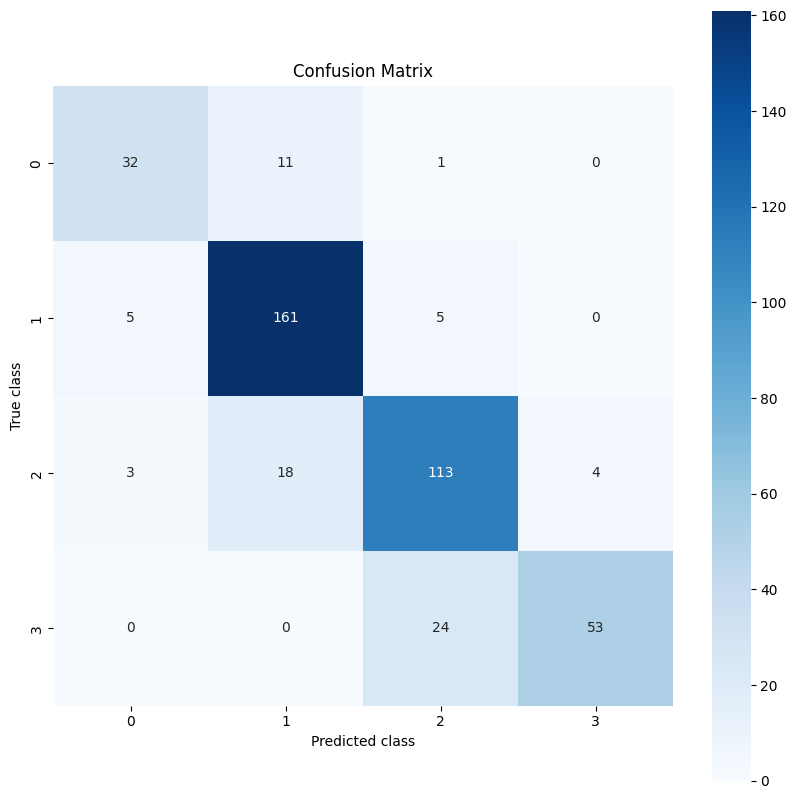

                 precision    recall  f1-score   support

breast_density1       0.80      0.73      0.76        44
breast_density2       0.85      0.94      0.89       171
breast_density3       0.79      0.82      0.80       138
breast_density4       0.93      0.69      0.79        77

       accuracy                           0.83       430
      macro avg       0.84      0.79      0.81       430
   weighted avg       0.84      0.83      0.83       430



: 

In [17]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report

cm = confusion_matrix(ground_truth, predictions)
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", square=True)
plt.xlabel("Predicted class")
plt.ylabel("True class")
plt.title("Confusion Matrix")
plt.show()

print(classification_report(ground_truth, predictions, target_names=class_names))

## 多加GradCAM並且改dataset

In [7]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms, models
from tqdm import tqdm
import os
import time
import copy
from torchcam.methods import GradCAM, ScoreCAM, XGradCAM
import cv2
from torch.optim import lr_scheduler
# 數據預處理
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(960),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'valid': transforms.Compose([
        transforms.Resize(960),
        transforms.CenterCrop(960),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

data_dir = '/home/kevinluo/breast_density_classification/ultralytics/data_withaugmentation'
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x), data_transforms[x]) for x in ['train', 'valid']}
dataloaders = {x: DataLoader(image_datasets[x], batch_size=6, shuffle=True, num_workers=4) for x in ['train', 'valid']}
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'valid']}
class_names = image_datasets['train'].classes

device = torch.device("cuda:1" if torch.cuda.is_available() else "cuda:2")

# 使用DenseNet169
model = models.densenet169(pretrained=True)
num_ftrs = model.classifier.in_features
model.classifier = nn.Linear(num_ftrs, 4)
model = model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.0001, momentum=0.923)
# scheduler = lr_scheduler.StepLR(optimizer)
scheduler = lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

In [8]:
def train_model(model, criterion, optimizer, num_epochs):
    since = time.time()

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    for epoch in range(num_epochs):
        print("Epoch {}/{}".format(epoch + 1, num_epochs))
        print("-" * 10)

        for phase in ["train", "valid"]:
            if phase == "train":
                model.train()
            else:
                model.eval()

            running_loss = 0.0
            running_corrects = 0

            for inputs, labels in tqdm(dataloaders[phase]):
                inputs = inputs.to(device)
                labels = labels.to(device)

                optimizer.zero_grad()

                with torch.set_grad_enabled(phase == "train"):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    if phase == "train":
                        loss.backward()
                        optimizer.step()

                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]

            print("{} Loss: {:.4f} Acc: {:.4f}".format(phase, epoch_loss, epoch_acc))

            if phase == "valid" and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())

    time_elapsed = time.time() - since
    print("Training complete in {:.0f}m {:.0f}s".format(time_elapsed // 60, time_elapsed % 60))
    print("Best validation accuracy: {:4f}".format(best_acc))

    model.load_state_dict(best_model_wts)
    return model

trained_model = train_model(model, criterion, optimizer, num_epochs=200)


Epoch 1/200
----------


  4%|▍         | 36/908 [00:50<19:21,  1.33s/it] 

## DenseNet + SE-block

In [1]:
# Import necessary libraries
import os
import time
import copy
import torch
import torchvision
from torchvision import datasets, models, transforms
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
from torch.utils.data import Dataset, DataLoader
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
from tqdm import tqdm
device = torch.device("cuda:1" if torch.cuda.is_available() else "cuda:2")
# Define the SEBlock
class SEBlock(nn.Module):
    def __init__(self, channel, reduction=16):
        super(SEBlock, self).__init__()
        self.avg_pool = nn.AdaptiveAvgPool2d(1)
        self.fc = nn.Sequential(
            nn.Linear(channel, channel // reduction, bias=False),
            nn.ReLU(inplace=True),
            nn.Linear(channel // reduction, channel, bias=False),
            nn.Sigmoid()
        )

    def forward(self, x):
        b, c, _, _ = x.size()
        y = self.avg_pool(x).view(b, c)
        y = self.fc(y).view(b, c, 1, 1)
        return x * y.expand_as(x)

# Load the pretrained DenseNet model and replace the last fully connected layer
model = models.densenet121(pretrained=True)
num_ftrs = model.classifier.in_features
model.classifier = nn.Linear(num_ftrs, 4)

# Add SEBlock to DenseNet
for name, module in model.named_modules():
    if isinstance(module, nn.Conv2d):
        setattr(module, "se", SEBlock(module.out_channels))

model = model.to(device)

# Set the parameters
data_dir = "/home/kevinluo/breast_density_classification/datasets"
num_epochs = 25
batch_size = 4
learning_rate = 0.001

# Set the transforms
data_transforms = {
    "train": transforms.Compose([
        transforms.Resize((1280, 1280)),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    "valid": transforms.Compose([
        transforms.Resize((1280, 1280)),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    "test": transforms.Compose([
        transforms.Resize((1280, 1280)),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}



/home/kevinluo/anaconda3/envs/yolov8/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/kevinluo/anaconda3/envs/yolov8/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DenseNet121_Weights.IMAGENET1K_V1`. You can also use `weights=DenseNet121_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


### 定義training model 和 evaluation model def

In [2]:
#train_model
from tqdm import tqdm

def train_model(model, criterion, optimizer, scheduler, num_epochs=25):
    since = time.time()

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch, num_epochs - 1))
        print('-' * 10)

        # Each epoch has a training and validation phase
        for phase in ['train', 'valid']:
            if phase == 'train':
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0

            # Iterate over data.
            for inputs, labels in tqdm(dataloaders[phase]):
                inputs = inputs.to(device)
                labels = labels.to(device)

                # zero the parameter gradients
                optimizer.zero_grad()

                # forward
                # track history if only in train
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    # backward + optimize only if in training phase
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                # statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            if phase == 'train':
                scheduler.step()

            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]

            print('{} Loss: {:.4f} Acc: {:.4f}'.format(
                phase, epoch_loss, epoch_acc))

            # deep copy the model
            if phase == 'valid' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())

        print()

    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(
        time_elapsed // 60, time_elapsed % 60))
    print('Best val Acc: {:4f}'.format(best_acc))

    # load best model weights
    model.load_state_dict(best_model_wts)
    return model


#evaluate_model
def evaluate_model(model, dataloader, class_names):
    model.eval()  # set model to evaluation mode

    # Initialize the prediction and label lists
    predlist = torch.zeros(0, dtype=torch.long, device='cpu')
    lbllist = torch.zeros(0, dtype=torch.long, device='cpu')

    with torch.no_grad():
        for inputs, labels in tqdm(dataloader):
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs)  # forward pass
            _, preds = torch.max(outputs, 1)

            # Append batch prediction results
            predlist = torch.cat([predlist, preds.view(-1).cpu()])
            lbllist = torch.cat([lbllist, labels.view(-1).cpu()])

    # Confusion matrix
    conf_mat = confusion_matrix(lbllist.numpy(), predlist.numpy())
    plt.figure(figsize=(10, 10))
    sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.savefig('confusion_matrix.png')
    plt.show()

    # Classification report
    class_report = classification_report(lbllist.numpy(), predlist.numpy(), target_names=class_names)
    print(class_report)


Epoch 0/24
----------


100%|██████████| 1052/1052 [09:45<00:00,  1.80it/s]


train Loss: 1.1191 Acc: 0.5059


100%|██████████| 108/108 [00:19<00:00,  5.55it/s]


valid Loss: 0.8361 Acc: 0.6581

Epoch 1/24
----------


100%|██████████| 1052/1052 [10:11<00:00,  1.72it/s]


train Loss: 0.9335 Acc: 0.6037


100%|██████████| 108/108 [00:19<00:00,  5.58it/s]


valid Loss: 0.7696 Acc: 0.6884

Epoch 2/24
----------


100%|██████████| 1052/1052 [10:11<00:00,  1.72it/s]


train Loss: 0.8482 Acc: 0.6369


100%|██████████| 108/108 [00:19<00:00,  5.61it/s]


valid Loss: 0.9248 Acc: 0.6140

Epoch 3/24
----------


100%|██████████| 1052/1052 [10:09<00:00,  1.72it/s]


train Loss: 0.7887 Acc: 0.6695


100%|██████████| 108/108 [00:19<00:00,  5.52it/s]


valid Loss: 0.5707 Acc: 0.7814

Epoch 4/24
----------


100%|██████████| 1052/1052 [10:10<00:00,  1.72it/s]


train Loss: 0.7525 Acc: 0.6850


100%|██████████| 108/108 [00:19<00:00,  5.47it/s]


valid Loss: 0.5398 Acc: 0.7930

Epoch 5/24
----------


100%|██████████| 1052/1052 [10:14<00:00,  1.71it/s]


train Loss: 0.7021 Acc: 0.7038


100%|██████████| 108/108 [00:19<00:00,  5.46it/s]


valid Loss: 1.2399 Acc: 0.5465

Epoch 6/24
----------


100%|██████████| 1052/1052 [10:29<00:00,  1.67it/s]


train Loss: 0.6530 Acc: 0.7223


100%|██████████| 108/108 [00:19<00:00,  5.40it/s]


valid Loss: 0.6765 Acc: 0.6930

Epoch 7/24
----------


100%|██████████| 1052/1052 [10:15<00:00,  1.71it/s]


train Loss: 0.4923 Acc: 0.8024


100%|██████████| 108/108 [00:19<00:00,  5.49it/s]


valid Loss: 0.4579 Acc: 0.8163

Epoch 8/24
----------


100%|██████████| 1052/1052 [10:11<00:00,  1.72it/s]


train Loss: 0.4681 Acc: 0.8231


100%|██████████| 108/108 [00:19<00:00,  5.52it/s]


valid Loss: 0.4569 Acc: 0.8186

Epoch 9/24
----------


100%|██████████| 1052/1052 [10:11<00:00,  1.72it/s]


train Loss: 0.4412 Acc: 0.8255


100%|██████████| 108/108 [00:19<00:00,  5.42it/s]


valid Loss: 0.4796 Acc: 0.8256

Epoch 10/24
----------


100%|██████████| 1052/1052 [10:11<00:00,  1.72it/s]


train Loss: 0.4162 Acc: 0.8398


100%|██████████| 108/108 [00:19<00:00,  5.56it/s]


valid Loss: 0.4491 Acc: 0.8163

Epoch 11/24
----------


100%|██████████| 1052/1052 [10:10<00:00,  1.72it/s]


train Loss: 0.3905 Acc: 0.8497


100%|██████████| 108/108 [00:19<00:00,  5.49it/s]


valid Loss: 0.4768 Acc: 0.8256

Epoch 12/24
----------


100%|██████████| 1052/1052 [10:10<00:00,  1.72it/s]


train Loss: 0.3763 Acc: 0.8543


100%|██████████| 108/108 [00:19<00:00,  5.52it/s]


valid Loss: 0.4438 Acc: 0.8302

Epoch 13/24
----------


100%|██████████| 1052/1052 [10:09<00:00,  1.73it/s]


train Loss: 0.3652 Acc: 0.8638


100%|██████████| 108/108 [00:19<00:00,  5.52it/s]


valid Loss: 0.4482 Acc: 0.8442

Epoch 14/24
----------


100%|██████████| 1052/1052 [10:10<00:00,  1.72it/s]


train Loss: 0.3337 Acc: 0.8749


100%|██████████| 108/108 [00:19<00:00,  5.52it/s]


valid Loss: 0.4562 Acc: 0.8442

Epoch 15/24
----------


100%|██████████| 1052/1052 [10:10<00:00,  1.72it/s]


train Loss: 0.3315 Acc: 0.8768


100%|██████████| 108/108 [00:19<00:00,  5.44it/s]


valid Loss: 0.4311 Acc: 0.8349

Epoch 16/24
----------


100%|██████████| 1052/1052 [10:10<00:00,  1.72it/s]


train Loss: 0.3275 Acc: 0.8875


100%|██████████| 108/108 [00:19<00:00,  5.52it/s]


valid Loss: 0.4340 Acc: 0.8326

Epoch 17/24
----------


100%|██████████| 1052/1052 [10:10<00:00,  1.72it/s]


train Loss: 0.3218 Acc: 0.8833


100%|██████████| 108/108 [00:19<00:00,  5.45it/s]


valid Loss: 0.4586 Acc: 0.8419

Epoch 18/24
----------


100%|██████████| 1052/1052 [10:09<00:00,  1.73it/s]


train Loss: 0.3263 Acc: 0.8842


100%|██████████| 108/108 [00:19<00:00,  5.51it/s]


valid Loss: 0.4286 Acc: 0.8419

Epoch 19/24
----------


100%|██████████| 1052/1052 [10:12<00:00,  1.72it/s]


train Loss: 0.3293 Acc: 0.8837


100%|██████████| 108/108 [00:19<00:00,  5.50it/s]


valid Loss: 0.4461 Acc: 0.8535

Epoch 20/24
----------


100%|██████████| 1052/1052 [10:28<00:00,  1.67it/s]


train Loss: 0.3211 Acc: 0.8823


100%|██████████| 108/108 [00:19<00:00,  5.47it/s]


valid Loss: 0.4559 Acc: 0.8395

Epoch 21/24
----------


100%|██████████| 1052/1052 [10:11<00:00,  1.72it/s]


train Loss: 0.3122 Acc: 0.8897


100%|██████████| 108/108 [00:19<00:00,  5.52it/s]


valid Loss: 0.4534 Acc: 0.8256

Epoch 22/24
----------


100%|██████████| 1052/1052 [10:10<00:00,  1.72it/s]


train Loss: 0.3156 Acc: 0.8873


100%|██████████| 108/108 [00:19<00:00,  5.55it/s]


valid Loss: 0.4371 Acc: 0.8372

Epoch 23/24
----------


100%|██████████| 1052/1052 [10:08<00:00,  1.73it/s]


train Loss: 0.3121 Acc: 0.8951


100%|██████████| 108/108 [00:19<00:00,  5.58it/s]


valid Loss: 0.4289 Acc: 0.8372

Epoch 24/24
----------


100%|██████████| 1052/1052 [10:12<00:00,  1.72it/s]


train Loss: 0.3216 Acc: 0.8856


100%|██████████| 108/108 [00:19<00:00,  5.52it/s]


valid Loss: 0.4436 Acc: 0.8326

Training complete in 263m 0s
Best val Acc: 0.853488


100%|██████████| 113/113 [00:20<00:00,  5.58it/s]


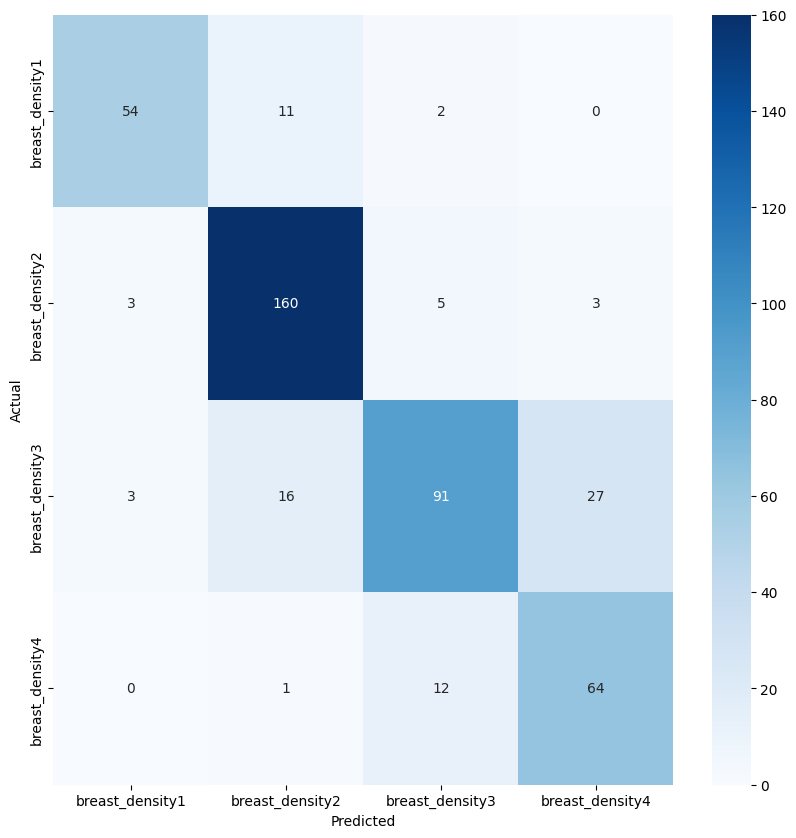

                 precision    recall  f1-score   support

breast_density1       0.90      0.81      0.85        67
breast_density2       0.85      0.94      0.89       171
breast_density3       0.83      0.66      0.74       137
breast_density4       0.68      0.83      0.75        77

       accuracy                           0.82       452
      macro avg       0.81      0.81      0.81       452
   weighted avg       0.82      0.82      0.81       452



In [3]:

# Load the datasets
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x), data_transforms[x]) for x in ["train", "valid", "test"]}

# Create data loaders
dataloaders = {x: DataLoader(image_datasets[x], batch_size=batch_size, shuffle=True, num_workers=4) for x in ["train", "valid", "test"]}

# Get the dataset sizes
dataset_sizes = {x: len(image_datasets[x]) for x in ["train", "valid", "test"]}

# Get the class names
class_names = image_datasets["train"].classes

# Set device to GPU or CPU
#device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Set the criterion and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9)

# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

# Train the model
model = train_model(model, criterion, optimizer, exp_lr_scheduler, num_epochs=num_epochs)

# Evaluate the model
evaluate_model(model, dataloaders["test"], class_names)

# Save the model
torch.save(model.state_dict(), "model_with_se_block.pth")


In [5]:
torch.save(model.state_dict(), "0515DenseNet-SE.pth") # 只保存模型的参数
torch.save(model, "0515DenseNet-SE.pth") # 保存整个模型

# change data distribution and MLflow

In [19]:
import mlflow
from datetime import datetime
from torchvision.models import densenet169
import numpy as np

## Set up tracking server ip

In [20]:
mlflow.set_tracking_uri("http://localhost:5000/")

## Create Experiment

In [21]:
EXPERIMENT_NAME = "0608_Breast_density_with_SE-attention_10fold_balanced_data"

experiment_id = mlflow.get_experiment_by_name(EXPERIMENT_NAME)  # check if the experiment is already exist
if not experiment_id:
    experiment_id = mlflow.create_experiment(EXPERIMENT_NAME)
else:
    experiment_id = experiment_id.experiment_id

In [22]:
model = densenet169()

## Start a run

In [23]:
mlflow.start_run(
    experiment_id=experiment_id,
    run_name=f'test_{datetime.now().strftime("%Y-%m-%d")}',
    tags={
        "type": "breast_density",
        "task": "mammogram_BD_level"
    }
)

<ActiveRun: >

In [24]:
# Import necessary libraries
import os
import time
import copy
import torch
import torchvision
from torchvision import datasets, models, transforms
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
from torch.utils.data import Dataset, DataLoader
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
from tqdm import tqdm
device = torch.device("cuda:1" if torch.cuda.is_available() else "cuda:0")
# Define the SEBlock
class SEBlock(nn.Module):
    def __init__(self, channel, reduction=16):
        super(SEBlock, self).__init__()
        self.avg_pool = nn.AdaptiveAvgPool2d(1)
        self.fc = nn.Sequential(
            nn.Linear(channel, channel // reduction, bias=False),
            nn.ReLU(inplace=True),
            nn.Linear(channel // reduction, channel, bias=False),
            nn.Sigmoid()
        )

    def forward(self, x):
        b, c, _, _ = x.size()
        y = self.avg_pool(x).view(b, c)
        y = self.fc(y).view(b, c, 1, 1)
        return x * y.expand_as(x)

# Load the pretrained DenseNet model and replace the last fully connected layer
model = models.densenet169(pretrained=True)
num_ftrs = model.classifier.in_features
model.classifier = nn.Linear(num_ftrs, 4)

# Add SEBlock to DenseNet
for name, module in model.named_modules():
    if isinstance(module, nn.Conv2d):
        setattr(module, "se", SEBlock(module.out_channels))

model = model.to(device)

# Set the parameters
data_dir = "/home/kevinluo/breast_density_classification/BD_data_newdis"
num_epochs = 50
batch_size = 8
learning_rate = 0.001

# Set the transforms
data_transforms = {
    "train": transforms.Compose([
        transforms.Resize((960, 960)),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    "valid": transforms.Compose([
        transforms.Resize((960, 960)),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    "test": transforms.Compose([
        transforms.Resize((960, 960)),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}



/home/kevinluo/anaconda3/envs/yolov8/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/kevinluo/anaconda3/envs/yolov8/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DenseNet169_Weights.IMAGENET1K_V1`. You can also use `weights=DenseNet169_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


## log hyper parameteras

In [25]:
epochs = 50
batch_size = 8
lr = 0.001
size = 960
mlflow.log_params(
    {
        "epochs": epochs,
        "batch_size": batch_size,
        "lr": lr,
        "size": size
    }
)

In [10]:
# #train_model
# from tqdm import tqdm

# def train_model(model, criterion, optimizer, scheduler, num_epochs=50):
#     since = time.time()

#     best_model_wts = copy.deepcopy(model.state_dict())
#     best_acc = 0.0

#     for epoch in range(num_epochs):
#         print('Epoch {}/{}'.format(epoch, num_epochs - 1))
#         print('-' * 10)

#         # Each epoch has a training and validation phase
#         for phase in ['train', 'valid']:
#             if phase == 'train':
#                 model.train()  # Set model to training mode
#             else:
#                 model.eval()   # Set model to evaluate mode

#             running_loss = 0.0
#             running_corrects = 0

#             # Iterate over data.
#             for inputs, labels in tqdm(dataloaders[phase]):
#                 inputs = inputs.to(device)
#                 labels = labels.to(device)

#                 # zero the parameter gradients
#                 optimizer.zero_grad()

#                 # forward
#                 # track history if only in train
#                 with torch.set_grad_enabled(phase == 'train'):
#                     outputs = model(inputs)
#                     _, preds = torch.max(outputs, 1)
#                     loss = criterion(outputs, labels)

#                     # backward + optimize only if in training phase
#                     if phase == 'train':
#                         loss.backward()
#                         optimizer.step()

#                 # statistics
#                 running_loss += loss.item() * inputs.size(0)
#                 running_corrects += torch.sum(preds == labels.data)

#             if phase == 'train':
#                 scheduler.step()

#             epoch_loss = running_loss / dataset_sizes[phase]
#             epoch_acc = running_corrects.double() / dataset_sizes[phase]

#             print('{} Loss: {:.4f} Acc: {:.4f}'.format(
#                 phase, epoch_loss, epoch_acc))
#             # Log metrics to MLflow
#             mlflow.log_metric("{}_loss".format(phase), epoch_loss, step=epoch)
#             mlflow.log_metric("{}_accuracy".format(phase), epoch_acc.item(), step=epoch)

#             # deep copy the model
#             if phase == 'valid' and epoch_acc > best_acc:
#                 best_acc = epoch_acc
#                 best_model_wts = copy.deepcopy(model.state_dict())

#         print()

#     time_elapsed = time.time() - since
#     print('Training complete in {:.0f}m {:.0f}s'.format(
#         time_elapsed // 60, time_elapsed % 60))
#     print('Best val Acc: {:4f}'.format(best_acc))

#     # load best model weights
#     model.load_state_dict(best_model_wts)
#     return model


# #evaluate_model
# def evaluate_model(model, dataloader, class_names):
#     model.eval()  # set model to evaluation mode

#     # Initialize the prediction and label lists
#     predlist = torch.zeros(0, dtype=torch.long, device='cpu')
#     lbllist = torch.zeros(0, dtype=torch.long, device='cpu')

#     with torch.no_grad():
#         for inputs, labels in tqdm(dataloader):
#             inputs = inputs.to(device)
#             labels = labels.to(device)

#             outputs = model(inputs)  # forward pass
#             _, preds = torch.max(outputs, 1)

#             # Append batch prediction results
#             predlist = torch.cat([predlist, preds.view(-1).cpu()])
#             lbllist = torch.cat([lbllist, labels.view(-1).cpu()])

#     # Confusion matrix
#     conf_mat = confusion_matrix(lbllist.numpy(), predlist.numpy())
#     plt.figure(figsize=(10, 10))
#     sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues',
#                 xticklabels=class_names, yticklabels=class_names)
#     plt.xlabel('Predicted')
#     plt.ylabel('Actual')
#     plt.savefig('confusion_matrix0518.png')
#     plt.show()

#     # Classification report
#     class_report = classification_report(lbllist.numpy(), predlist.numpy(), target_names=class_names)
#     print(class_report)


### 上面的code改成 10-fold validation 需要將training分成10份 每次拿十分之一出來先validate

In [28]:
from sklearn.model_selection import KFold
import numpy as np

def train_model_cv(model, criterion, optimizer, scheduler, num_epochs=50, n_splits=10):
    since = time.time()

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0
    
    # Prepare KFold split
    kfold = KFold(n_splits=n_splits, shuffle=True)

    for fold, (train_ids, valid_ids) in enumerate(kfold.split(dataloaders['train'])):
        print(f'FOLD {fold}')
        print('-' * 10)

        # Subset dataloaders
        train_subsampler = torch.utils.data.SubsetRandomSampler(train_ids)
        valid_subsampler = torch.utils.data.SubsetRandomSampler(valid_ids)

        train_loader = torch.utils.data.DataLoader(
            dataset=dataloaders['train'].dataset, 
            batch_size=8, 
            sampler=train_subsampler
        )
        valid_loader = torch.utils.data.DataLoader(
            dataset=dataloaders['train'].dataset, 
            batch_size=8, 
            sampler=valid_subsampler
        )

        dataloaders_fold = {'train': train_loader, 'valid': valid_loader}

        # Each epoch has a training and validation phase
        for epoch in range(num_epochs):
            print('Epoch {}/{}'.format(epoch, num_epochs - 1))
            print('-' * 10)

            for phase in ['train', 'valid']:
                if phase == 'train':
                    model.train()  # Set model to training mode
                else:
                    model.eval()   # Set model to evaluate mode

                running_loss = 0.0
                running_corrects = 0

                # Iterate over data.
                for inputs, labels in tqdm(dataloaders_fold[phase]):
                    inputs = inputs.to(device)
                    labels = labels.to(device)

                    # zero the parameter gradients
                    optimizer.zero_grad()

                    # forward
                    with torch.set_grad_enabled(phase == 'train'):
                        outputs = model(inputs)
                        _, preds = torch.max(outputs, 1)
                        loss = criterion(outputs, labels)

                        if phase == 'train':
                            loss.backward()
                            optimizer.step()

                    running_loss += loss.item() * inputs.size(0)
                    running_corrects += torch.sum(preds == labels.data)

                if phase == 'train':
                    scheduler.step()

                epoch_loss = running_loss / len(dataloaders_fold[phase].dataset)
                epoch_acc = running_corrects.double() / len(dataloaders_fold[phase].dataset)

                print('{} Loss: {:.4f} Acc: {:.4f}'.format(
                    phase, epoch_loss, epoch_acc))

                # deep copy the model
                if phase == 'valid' and epoch_acc > best_acc:
                    best_acc = epoch_acc
                    best_model_wts = copy.deepcopy(model.state_dict())

            print()

    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(
        time_elapsed // 60, time_elapsed % 60))
    print('Best val Acc: {:4f}'.format(best_acc))

    # load best model weights
    model.load_state_dict(best_model_wts)
    return model


In [29]:

# # Load the datasets
# image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x), data_transforms[x]) for x in ["train", "valid", "test"]}

# # Create data loaders
# dataloaders = {x: DataLoader(image_datasets[x], batch_size=batch_size, shuffle=True, num_workers=4) for x in ["train", "valid", "test"]}

# # Get the dataset sizes
# dataset_sizes = {x: len(image_datasets[x]) for x in ["train", "valid", "test"]}

# # Get the class names
# class_names = image_datasets["train"].classes

# # Set device to GPU or CPU
# #device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# # Set the criterion and optimizer
# criterion = nn.CrossEntropyLoss()
# optimizer = optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9)

# # Decay LR by a factor of 0.1 every 7 epochs
# exp_lr_scheduler = lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

# # Train the model
# model = train_model_cv(model, criterion, optimizer, exp_lr_scheduler, num_epochs=num_epochs)

# # Evaluate the model
# evaluate_model(model, dataloaders["test"], class_names)

# # Save the model
# torch.save(model.state_dict(), "model_with_se_block0518.pth")

#用10-fold
# Load the datasets
# We only need the training set here for cross-validation. The test set will be used after the cross-validation
image_dataset = datasets.ImageFolder(os.path.join(data_dir, "train"), data_transforms["train"])

# Set device to GPU or CPU
device = torch.device("cuda:1" if torch.cuda.is_available() else "cpu")

# Set the criterion and optimizer
criterion = nn.CrossEntropyLoss()

# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

# Prepare KFold split
kfold = KFold(n_splits=10, shuffle=True)

# Start cross-validation
for fold, (train_ids, valid_ids) in enumerate(kfold.split(image_dataset)):
    print(f'FOLD {fold}')
    print('-' * 10)

    # Subset dataloaders
    train_subsampler = torch.utils.data.SubsetRandomSampler(train_ids)
    valid_subsampler = torch.utils.data.SubsetRandomSampler(valid_ids)

    train_loader = torch.utils.data.DataLoader(
        dataset=image_dataset, 
        batch_size=8, 
        sampler=train_subsampler
    )
    valid_loader = torch.utils.data.DataLoader(
        dataset=image_dataset, 
        batch_size=8, 
        sampler=valid_subsampler
    )

    dataloaders_fold = {'train': train_loader, 'valid': valid_loader}

    # Get the class names
    class_names = image_dataset.classes

    # Define a new model for each fold
    
    model = model.to(device)

    # Optimizer for each model
    optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

    # Train the model on the fold
    model = train_model_cv(model, criterion, optimizer, exp_lr_scheduler, num_epochs=num_epochs)

    # Save the model
    torch.save(model.state_dict(), f"model_with_se_block_fold_{fold}.pth")

    # Evaluate the model
    evaluate_model(model, valid_loader, class_names)



FOLD 0
----------


TypeError: Singleton array array(<torch.utils.data.dataloader.DataLoader object at 0x7f5ae61159f0>,
      dtype=object) cannot be considered a valid collection.

## log model

In [12]:
mlflow.pytorch.log_model(
    model, ## remember to log the best model not the last epoch
    "model", ## path to the artifact folder
    registered_model_name="best_DenseNet_SE-attentionModel_0518"
)

/home/kevinluo/anaconda3/envs/yolov8/lib/python3.10/site-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")
Successfully registered model 'best_DenseNet_SE-attentionModel_0518'.
2023/05/18 15:28:00 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation.                     Model name: best_DenseNet_SE-attentionModel_0518, version 1
Created version '1' of model 'best_DenseNet_SE-attentionModel_0518'.


## Triplet loss

In [2]:
import mlflow
from datetime import datetime
from torchvision.models import densenet169
import numpy as np
mlflow.set_tracking_uri("http://localhost:5000/")
EXPERIMENT_NAME = "Breast_density_with_SE-attention_balanced_tripletLoss_data_0519"

experiment_id = mlflow.get_experiment_by_name(EXPERIMENT_NAME)  # check if the experiment is already exist
if not experiment_id:
    experiment_id = mlflow.create_experiment(EXPERIMENT_NAME)
else:
    experiment_id = experiment_id.experiment_id

In [4]:
# Import necessary libraries
import os
import time
import copy
import torch
import torchvision
from torchvision import datasets, models, transforms
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
from torch.utils.data import Dataset, DataLoader
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
from tqdm import tqdm
device = torch.device("cuda:1" if torch.cuda.is_available() else "cuda:2")
# Define the SEBlock
class SEBlock(nn.Module):
    def __init__(self, channel, reduction=16):
        super(SEBlock, self).__init__()
        self.avg_pool = nn.AdaptiveAvgPool2d(1)
        self.fc = nn.Sequential(
            nn.Linear(channel, channel // reduction, bias=False),
            nn.ReLU(inplace=True),
            nn.Linear(channel // reduction, channel, bias=False),
            nn.Sigmoid()
        )

    def forward(self, x):
        b, c, _, _ = x.size()
        y = self.avg_pool(x).view(b, c)
        y = self.fc(y).view(b, c, 1, 1)
        return x * y.expand_as(x)

# Load the pretrained DenseNet model and replace the last fully connected layer
model = models.densenet169(pretrained=True)
num_ftrs = model.classifier.in_features
model.classifier = nn.Linear(num_ftrs, 4)

# Add SEBlock to DenseNet
for name, module in model.named_modules():
    if isinstance(module, nn.Conv2d):
        setattr(module, "se", SEBlock(module.out_channels))

model = model.to(device)

# Set the parameters
data_dir = "/home/kevinluo/breast_density_classification/BD_data_newdis"
num_epochs = 60
batch_size = 6
learning_rate = 0.001

# Set the transforms
data_transforms = {
    "train": transforms.Compose([
        transforms.Resize((960, 960)),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    "valid": transforms.Compose([
        transforms.Resize((960, 960)),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    "test": transforms.Compose([
        transforms.Resize((960, 960)),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}



/home/kevinluo/anaconda3/envs/yolov8/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/kevinluo/anaconda3/envs/yolov8/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DenseNet169_Weights.IMAGENET1K_V1`. You can also use `weights=DenseNet169_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [4]:
mlflow.end_run()

In [5]:
mlflow.start_run(
    experiment_id=experiment_id,
    run_name=f'test_{datetime.now().strftime("%Y-%m-%d")}',
    tags={
        "type": "breast_density",
        "task": "mammogram_BD_level"
    }
)

<ActiveRun: >

In [6]:
epochs = 60
batch_size = 6
lr = 0.001
loss = "Triplet_loss"
mlflow.log_params(
    {
        "epochs": epochs,
        "batch_size": batch_size,
        "lr": lr,
        "loss function":loss
    }
)

In [7]:
#train_model
from tqdm import tqdm

def train_model(model, criterion, optimizer, scheduler, num_epochs=50):
    since = time.time()

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch, num_epochs - 1))
        print('-' * 10)

        # Each epoch has a training and validation phase
        for phase in ['train', 'test']:
            if phase == 'train':
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0

            # Iterate over data.
            for inputs, labels in tqdm(dataloaders[phase]):
                inputs = inputs.to(device)
                labels = labels.to(device)

                # zero the parameter gradients
                optimizer.zero_grad()

                # forward
                # track history if only in train
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    # backward + optimize only if in training phase
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                # statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            if phase == 'train':
                scheduler.step()

            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]

            print('{} Loss: {:.4f} Acc: {:.4f}'.format(
                phase, epoch_loss, epoch_acc))

            # deep copy the model
            if phase == 'test' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())

        print()

    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(
        time_elapsed // 60, time_elapsed % 60))
    print('Best val Acc: {:4f}'.format(best_acc))

    # load best model weights
    model.load_state_dict(best_model_wts)
    return model


#evaluate_model
def evaluate_model(model, dataloader, class_names):
    model.eval()  # set model to evaluation mode

    # Initialize the prediction and label lists
    predlist = torch.zeros(0, dtype=torch.long, device='cpu')
    lbllist = torch.zeros(0, dtype=torch.long, device='cpu')

    with torch.no_grad():
        for inputs, labels in tqdm(dataloader):
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs)  # forward pass
            _, preds = torch.max(outputs, 1)

            # Append batch prediction results
            predlist = torch.cat([predlist, preds.view(-1).cpu()])
            lbllist = torch.cat([lbllist, labels.view(-1).cpu()])

    # Confusion matrix
    conf_mat = confusion_matrix(lbllist.numpy(), predlist.numpy())
    plt.figure(figsize=(10, 10))
    sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.savefig('confusion_matrix_testdata0518.png')
    plt.show()

    # Classification report
    class_report = classification_report(lbllist.numpy(), predlist.numpy(), target_names=class_names)
    print(class_report)


In [8]:

# Load the datasets
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x), data_transforms[x]) for x in ["train", "valid", "test"]}

# Create data loaders
dataloaders = {x: DataLoader(image_datasets[x], batch_size=batch_size, shuffle=True, num_workers=4) for x in ["train", "valid", "test"]}

# Get the dataset sizes
dataset_sizes = {x: len(image_datasets[x]) for x in ["train", "valid", "test"]}

# Get the class names
class_names = image_datasets["train"].classes

# Set device to GPU or CPU
#device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Set the criterion and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9)

# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

# Train the model
model = train_model(model, criterion, optimizer, exp_lr_scheduler, num_epochs=num_epochs)

# Evaluate the model
evaluate_model(model, dataloaders["valid"], class_names)

# Save the model
torch.save(model.state_dict(), "model_with_se_block0519_2.pth")


Epoch 0/59
----------


  0%|          | 0/286 [00:02<?, ?it/s]


TypeError: TripletMarginLoss.forward() missing 1 required positional argument: 'negative'

In [16]:
mlflow.pytorch.log_model(
    model, ## remember to log the best model not the last epoch
    "model", ## path to the artifact folder
    registered_model_name="best_DenseNet_SE-attentionModel_0518"
)

/home/kevinluo/anaconda3/envs/yolov8/lib/python3.10/site-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")
Registered model 'best_DenseNet_SE-attentionModel_0518' already exists. Creating a new version of this model...
2023/05/19 10:27:23 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation.                     Model name: best_DenseNet_SE-attentionModel_0518, version 2
Created version '2' of model 'best_DenseNet_SE-attentionModel_0518'.


### triplte + DenseNet + SE-attention block for last three feature maps to get global info. And use global info and local info to generate triplet loss. 
### And the total loss = BC loss + triplet loss 
### this is run for 5/22
### 960->640

In [5]:
import mlflow
from datetime import datetime
from torchvision.models import densenet169
import numpy as np
mlflow.set_tracking_uri("http://localhost:5000/")
EXPERIMENT_NAME = "Breast_density_with_SE-attention_balanced_nottripletLoss_data_0522"

experiment_id = mlflow.get_experiment_by_name(EXPERIMENT_NAME)  # check if the experiment is already exist
if not experiment_id:
    experiment_id = mlflow.create_experiment(EXPERIMENT_NAME)
else:
    experiment_id = experiment_id.experiment_id

In [6]:
mlflow.start_run(
    experiment_id=experiment_id,
    run_name=f'test_{datetime.now().strftime("%Y-%m-%d")}',
    tags={
        "type": "breast_density",
        "task": "mammogram_BD_level"
    }
)
epochs = 60
batch_size = 6
lr = 0.001
loss = "CEloss"
mlflow.log_params(
    {
        "epochs": epochs,
        "batch_size": batch_size,
        "lr": lr,
        "loss function":loss
    }
)

In [10]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
from torch.autograd import Variable
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
import copy
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

# 加入進度條
from tqdm import tqdm

# 將模型放到GPU上
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# 資料正規化
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(960),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'valid': transforms.Compose([
        transforms.Resize(1024),
        transforms.CenterCrop(960),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

# 將資料載入
data_dir = '/home/kevinluo/breast_density_classification/BD_data_newdis' # 請替換為你的資料目錄路徑
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x), data_transforms[x]) for x in ['train', 'valid']}
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=4, shuffle=True, num_workers=4) for x in ['train', 'valid']}
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'valid']}
class_names = image_datasets['train'].classes

# 創建SE模塊
class SELayer(nn.Module):
    def __init__(self, channel, reduction=16):
        super(SELayer, self).__init__()
        self.avg_pool = nn.AdaptiveAvgPool2d(1)
        self.fc = nn.Sequential(
            nn.Linear(channel, channel // reduction, bias=False),
            nn.ReLU(inplace=True),
            nn.Linear(channel // reduction, channel, bias=False),
            nn.Sigmoid()
        )

    def forward(self, x):
        b, c, _, _ = x.size()
        y = self.avg_pool(x).view(b, c)
        y = self.fc(y).view(b, c, 1, 1)
        return x * y.expand_as(x)


In [11]:
# 繼續定義模型
class DenseNetSE(nn.Module):
    def __init__(self, num_classes):
        super(DenseNetSE, self).__init__()
        base_model = models.densenet121(pretrained=True)
        self.features = base_model.features
        self.features.se = SELayer(1024)

        # 新增三個全連接層
        self.classifier = nn.Sequential(
            nn.Linear(1024, 512),
            nn.ReLU(inplace=True),
            nn.Linear(512, 256),
            nn.ReLU(inplace=True),
            nn.Linear(256, num_classes),
        )

    def forward(self, x):
        x = self.features(x)
        x = nn.functional.relu(x, inplace=True)
        x = nn.functional.adaptive_avg_pool2d(x, (1, 1)).view(x.size(0), -1)
        x = self.classifier(x)
        return x


In [12]:
# 定義訓練模型的函式
def train_model(model, criterion, optimizer, scheduler, num_epochs=25):
    since = time.time()

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0


    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch, num_epochs - 1))
        print('-' * 10)

        for phase in ['train', 'valid']:
            if phase == 'train':
                model.train() 
            else:
                model.eval()

            running_loss = 0.0
            running_corrects = 0

            for inputs, labels in tqdm(dataloaders[phase]):
                inputs = inputs.to(device)
                labels = labels.to(device)

                optimizer.zero_grad()

                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            if phase == 'train':
                scheduler.step()

            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]

            print('{} Loss: {:.4f} Acc: {:.4f}'.format(phase, epoch_loss, epoch_acc))

            # Log metrics to MLflow
            mlflow.log_metric("{}_loss".format(phase), epoch_loss, step=epoch)
            mlflow.log_metric("{}_accuracy".format(phase), epoch_acc.item(), step=epoch)

            if phase == 'valid' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())

        print()

    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(time_elapsed // 60, time_elapsed % 60))
    print('Best valid Acc: {:4f}'.format(best_acc))

    # Log the final model
    mlflow.pytorch.log_model(model, "model")

    # End the MLflow run
    mlflow.end_run()

    model.load_state_dict(best_model_wts)
    return model




In [13]:
# 訓練模型
model_ft = DenseNetSE(num_classes=4)
model_ft = model_ft.to(device)

criterion = nn.CrossEntropyLoss()

# 選擇優化器
optimizer_ft = optim.SGD(model_ft.parameters(), lr=0.001, momentum=0.9)

# 每7個epochs衰減LR通過設定gamma=0.1
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)

model_ft = train_model(model_ft, criterion, optimizer_ft, exp_lr_scheduler, num_epochs=25)


/home/kevinluo/anaconda3/envs/yolov8/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/kevinluo/anaconda3/envs/yolov8/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DenseNet121_Weights.IMAGENET1K_V1`. You can also use `weights=DenseNet121_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch 0/24
----------


100%|██████████| 429/429 [02:27<00:00,  2.91it/s]


train Loss: 1.2526 Acc: 0.3936


100%|██████████| 23/23 [00:03<00:00,  6.93it/s]


valid Loss: 1.1398 Acc: 0.5109

Epoch 1/24
----------


 53%|█████▎    | 226/429 [01:58<02:04,  1.63it/s]

### 0523 update

In [1]:
import mlflow
from datetime import datetime
from torchvision.models import densenet169
import numpy as np

mlflow.set_tracking_uri("http://localhost:5000/")

EXPERIMENT_NAME = "Breast_density_with_SE-attention_balanced_data_0523"

experiment_id = mlflow.get_experiment_by_name(EXPERIMENT_NAME)  # check if the experiment is already exist
if not experiment_id:
    experiment_id = mlflow.create_experiment(EXPERIMENT_NAME)
else:
    experiment_id = experiment_id.experiment_id

model = densenet169()

mlflow.start_run(
    experiment_id=experiment_id,
    run_name=f'test_{datetime.now().strftime("%Y-%m-%d")}',
    tags={
        "type": "breast_density",
        "task": "mammogram_BD_level"
    }
)

<ActiveRun: >

In [2]:
# Import necessary libraries
import os
import time
import copy
import torch
import torchvision
from torchvision import datasets, models, transforms
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
from torch.utils.data import Dataset, DataLoader
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
from tqdm import tqdm
device = torch.device("cuda:1" if torch.cuda.is_available() else "cuda:2")

In [4]:
# Define the SEBlock
class SEBlock(nn.Module):
    def __init__(self, channel, reduction=16):
        super(SEBlock, self).__init__()
        self.avg_pool = nn.AdaptiveAvgPool2d(1)
        self.fc = nn.Sequential(
            nn.Linear(channel, channel // reduction, bias=False),
            nn.ReLU(inplace=True),
            nn.Linear(channel // reduction, channel, bias=False),
            nn.Sigmoid()
        )

    def forward(self, x):
        b, c, _, _ = x.size()
        y = self.avg_pool(x).view(b, c)
        y = self.fc(y).view(b, c, 1, 1)
        return x * y.expand_as(x)

# Load the pretrained DenseNet model and replace the last fully connected layer
model = models.densenet169(pretrained=True)
num_ftrs = model.classifier.in_features
model.classifier = nn.Linear(num_ftrs, 4)

# Add SEBlock to DenseNet
for name, module in model.named_modules():
    if isinstance(module, nn.Conv2d):
        setattr(module, "se", SEBlock(module.out_channels))

model = model.to(device)

In [6]:
# Set the parameters
data_dir = "/home/kevinluo/breast_density_classification/BD_data_newdis"
num_epochs = 50
batch_size = 8
learning_rate = 0.001

# Set the transforms
data_transforms = {
    "train": transforms.Compose([
        transforms.Resize((960, 960)),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    "valid": transforms.Compose([
        transforms.Resize((960, 960)),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    "test": transforms.Compose([
        transforms.Resize((960, 960)),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

In [7]:
epochs = 50
batch_size = 4
lr = 0.001
mlflow.log_params(
    {
        "epochs": epochs,
        "batch_size": batch_size,
        "lr": lr
    }
)

In [8]:
#train_model
from tqdm import tqdm

def train_model(model, criterion, optimizer, scheduler, num_epochs=50):
    since = time.time()

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch, num_epochs - 1))
        print('-' * 10)

        # Each epoch has a training and validation phase
        for phase in ['train', 'valid']:
            if phase == 'train':
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0

            # Iterate over data.
            for inputs, labels in tqdm(dataloaders[phase]):
                inputs = inputs.to(device)
                labels = labels.to(device)

                # zero the parameter gradients
                optimizer.zero_grad()

                # forward
                # track history if only in train
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    # backward + optimize only if in training phase
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                # statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            if phase == 'train':
                scheduler.step()

            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]

            print('{} Loss: {:.4f} Acc: {:.4f}'.format(
                phase, epoch_loss, epoch_acc))
            # Log metrics to MLflow
            mlflow.log_metric("{}_loss".format(phase), epoch_loss, step=epoch)
            mlflow.log_metric("{}_accuracy".format(phase), epoch_acc.item(), step=epoch)

            # deep copy the model
            if phase == 'valid' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())

        print()

    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(
        time_elapsed // 60, time_elapsed % 60))
    print('Best val Acc: {:4f}'.format(best_acc))

    # load best model weights
    model.load_state_dict(best_model_wts)
    return model


#evaluate_model
def evaluate_model(model, dataloader, class_names):
    model.eval()  # set model to evaluation mode

    # Initialize the prediction and label lists
    predlist = torch.zeros(0, dtype=torch.long, device='cpu')
    lbllist = torch.zeros(0, dtype=torch.long, device='cpu')

    with torch.no_grad():
        for inputs, labels in tqdm(dataloader):
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs)  # forward pass
            _, preds = torch.max(outputs, 1)

            # Append batch prediction results
            predlist = torch.cat([predlist, preds.view(-1).cpu()])
            lbllist = torch.cat([lbllist, labels.view(-1).cpu()])

    # Confusion matrix
    conf_mat = confusion_matrix(lbllist.numpy(), predlist.numpy())
    plt.figure(figsize=(10, 10))
    sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.savefig('confusion_matrix0518.png')
    plt.show()

    # Classification report
    class_report = classification_report(lbllist.numpy(), predlist.numpy(), target_names=class_names)
    print(class_report)

Epoch 0/49
----------


100%|██████████| 429/429 [02:34<00:00,  2.77it/s]


train Loss: 0.9790 Acc: 0.5878


100%|██████████| 23/23 [00:03<00:00,  7.44it/s]


valid Loss: 0.5632 Acc: 0.7609

Epoch 1/49
----------


100%|██████████| 429/429 [02:46<00:00,  2.58it/s]


train Loss: 0.6646 Acc: 0.7265


100%|██████████| 23/23 [00:03<00:00,  6.82it/s]


valid Loss: 0.5050 Acc: 0.8043

Epoch 2/49
----------


100%|██████████| 429/429 [02:54<00:00,  2.46it/s]


train Loss: 0.6142 Acc: 0.7621


100%|██████████| 23/23 [00:03<00:00,  6.47it/s]


valid Loss: 0.6378 Acc: 0.7065

Epoch 3/49
----------


100%|██████████| 429/429 [02:54<00:00,  2.46it/s]


train Loss: 0.5709 Acc: 0.7732


100%|██████████| 23/23 [00:03<00:00,  6.53it/s]


valid Loss: 0.6566 Acc: 0.7935

Epoch 4/49
----------


100%|██████████| 429/429 [02:57<00:00,  2.41it/s]


train Loss: 0.4900 Acc: 0.8093


100%|██████████| 23/23 [00:03<00:00,  6.52it/s]


valid Loss: 0.4867 Acc: 0.8261

Epoch 5/49
----------


100%|██████████| 429/429 [02:58<00:00,  2.41it/s]


train Loss: 0.4869 Acc: 0.8239


100%|██████████| 23/23 [00:03<00:00,  6.43it/s]


valid Loss: 0.5890 Acc: 0.7826

Epoch 6/49
----------


100%|██████████| 429/429 [02:59<00:00,  2.39it/s]


train Loss: 0.4180 Acc: 0.8420


100%|██████████| 23/23 [00:03<00:00,  6.22it/s]


valid Loss: 0.7152 Acc: 0.7283

Epoch 7/49
----------


100%|██████████| 429/429 [03:00<00:00,  2.37it/s]


train Loss: 0.2933 Acc: 0.8933


100%|██████████| 23/23 [00:03<00:00,  6.67it/s]


valid Loss: 0.3700 Acc: 0.8804

Epoch 8/49
----------


100%|██████████| 429/429 [03:00<00:00,  2.37it/s]


train Loss: 0.2228 Acc: 0.9248


100%|██████████| 23/23 [00:03<00:00,  6.40it/s]


valid Loss: 0.3644 Acc: 0.8804

Epoch 9/49
----------


100%|██████████| 429/429 [03:01<00:00,  2.37it/s]


train Loss: 0.2116 Acc: 0.9318


100%|██████████| 23/23 [00:03<00:00,  6.94it/s]


valid Loss: 0.3796 Acc: 0.8696

Epoch 10/49
----------


100%|██████████| 429/429 [03:01<00:00,  2.36it/s]


train Loss: 0.2176 Acc: 0.9283


100%|██████████| 23/23 [00:03<00:00,  6.48it/s]


valid Loss: 0.3771 Acc: 0.8587

Epoch 11/49
----------


100%|██████████| 429/429 [03:02<00:00,  2.35it/s]


train Loss: 0.1979 Acc: 0.9394


100%|██████████| 23/23 [00:03<00:00,  6.30it/s]


valid Loss: 0.3811 Acc: 0.8804

Epoch 12/49
----------


100%|██████████| 429/429 [03:01<00:00,  2.36it/s]


train Loss: 0.1813 Acc: 0.9429


100%|██████████| 23/23 [00:03<00:00,  6.88it/s]


valid Loss: 0.3858 Acc: 0.8696

Epoch 13/49
----------


100%|██████████| 429/429 [03:02<00:00,  2.36it/s]


train Loss: 0.1487 Acc: 0.9516


100%|██████████| 23/23 [00:03<00:00,  6.72it/s]


valid Loss: 0.3759 Acc: 0.8478

Epoch 14/49
----------


100%|██████████| 429/429 [03:01<00:00,  2.36it/s]


train Loss: 0.1589 Acc: 0.9580


100%|██████████| 23/23 [00:03<00:00,  6.74it/s]


valid Loss: 0.3811 Acc: 0.8587

Epoch 15/49
----------


100%|██████████| 429/429 [03:02<00:00,  2.35it/s]


train Loss: 0.1521 Acc: 0.9551


100%|██████████| 23/23 [00:03<00:00,  6.33it/s]


valid Loss: 0.3772 Acc: 0.8587

Epoch 16/49
----------


100%|██████████| 429/429 [03:02<00:00,  2.36it/s]


train Loss: 0.1464 Acc: 0.9621


100%|██████████| 23/23 [00:03<00:00,  6.52it/s]


valid Loss: 0.3944 Acc: 0.8478

Epoch 17/49
----------


100%|██████████| 429/429 [03:01<00:00,  2.36it/s]


train Loss: 0.1617 Acc: 0.9475


100%|██████████| 23/23 [00:03<00:00,  6.28it/s]


valid Loss: 0.3794 Acc: 0.8478

Epoch 18/49
----------


100%|██████████| 429/429 [03:02<00:00,  2.35it/s]


train Loss: 0.1412 Acc: 0.9650


100%|██████████| 23/23 [00:03<00:00,  6.49it/s]


valid Loss: 0.3883 Acc: 0.8478

Epoch 19/49
----------


100%|██████████| 429/429 [03:01<00:00,  2.36it/s]


train Loss: 0.1476 Acc: 0.9603


100%|██████████| 23/23 [00:03<00:00,  6.49it/s]


valid Loss: 0.3750 Acc: 0.8478

Epoch 20/49
----------


100%|██████████| 429/429 [03:02<00:00,  2.35it/s]


train Loss: 0.1385 Acc: 0.9615


100%|██████████| 23/23 [00:03<00:00,  7.04it/s]


valid Loss: 0.3768 Acc: 0.8478

Epoch 21/49
----------


100%|██████████| 429/429 [03:03<00:00,  2.34it/s]


train Loss: 0.1485 Acc: 0.9627


100%|██████████| 23/23 [00:03<00:00,  6.16it/s]


valid Loss: 0.3913 Acc: 0.8478

Epoch 22/49
----------


100%|██████████| 429/429 [03:02<00:00,  2.36it/s]


train Loss: 0.1330 Acc: 0.9650


100%|██████████| 23/23 [00:03<00:00,  7.00it/s]


valid Loss: 0.3899 Acc: 0.8587

Epoch 23/49
----------


100%|██████████| 429/429 [03:01<00:00,  2.36it/s]


train Loss: 0.1428 Acc: 0.9609


100%|██████████| 23/23 [00:03<00:00,  6.91it/s]


valid Loss: 0.3826 Acc: 0.8478

Epoch 24/49
----------


100%|██████████| 429/429 [03:01<00:00,  2.36it/s]


train Loss: 0.1559 Acc: 0.9638


100%|██████████| 23/23 [00:03<00:00,  6.25it/s]


valid Loss: 0.3837 Acc: 0.8478

Epoch 25/49
----------


100%|██████████| 429/429 [03:01<00:00,  2.36it/s]


train Loss: 0.1240 Acc: 0.9703


100%|██████████| 23/23 [00:03<00:00,  6.83it/s]


valid Loss: 0.3890 Acc: 0.8478

Epoch 26/49
----------


100%|██████████| 429/429 [03:01<00:00,  2.36it/s]


train Loss: 0.1477 Acc: 0.9592


100%|██████████| 23/23 [00:03<00:00,  6.12it/s]


valid Loss: 0.3909 Acc: 0.8478

Epoch 27/49
----------


100%|██████████| 429/429 [03:02<00:00,  2.35it/s]


train Loss: 0.1322 Acc: 0.9679


100%|██████████| 23/23 [00:03<00:00,  6.57it/s]


valid Loss: 0.3872 Acc: 0.8478

Epoch 28/49
----------


100%|██████████| 429/429 [03:09<00:00,  2.27it/s]


train Loss: 0.1413 Acc: 0.9638


100%|██████████| 23/23 [00:03<00:00,  6.82it/s]


valid Loss: 0.3771 Acc: 0.8696

Epoch 29/49
----------


100%|██████████| 429/429 [03:07<00:00,  2.29it/s]


train Loss: 0.1478 Acc: 0.9557


100%|██████████| 23/23 [00:03<00:00,  6.23it/s]


valid Loss: 0.3823 Acc: 0.8370

Epoch 30/49
----------


100%|██████████| 429/429 [03:06<00:00,  2.30it/s]


train Loss: 0.1613 Acc: 0.9504


100%|██████████| 23/23 [00:03<00:00,  6.29it/s]


valid Loss: 0.3866 Acc: 0.8370

Epoch 31/49
----------


100%|██████████| 429/429 [03:05<00:00,  2.31it/s]


train Loss: 0.1410 Acc: 0.9621


100%|██████████| 23/23 [00:03<00:00,  6.49it/s]


valid Loss: 0.3896 Acc: 0.8370

Epoch 32/49
----------


100%|██████████| 429/429 [03:04<00:00,  2.33it/s]


train Loss: 0.1515 Acc: 0.9586


100%|██████████| 23/23 [00:03<00:00,  6.91it/s]


valid Loss: 0.3812 Acc: 0.8587

Epoch 33/49
----------


100%|██████████| 429/429 [03:03<00:00,  2.34it/s]


train Loss: 0.1301 Acc: 0.9656


100%|██████████| 23/23 [00:03<00:00,  6.63it/s]


valid Loss: 0.3871 Acc: 0.8587

Epoch 34/49
----------


100%|██████████| 429/429 [03:02<00:00,  2.35it/s]


train Loss: 0.1397 Acc: 0.9644


100%|██████████| 23/23 [00:03<00:00,  6.81it/s]


valid Loss: 0.3823 Acc: 0.8478

Epoch 35/49
----------


100%|██████████| 429/429 [03:02<00:00,  2.35it/s]


train Loss: 0.1556 Acc: 0.9545


100%|██████████| 23/23 [00:03<00:00,  6.79it/s]


valid Loss: 0.3808 Acc: 0.8696

Epoch 36/49
----------


100%|██████████| 429/429 [03:03<00:00,  2.34it/s]


train Loss: 0.1395 Acc: 0.9650


100%|██████████| 23/23 [00:03<00:00,  6.30it/s]


valid Loss: 0.3866 Acc: 0.8696

Epoch 37/49
----------


100%|██████████| 429/429 [03:02<00:00,  2.35it/s]


train Loss: 0.1347 Acc: 0.9621


100%|██████████| 23/23 [00:03<00:00,  6.65it/s]


valid Loss: 0.3870 Acc: 0.8478

Epoch 38/49
----------


100%|██████████| 429/429 [03:02<00:00,  2.35it/s]


train Loss: 0.1283 Acc: 0.9708


100%|██████████| 23/23 [00:03<00:00,  6.19it/s]


valid Loss: 0.3831 Acc: 0.8370

Epoch 39/49
----------


100%|██████████| 429/429 [03:07<00:00,  2.28it/s]


train Loss: 0.1331 Acc: 0.9662


100%|██████████| 23/23 [00:03<00:00,  6.56it/s]


valid Loss: 0.3739 Acc: 0.8696

Epoch 40/49
----------


100%|██████████| 429/429 [03:17<00:00,  2.17it/s]


train Loss: 0.1250 Acc: 0.9703


100%|██████████| 23/23 [00:03<00:00,  6.40it/s]


valid Loss: 0.3906 Acc: 0.8587

Epoch 41/49
----------


100%|██████████| 429/429 [03:18<00:00,  2.16it/s]


train Loss: 0.1578 Acc: 0.9574


100%|██████████| 23/23 [00:03<00:00,  6.26it/s]


valid Loss: 0.3805 Acc: 0.8587

Epoch 42/49
----------


100%|██████████| 429/429 [03:15<00:00,  2.19it/s]


train Loss: 0.1450 Acc: 0.9603


100%|██████████| 23/23 [00:03<00:00,  6.43it/s]


valid Loss: 0.3975 Acc: 0.8587

Epoch 43/49
----------


100%|██████████| 429/429 [03:16<00:00,  2.19it/s]


train Loss: 0.1425 Acc: 0.9644


100%|██████████| 23/23 [00:04<00:00,  5.43it/s]


valid Loss: 0.3798 Acc: 0.8587

Epoch 44/49
----------


100%|██████████| 429/429 [03:15<00:00,  2.19it/s]


train Loss: 0.1504 Acc: 0.9574


100%|██████████| 23/23 [00:03<00:00,  6.36it/s]


valid Loss: 0.3963 Acc: 0.8370

Epoch 45/49
----------


100%|██████████| 429/429 [03:17<00:00,  2.18it/s]


train Loss: 0.1356 Acc: 0.9679


100%|██████████| 23/23 [00:03<00:00,  6.56it/s]


valid Loss: 0.3833 Acc: 0.8370

Epoch 46/49
----------


100%|██████████| 429/429 [03:15<00:00,  2.19it/s]


train Loss: 0.1357 Acc: 0.9633


100%|██████████| 23/23 [00:03<00:00,  6.18it/s]


valid Loss: 0.3955 Acc: 0.8478

Epoch 47/49
----------


100%|██████████| 429/429 [03:15<00:00,  2.19it/s]


train Loss: 0.1564 Acc: 0.9574


100%|██████████| 23/23 [00:03<00:00,  6.51it/s]


valid Loss: 0.3823 Acc: 0.8478

Epoch 48/49
----------


100%|██████████| 429/429 [03:16<00:00,  2.18it/s]


train Loss: 0.1560 Acc: 0.9569


100%|██████████| 23/23 [00:03<00:00,  6.56it/s]


valid Loss: 0.3735 Acc: 0.8587

Epoch 49/49
----------


100%|██████████| 429/429 [03:17<00:00,  2.18it/s]


train Loss: 0.1450 Acc: 0.9563


100%|██████████| 23/23 [00:03<00:00,  6.56it/s]


valid Loss: 0.4016 Acc: 0.8478

Training complete in 156m 32s
Best val Acc: 0.880435


100%|██████████| 47/47 [00:06<00:00,  7.16it/s]


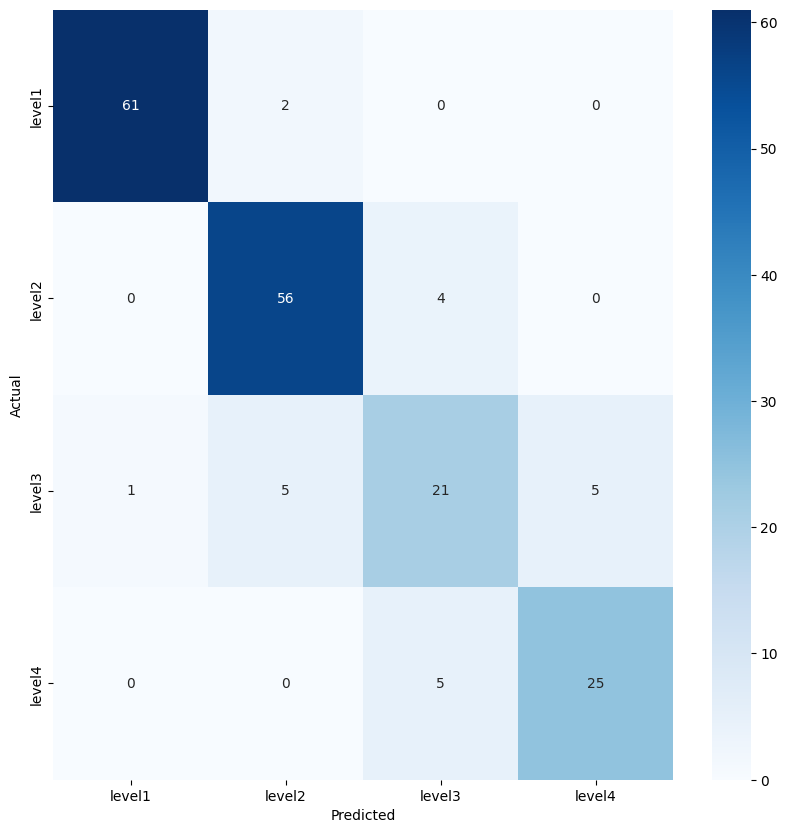

              precision    recall  f1-score   support

      level1       0.98      0.97      0.98        63
      level2       0.89      0.93      0.91        60
      level3       0.70      0.66      0.68        32
      level4       0.83      0.83      0.83        30

    accuracy                           0.88       185
   macro avg       0.85      0.85      0.85       185
weighted avg       0.88      0.88      0.88       185



In [9]:
# Load the datasets
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x), data_transforms[x]) for x in ["train", "valid", "test"]}

# Create data loaders
dataloaders = {x: DataLoader(image_datasets[x], batch_size=batch_size, shuffle=True, num_workers=4) for x in ["train", "valid", "test"]}

# Get the dataset sizes
dataset_sizes = {x: len(image_datasets[x]) for x in ["train", "valid", "test"]}

# Get the class names
class_names = image_datasets["train"].classes

# Set device to GPU or CPU
#device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Set the criterion and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9)

# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

# Train the model
model = train_model(model, criterion, optimizer, exp_lr_scheduler, num_epochs=num_epochs)

# Evaluate the model
evaluate_model(model, dataloaders["test"], class_names)

# Save the model
torch.save(model.state_dict(), "model_with_se_block0523.pth")

## 0524 MIAS data update

In [1]:
import mlflow
from datetime import datetime
from torchvision.models import densenet169
import numpy as np

mlflow.set_tracking_uri("http://localhost:5000/")

EXPERIMENT_NAME = "Breast_density_with_SE-attention_MIAS_balanced_data_0525"

experiment_id = mlflow.get_experiment_by_name(EXPERIMENT_NAME)  # check if the experiment is already exist
if not experiment_id:
    experiment_id = mlflow.create_experiment(EXPERIMENT_NAME)
else:
    experiment_id = experiment_id.experiment_id

model = densenet169()

mlflow.start_run(
    experiment_id=experiment_id,
    run_name=f'test_{datetime.now().strftime("%Y-%m-%d")}',
    tags={
        "type": "breast_density",
        "task": "mammogram_BD_level"
    }
)

<ActiveRun: >

In [2]:
# Import necessary libraries
import os
import time
import copy
import torch
import torchvision
from torchvision import datasets, models, transforms
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
from torch.utils.data import Dataset, DataLoader
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
from tqdm import tqdm
device = torch.device("cuda:1" if torch.cuda.is_available() else "cuda:2")

In [4]:
# Define the SEBlock
class SEBlock(nn.Module):
    def __init__(self, channel, reduction=16):
        super(SEBlock, self).__init__()
        self.avg_pool = nn.AdaptiveAvgPool2d(1)
        self.fc = nn.Sequential(
            nn.Linear(channel, channel // reduction, bias=False),
            nn.ReLU(inplace=True),
            nn.Linear(channel // reduction, channel, bias=False),
            nn.Sigmoid()
        )

    def forward(self, x):
        b, c, _, _ = x.size()
        y = self.avg_pool(x).view(b, c)
        y = self.fc(y).view(b, c, 1, 1)
        return x * y.expand_as(x)

# Load the pretrained DenseNet model and replace the last fully connected layer
model = models.densenet169(pretrained=True)
num_ftrs = model.classifier.in_features
model.classifier = nn.Linear(num_ftrs, 3)

# Add SEBlock to DenseNet
for name, module in model.named_modules():
    if isinstance(module, nn.Conv2d):
        setattr(module, "se", SEBlock(module.out_channels))

model = model.to(device)

In [6]:
# Set the parameters
data_dir = "/home/kevinluo/breast_density_classification/MIAS_BD_data"
num_epochs = 100
batch_size = 8
learning_rate = 0.001

# Set the transforms
data_transforms = {
    "train": transforms.Compose([
        transforms.Resize((640, 640)),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    "valid": transforms.Compose([
        transforms.Resize((640, 640)),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    "test": transforms.Compose([
        transforms.Resize((640, 640)),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

In [9]:
epochs = 100
batch_size = 8
lr = 0.001
mlflow.log_params(
    {
        "epochs": epochs,
        "batch_size": batch_size,
        "lr": lr
    }
)

In [10]:
#train_model
from tqdm import tqdm

def train_model(model, criterion, optimizer, scheduler, num_epochs=100):
    since = time.time()

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch, num_epochs - 1))
        print('-' * 10)

        # Each epoch has a training and validation phase
        for phase in ['train', 'valid']:
            if phase == 'train':
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0

            # Iterate over data.
            for inputs, labels in tqdm(dataloaders[phase]):
                inputs = inputs.to(device)
                labels = labels.to(device)

                # zero the parameter gradients
                optimizer.zero_grad()

                # forward
                # track history if only in train
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    # backward + optimize only if in training phase
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                # statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            if phase == 'train':
                scheduler.step()

            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]

            print('{} Loss: {:.4f} Acc: {:.4f}'.format(
                phase, epoch_loss, epoch_acc))
            # Log metrics to MLflow
            mlflow.log_metric("{}_loss".format(phase), epoch_loss, step=epoch)
            mlflow.log_metric("{}_accuracy".format(phase), epoch_acc.item(), step=epoch)

            # deep copy the model
            if phase == 'valid' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())

        print()

    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(
        time_elapsed // 60, time_elapsed % 60))
    print('Best val Acc: {:4f}'.format(best_acc))

    # load best model weights
    model.load_state_dict(best_model_wts)
    return model


#evaluate_model
def evaluate_model(model, dataloader, class_names):
    model.eval()  # set model to evaluation mode

    # Initialize the prediction and label lists
    predlist = torch.zeros(0, dtype=torch.long, device='cpu')
    lbllist = torch.zeros(0, dtype=torch.long, device='cpu')

    with torch.no_grad():
        for inputs, labels in tqdm(dataloader):
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs)  # forward pass
            _, preds = torch.max(outputs, 1)

            # Append batch prediction results
            predlist = torch.cat([predlist, preds.view(-1).cpu()])
            lbllist = torch.cat([lbllist, labels.view(-1).cpu()])

    # Confusion matrix
    conf_mat = confusion_matrix(lbllist.numpy(), predlist.numpy())
    plt.figure(figsize=(10, 10))
    sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.savefig('confusion_matrix0525MIAS.png')
    plt.show()

    # Classification report
    class_report = classification_report(lbllist.numpy(), predlist.numpy(), target_names=class_names)
    print(class_report)

Epoch 0/99
----------


100%|██████████| 28/28 [00:11<00:00,  2.50it/s]


train Loss: 1.0737 Acc: 0.4375


100%|██████████| 9/9 [00:01<00:00,  5.01it/s]


valid Loss: 0.8928 Acc: 0.5303

Epoch 1/99
----------


100%|██████████| 28/28 [00:09<00:00,  2.95it/s]


train Loss: 0.9027 Acc: 0.5536


100%|██████████| 9/9 [00:01<00:00,  5.72it/s]


valid Loss: 1.0521 Acc: 0.3182

Epoch 2/99
----------


100%|██████████| 28/28 [00:09<00:00,  3.03it/s]


train Loss: 0.8213 Acc: 0.5938


100%|██████████| 9/9 [00:01<00:00,  6.28it/s]


valid Loss: 0.6321 Acc: 0.7576

Epoch 3/99
----------


100%|██████████| 28/28 [00:09<00:00,  3.10it/s]


train Loss: 0.5705 Acc: 0.7143


100%|██████████| 9/9 [00:01<00:00,  6.30it/s]


valid Loss: 0.5901 Acc: 0.7879

Epoch 4/99
----------


100%|██████████| 28/28 [00:09<00:00,  3.09it/s]


train Loss: 0.4873 Acc: 0.8080


100%|██████████| 9/9 [00:01<00:00,  6.31it/s]


valid Loss: 0.5604 Acc: 0.7121

Epoch 5/99
----------


100%|██████████| 28/28 [00:09<00:00,  3.03it/s]


train Loss: 0.4973 Acc: 0.8170


100%|██████████| 9/9 [00:01<00:00,  6.13it/s]


valid Loss: 0.4855 Acc: 0.7879

Epoch 6/99
----------


100%|██████████| 28/28 [00:09<00:00,  3.07it/s]


train Loss: 0.3731 Acc: 0.8616


100%|██████████| 9/9 [00:01<00:00,  6.37it/s]


valid Loss: 0.8135 Acc: 0.5303

Epoch 7/99
----------


100%|██████████| 28/28 [00:09<00:00,  3.00it/s]


train Loss: 0.2271 Acc: 0.9330


100%|██████████| 9/9 [00:01<00:00,  6.00it/s]


valid Loss: 0.5486 Acc: 0.7121

Epoch 8/99
----------


100%|██████████| 28/28 [00:09<00:00,  2.98it/s]


train Loss: 0.2065 Acc: 0.9598


100%|██████████| 9/9 [00:01<00:00,  5.85it/s]


valid Loss: 0.4791 Acc: 0.7727

Epoch 9/99
----------


100%|██████████| 28/28 [00:09<00:00,  2.97it/s]


train Loss: 0.1722 Acc: 0.9554


100%|██████████| 9/9 [00:01<00:00,  6.10it/s]


valid Loss: 0.5263 Acc: 0.8182

Epoch 10/99
----------


100%|██████████| 28/28 [00:09<00:00,  3.01it/s]


train Loss: 0.2204 Acc: 0.9375


100%|██████████| 9/9 [00:01<00:00,  6.54it/s]


valid Loss: 0.5015 Acc: 0.7727

Epoch 11/99
----------


100%|██████████| 28/28 [00:09<00:00,  3.04it/s]


train Loss: 0.1657 Acc: 0.9777


100%|██████████| 9/9 [00:01<00:00,  6.03it/s]


valid Loss: 0.4733 Acc: 0.7727

Epoch 12/99
----------


100%|██████████| 28/28 [00:09<00:00,  3.02it/s]


train Loss: 0.2153 Acc: 0.9420


100%|██████████| 9/9 [00:01<00:00,  6.28it/s]


valid Loss: 0.5462 Acc: 0.7879

Epoch 13/99
----------


100%|██████████| 28/28 [00:09<00:00,  3.03it/s]


train Loss: 0.1345 Acc: 0.9866


100%|██████████| 9/9 [00:01<00:00,  6.13it/s]


valid Loss: 0.5446 Acc: 0.7879

Epoch 14/99
----------


100%|██████████| 28/28 [00:09<00:00,  2.97it/s]


train Loss: 0.1229 Acc: 0.9821


100%|██████████| 9/9 [00:01<00:00,  5.80it/s]


valid Loss: 0.5176 Acc: 0.7879

Epoch 15/99
----------


100%|██████████| 28/28 [00:09<00:00,  2.95it/s]


train Loss: 0.1263 Acc: 0.9821


100%|██████████| 9/9 [00:01<00:00,  5.85it/s]


valid Loss: 0.4977 Acc: 0.7727

Epoch 16/99
----------


100%|██████████| 28/28 [00:09<00:00,  2.99it/s]


train Loss: 0.1618 Acc: 0.9643


100%|██████████| 9/9 [00:01<00:00,  6.14it/s]


valid Loss: 0.5094 Acc: 0.7727

Epoch 17/99
----------


100%|██████████| 28/28 [00:09<00:00,  2.97it/s]


train Loss: 0.1652 Acc: 0.9688


100%|██████████| 9/9 [00:01<00:00,  6.37it/s]


valid Loss: 0.4868 Acc: 0.7727

Epoch 18/99
----------


100%|██████████| 28/28 [00:09<00:00,  2.96it/s]


train Loss: 0.1556 Acc: 0.9688


100%|██████████| 9/9 [00:01<00:00,  6.30it/s]


valid Loss: 0.5294 Acc: 0.8030

Epoch 19/99
----------


100%|██████████| 28/28 [00:09<00:00,  2.95it/s]


train Loss: 0.1787 Acc: 0.9464


100%|██████████| 9/9 [00:01<00:00,  6.37it/s]


valid Loss: 0.4927 Acc: 0.8030

Epoch 20/99
----------


100%|██████████| 28/28 [00:09<00:00,  2.89it/s]


train Loss: 0.1126 Acc: 0.9955


100%|██████████| 9/9 [00:01<00:00,  6.26it/s]


valid Loss: 0.5180 Acc: 0.8182

Epoch 21/99
----------


100%|██████████| 28/28 [00:09<00:00,  2.94it/s]


train Loss: 0.1678 Acc: 0.9554


100%|██████████| 9/9 [00:01<00:00,  6.49it/s]


valid Loss: 0.5108 Acc: 0.7879

Epoch 22/99
----------


100%|██████████| 28/28 [00:09<00:00,  2.89it/s]


train Loss: 0.1294 Acc: 0.9821


100%|██████████| 9/9 [00:01<00:00,  6.45it/s]


valid Loss: 0.5366 Acc: 0.7879

Epoch 23/99
----------


100%|██████████| 28/28 [00:09<00:00,  2.87it/s]


train Loss: 0.1504 Acc: 0.9777


100%|██████████| 9/9 [00:01<00:00,  6.33it/s]


valid Loss: 0.5281 Acc: 0.8030

Epoch 24/99
----------


100%|██████████| 28/28 [00:10<00:00,  2.79it/s]


train Loss: 0.1258 Acc: 0.9911


100%|██████████| 9/9 [00:01<00:00,  6.02it/s]


valid Loss: 0.5465 Acc: 0.7879

Epoch 25/99
----------


100%|██████████| 28/28 [00:09<00:00,  2.82it/s]


train Loss: 0.1033 Acc: 0.9911


100%|██████████| 9/9 [00:01<00:00,  6.10it/s]


valid Loss: 0.5490 Acc: 0.7879

Epoch 26/99
----------


100%|██████████| 28/28 [00:10<00:00,  2.78it/s]


train Loss: 0.1101 Acc: 0.9911


100%|██████████| 9/9 [00:01<00:00,  6.16it/s]


valid Loss: 0.5615 Acc: 0.7727

Epoch 27/99
----------


100%|██████████| 28/28 [00:09<00:00,  2.81it/s]


train Loss: 0.0979 Acc: 0.9955


100%|██████████| 9/9 [00:01<00:00,  6.38it/s]


valid Loss: 0.5120 Acc: 0.8030

Epoch 28/99
----------


100%|██████████| 28/28 [00:10<00:00,  2.73it/s]


train Loss: 0.2026 Acc: 0.9598


100%|██████████| 9/9 [00:01<00:00,  6.60it/s]


valid Loss: 0.5534 Acc: 0.7879

Epoch 29/99
----------


100%|██████████| 28/28 [00:09<00:00,  2.81it/s]


train Loss: 0.1571 Acc: 0.9643


100%|██████████| 9/9 [00:01<00:00,  6.36it/s]


valid Loss: 0.5127 Acc: 0.8030

Epoch 30/99
----------


100%|██████████| 28/28 [00:10<00:00,  2.78it/s]


train Loss: 0.1179 Acc: 0.9911


100%|██████████| 9/9 [00:01<00:00,  5.93it/s]


valid Loss: 0.5232 Acc: 0.8030

Epoch 31/99
----------


100%|██████████| 28/28 [00:10<00:00,  2.78it/s]


train Loss: 0.1673 Acc: 0.9643


100%|██████████| 9/9 [00:01<00:00,  6.77it/s]


valid Loss: 0.4762 Acc: 0.7727

Epoch 32/99
----------


100%|██████████| 28/28 [00:09<00:00,  2.82it/s]


train Loss: 0.1598 Acc: 0.9688


100%|██████████| 9/9 [00:01<00:00,  6.11it/s]


valid Loss: 0.5733 Acc: 0.7879

Epoch 33/99
----------


100%|██████████| 28/28 [00:10<00:00,  2.80it/s]


train Loss: 0.1515 Acc: 0.9688


100%|██████████| 9/9 [00:01<00:00,  6.79it/s]


valid Loss: 0.4952 Acc: 0.7727

Epoch 34/99
----------


100%|██████████| 28/28 [00:09<00:00,  2.80it/s]


train Loss: 0.1178 Acc: 0.9911


100%|██████████| 9/9 [00:01<00:00,  6.58it/s]


valid Loss: 0.5239 Acc: 0.8182

Epoch 35/99
----------


100%|██████████| 28/28 [00:09<00:00,  2.83it/s]


train Loss: 0.1301 Acc: 0.9777


100%|██████████| 9/9 [00:01<00:00,  6.35it/s]


valid Loss: 0.5489 Acc: 0.8030

Epoch 36/99
----------


100%|██████████| 28/28 [00:10<00:00,  2.76it/s]


train Loss: 0.1433 Acc: 0.9777


100%|██████████| 9/9 [00:01<00:00,  6.42it/s]


valid Loss: 0.5729 Acc: 0.7879

Epoch 37/99
----------


100%|██████████| 28/28 [00:10<00:00,  2.75it/s]


train Loss: 0.1492 Acc: 0.9732


100%|██████████| 9/9 [00:01<00:00,  6.32it/s]


valid Loss: 0.5281 Acc: 0.7879

Epoch 38/99
----------


100%|██████████| 28/28 [00:10<00:00,  2.75it/s]


train Loss: 0.1314 Acc: 0.9821


100%|██████████| 9/9 [00:01<00:00,  6.16it/s]


valid Loss: 0.5711 Acc: 0.7879

Epoch 39/99
----------


100%|██████████| 28/28 [00:10<00:00,  2.77it/s]


train Loss: 0.1452 Acc: 0.9732


100%|██████████| 9/9 [00:01<00:00,  6.11it/s]


valid Loss: 0.5113 Acc: 0.8030

Epoch 40/99
----------


100%|██████████| 28/28 [00:10<00:00,  2.76it/s]


train Loss: 0.1316 Acc: 0.9777


100%|██████████| 9/9 [00:01<00:00,  6.19it/s]


valid Loss: 0.5199 Acc: 0.8030

Epoch 41/99
----------


100%|██████████| 28/28 [00:09<00:00,  2.81it/s]


train Loss: 0.1203 Acc: 0.9866


100%|██████████| 9/9 [00:01<00:00,  6.50it/s]


valid Loss: 0.5938 Acc: 0.7273

Epoch 42/99
----------


100%|██████████| 28/28 [00:10<00:00,  2.75it/s]


train Loss: 0.0948 Acc: 0.9911


100%|██████████| 9/9 [00:01<00:00,  5.94it/s]


valid Loss: 0.5196 Acc: 0.8030

Epoch 43/99
----------


100%|██████████| 28/28 [00:09<00:00,  2.81it/s]


train Loss: 0.1388 Acc: 0.9866


100%|██████████| 9/9 [00:01<00:00,  6.21it/s]


valid Loss: 0.5096 Acc: 0.7727

Epoch 44/99
----------


100%|██████████| 28/28 [00:10<00:00,  2.73it/s]


train Loss: 0.1452 Acc: 0.9732


100%|██████████| 9/9 [00:01<00:00,  6.53it/s]


valid Loss: 0.5679 Acc: 0.7576

Epoch 45/99
----------


100%|██████████| 28/28 [00:10<00:00,  2.75it/s]


train Loss: 0.1512 Acc: 0.9777


100%|██████████| 9/9 [00:01<00:00,  6.36it/s]


valid Loss: 0.5311 Acc: 0.8182

Epoch 46/99
----------


100%|██████████| 28/28 [00:10<00:00,  2.76it/s]


train Loss: 0.1792 Acc: 0.9464


100%|██████████| 9/9 [00:01<00:00,  6.54it/s]


valid Loss: 0.5479 Acc: 0.8182

Epoch 47/99
----------


100%|██████████| 28/28 [00:10<00:00,  2.69it/s]


train Loss: 0.1096 Acc: 0.9911


100%|██████████| 9/9 [00:01<00:00,  5.77it/s]


valid Loss: 0.5432 Acc: 0.7879

Epoch 48/99
----------


100%|██████████| 28/28 [00:10<00:00,  2.66it/s]


train Loss: 0.1433 Acc: 0.9777


100%|██████████| 9/9 [00:01<00:00,  6.10it/s]


valid Loss: 0.4956 Acc: 0.8030

Epoch 49/99
----------


100%|██████████| 28/28 [00:10<00:00,  2.75it/s]


train Loss: 0.1219 Acc: 0.9777


100%|██████████| 9/9 [00:01<00:00,  6.13it/s]


valid Loss: 0.5191 Acc: 0.8030

Epoch 50/99
----------


100%|██████████| 28/28 [00:10<00:00,  2.71it/s]


train Loss: 0.1188 Acc: 0.9911


100%|██████████| 9/9 [00:01<00:00,  5.80it/s]


valid Loss: 0.5620 Acc: 0.7879

Epoch 51/99
----------


100%|██████████| 28/28 [00:10<00:00,  2.77it/s]


train Loss: 0.1228 Acc: 0.9821


100%|██████████| 9/9 [00:01<00:00,  6.30it/s]


valid Loss: 0.5355 Acc: 0.8182

Epoch 52/99
----------


100%|██████████| 28/28 [00:10<00:00,  2.73it/s]


train Loss: 0.1357 Acc: 0.9777


100%|██████████| 9/9 [00:01<00:00,  6.49it/s]


valid Loss: 0.5301 Acc: 0.8030

Epoch 53/99
----------


100%|██████████| 28/28 [00:10<00:00,  2.75it/s]


train Loss: 0.1344 Acc: 0.9777


100%|██████████| 9/9 [00:01<00:00,  6.35it/s]


valid Loss: 0.5024 Acc: 0.7879

Epoch 54/99
----------


100%|██████████| 28/28 [00:10<00:00,  2.72it/s]


train Loss: 0.1690 Acc: 0.9732


100%|██████████| 9/9 [00:01<00:00,  6.31it/s]


valid Loss: 0.5115 Acc: 0.7727

Epoch 55/99
----------


100%|██████████| 28/28 [00:10<00:00,  2.74it/s]


train Loss: 0.1133 Acc: 0.9911


100%|██████████| 9/9 [00:01<00:00,  5.87it/s]


valid Loss: 0.4838 Acc: 0.7727

Epoch 56/99
----------


100%|██████████| 28/28 [00:10<00:00,  2.71it/s]


train Loss: 0.1443 Acc: 0.9821


100%|██████████| 9/9 [00:01<00:00,  5.97it/s]


valid Loss: 0.5006 Acc: 0.8030

Epoch 57/99
----------


100%|██████████| 28/28 [00:10<00:00,  2.75it/s]


train Loss: 0.1208 Acc: 0.9821


100%|██████████| 9/9 [00:01<00:00,  6.35it/s]


valid Loss: 0.5354 Acc: 0.8182

Epoch 58/99
----------


100%|██████████| 28/28 [00:10<00:00,  2.72it/s]


train Loss: 0.1631 Acc: 0.9732


100%|██████████| 9/9 [00:01<00:00,  5.65it/s]


valid Loss: 0.5446 Acc: 0.7879

Epoch 59/99
----------


100%|██████████| 28/28 [00:10<00:00,  2.70it/s]


train Loss: 0.0992 Acc: 0.9911


100%|██████████| 9/9 [00:01<00:00,  6.13it/s]


valid Loss: 0.5396 Acc: 0.8182

Epoch 60/99
----------


100%|██████████| 28/28 [00:10<00:00,  2.72it/s]


train Loss: 0.1168 Acc: 0.9911


100%|██████████| 9/9 [00:01<00:00,  6.30it/s]


valid Loss: 0.5493 Acc: 0.7879

Epoch 61/99
----------


100%|██████████| 28/28 [00:10<00:00,  2.76it/s]


train Loss: 0.1388 Acc: 0.9911


100%|██████████| 9/9 [00:01<00:00,  6.30it/s]


valid Loss: 0.5040 Acc: 0.7727

Epoch 62/99
----------


100%|██████████| 28/28 [00:10<00:00,  2.72it/s]


train Loss: 0.1871 Acc: 0.9688


100%|██████████| 9/9 [00:01<00:00,  5.92it/s]


valid Loss: 0.5119 Acc: 0.8030

Epoch 63/99
----------


100%|██████████| 28/28 [00:10<00:00,  2.70it/s]


train Loss: 0.1519 Acc: 0.9643


100%|██████████| 9/9 [00:01<00:00,  6.01it/s]


valid Loss: 0.5315 Acc: 0.8182

Epoch 64/99
----------


100%|██████████| 28/28 [00:10<00:00,  2.73it/s]


train Loss: 0.1252 Acc: 0.9866


100%|██████████| 9/9 [00:01<00:00,  6.52it/s]


valid Loss: 0.5044 Acc: 0.8030

Epoch 65/99
----------


100%|██████████| 28/28 [00:09<00:00,  2.80it/s]


train Loss: 0.1401 Acc: 0.9821


100%|██████████| 9/9 [00:01<00:00,  5.40it/s]


valid Loss: 0.5156 Acc: 0.8030

Epoch 66/99
----------


100%|██████████| 28/28 [00:10<00:00,  2.73it/s]


train Loss: 0.1474 Acc: 0.9911


100%|██████████| 9/9 [00:01<00:00,  6.73it/s]


valid Loss: 0.5305 Acc: 0.7879

Epoch 67/99
----------


100%|██████████| 28/28 [00:10<00:00,  2.76it/s]


train Loss: 0.1409 Acc: 0.9777


100%|██████████| 9/9 [00:01<00:00,  6.90it/s]


valid Loss: 0.5081 Acc: 0.7727

Epoch 68/99
----------


100%|██████████| 28/28 [00:10<00:00,  2.69it/s]


train Loss: 0.1491 Acc: 0.9688


100%|██████████| 9/9 [00:01<00:00,  5.79it/s]


valid Loss: 0.5368 Acc: 0.8182

Epoch 69/99
----------


100%|██████████| 28/28 [00:10<00:00,  2.74it/s]


train Loss: 0.1233 Acc: 0.9777


100%|██████████| 9/9 [00:01<00:00,  5.08it/s]


valid Loss: 0.5446 Acc: 0.8182

Epoch 70/99
----------


100%|██████████| 28/28 [00:10<00:00,  2.71it/s]


train Loss: 0.1088 Acc: 0.9955


100%|██████████| 9/9 [00:01<00:00,  6.38it/s]


valid Loss: 0.5118 Acc: 0.7879

Epoch 71/99
----------


100%|██████████| 28/28 [00:10<00:00,  2.71it/s]


train Loss: 0.1099 Acc: 0.9821


100%|██████████| 9/9 [00:01<00:00,  6.48it/s]


valid Loss: 0.5720 Acc: 0.7879

Epoch 72/99
----------


100%|██████████| 28/28 [00:10<00:00,  2.74it/s]


train Loss: 0.1100 Acc: 0.9955


100%|██████████| 9/9 [00:01<00:00,  6.75it/s]


valid Loss: 0.4802 Acc: 0.7727

Epoch 73/99
----------


100%|██████████| 28/28 [00:10<00:00,  2.75it/s]


train Loss: 0.1982 Acc: 0.9509


100%|██████████| 9/9 [00:01<00:00,  6.18it/s]


valid Loss: 0.4746 Acc: 0.7727

Epoch 74/99
----------


100%|██████████| 28/28 [00:10<00:00,  2.69it/s]


train Loss: 0.1609 Acc: 0.9420


100%|██████████| 9/9 [00:01<00:00,  6.08it/s]


valid Loss: 0.4789 Acc: 0.7727

Epoch 75/99
----------


100%|██████████| 28/28 [00:10<00:00,  2.65it/s]


train Loss: 0.1582 Acc: 0.9732


100%|██████████| 9/9 [00:01<00:00,  6.24it/s]


valid Loss: 0.4733 Acc: 0.7727

Epoch 76/99
----------


100%|██████████| 28/28 [00:10<00:00,  2.70it/s]


train Loss: 0.1237 Acc: 0.9911


100%|██████████| 9/9 [00:01<00:00,  6.19it/s]


valid Loss: 0.5049 Acc: 0.7879

Epoch 77/99
----------


100%|██████████| 28/28 [00:10<00:00,  2.74it/s]


train Loss: 0.1223 Acc: 0.9777


100%|██████████| 9/9 [00:01<00:00,  6.56it/s]


valid Loss: 0.4992 Acc: 0.8030

Epoch 78/99
----------


100%|██████████| 28/28 [00:10<00:00,  2.72it/s]


train Loss: 0.1173 Acc: 0.9866


100%|██████████| 9/9 [00:01<00:00,  6.23it/s]


valid Loss: 0.5452 Acc: 0.7879

Epoch 79/99
----------


100%|██████████| 28/28 [00:10<00:00,  2.67it/s]


train Loss: 0.1317 Acc: 0.9821


100%|██████████| 9/9 [00:01<00:00,  6.11it/s]


valid Loss: 0.5230 Acc: 0.8182

Epoch 80/99
----------


100%|██████████| 28/28 [00:10<00:00,  2.75it/s]


train Loss: 0.1021 Acc: 0.9911


100%|██████████| 9/9 [00:01<00:00,  6.19it/s]


valid Loss: 0.5291 Acc: 0.8182

Epoch 81/99
----------


100%|██████████| 28/28 [00:10<00:00,  2.73it/s]


train Loss: 0.1597 Acc: 0.9688


100%|██████████| 9/9 [00:01<00:00,  6.13it/s]


valid Loss: 0.4871 Acc: 0.8030

Epoch 82/99
----------


100%|██████████| 28/28 [00:10<00:00,  2.67it/s]


train Loss: 0.1248 Acc: 0.9821


100%|██████████| 9/9 [00:01<00:00,  6.13it/s]


valid Loss: 0.5294 Acc: 0.8030

Epoch 83/99
----------


100%|██████████| 28/28 [00:10<00:00,  2.70it/s]


train Loss: 0.1252 Acc: 0.9866


100%|██████████| 9/9 [00:01<00:00,  5.85it/s]


valid Loss: 0.5240 Acc: 0.8030

Epoch 84/99
----------


100%|██████████| 28/28 [00:10<00:00,  2.70it/s]


train Loss: 0.1585 Acc: 0.9732


100%|██████████| 9/9 [00:01<00:00,  6.12it/s]


valid Loss: 0.4913 Acc: 0.7727

Epoch 85/99
----------


100%|██████████| 28/28 [00:10<00:00,  2.69it/s]


train Loss: 0.1655 Acc: 0.9509


100%|██████████| 9/9 [00:01<00:00,  5.58it/s]


valid Loss: 0.5083 Acc: 0.8030

Epoch 86/99
----------


100%|██████████| 28/28 [00:10<00:00,  2.71it/s]


train Loss: 0.1420 Acc: 0.9732


100%|██████████| 9/9 [00:01<00:00,  6.19it/s]


valid Loss: 0.5514 Acc: 0.8182

Epoch 87/99
----------


100%|██████████| 28/28 [00:10<00:00,  2.66it/s]


train Loss: 0.1273 Acc: 0.9777


100%|██████████| 9/9 [00:01<00:00,  5.62it/s]


valid Loss: 0.5781 Acc: 0.7273

Epoch 88/99
----------


100%|██████████| 28/28 [00:10<00:00,  2.71it/s]


train Loss: 0.1508 Acc: 0.9732


100%|██████████| 9/9 [00:01<00:00,  5.99it/s]


valid Loss: 0.5130 Acc: 0.8030

Epoch 89/99
----------


100%|██████████| 28/28 [00:10<00:00,  2.67it/s]


train Loss: 0.1240 Acc: 0.9955


100%|██████████| 9/9 [00:01<00:00,  6.16it/s]


valid Loss: 0.4996 Acc: 0.7727

Epoch 90/99
----------


100%|██████████| 28/28 [00:10<00:00,  2.70it/s]


train Loss: 0.1092 Acc: 0.9866


100%|██████████| 9/9 [00:01<00:00,  6.73it/s]


valid Loss: 0.5519 Acc: 0.7879

Epoch 91/99
----------


100%|██████████| 28/28 [00:10<00:00,  2.72it/s]


train Loss: 0.1280 Acc: 0.9911


100%|██████████| 9/9 [00:01<00:00,  6.21it/s]


valid Loss: 0.5467 Acc: 0.8030

Epoch 92/99
----------


100%|██████████| 28/28 [00:10<00:00,  2.72it/s]


train Loss: 0.1085 Acc: 0.9955


100%|██████████| 9/9 [00:01<00:00,  6.47it/s]


valid Loss: 0.4787 Acc: 0.7727

Epoch 93/99
----------


100%|██████████| 28/28 [00:10<00:00,  2.73it/s]


train Loss: 0.1412 Acc: 0.9688


100%|██████████| 9/9 [00:01<00:00,  6.22it/s]


valid Loss: 0.5334 Acc: 0.8182

Epoch 94/99
----------


100%|██████████| 28/28 [00:10<00:00,  2.69it/s]


train Loss: 0.1141 Acc: 0.9821


100%|██████████| 9/9 [00:01<00:00,  5.84it/s]


valid Loss: 0.5451 Acc: 0.8182

Epoch 95/99
----------


100%|██████████| 28/28 [00:10<00:00,  2.68it/s]


train Loss: 0.1277 Acc: 0.9821


100%|██████████| 9/9 [00:01<00:00,  5.61it/s]


valid Loss: 0.5047 Acc: 0.7727

Epoch 96/99
----------


100%|██████████| 28/28 [00:10<00:00,  2.65it/s]


train Loss: 0.1668 Acc: 0.9643


100%|██████████| 9/9 [00:01<00:00,  6.41it/s]


valid Loss: 0.4551 Acc: 0.7727

Epoch 97/99
----------


100%|██████████| 28/28 [00:10<00:00,  2.72it/s]


train Loss: 0.1244 Acc: 0.9911


100%|██████████| 9/9 [00:01<00:00,  6.05it/s]


valid Loss: 0.5150 Acc: 0.8030

Epoch 98/99
----------


100%|██████████| 28/28 [00:10<00:00,  2.70it/s]


train Loss: 0.1457 Acc: 0.9777


100%|██████████| 9/9 [00:01<00:00,  5.77it/s]


valid Loss: 0.5034 Acc: 0.7727

Epoch 99/99
----------


100%|██████████| 28/28 [00:10<00:00,  2.66it/s]


train Loss: 0.1474 Acc: 0.9777


100%|██████████| 9/9 [00:01<00:00,  5.58it/s]


valid Loss: 0.5053 Acc: 0.8030

Training complete in 19m 22s
Best val Acc: 0.818182


100%|██████████| 15/15 [00:02<00:00,  6.06it/s]


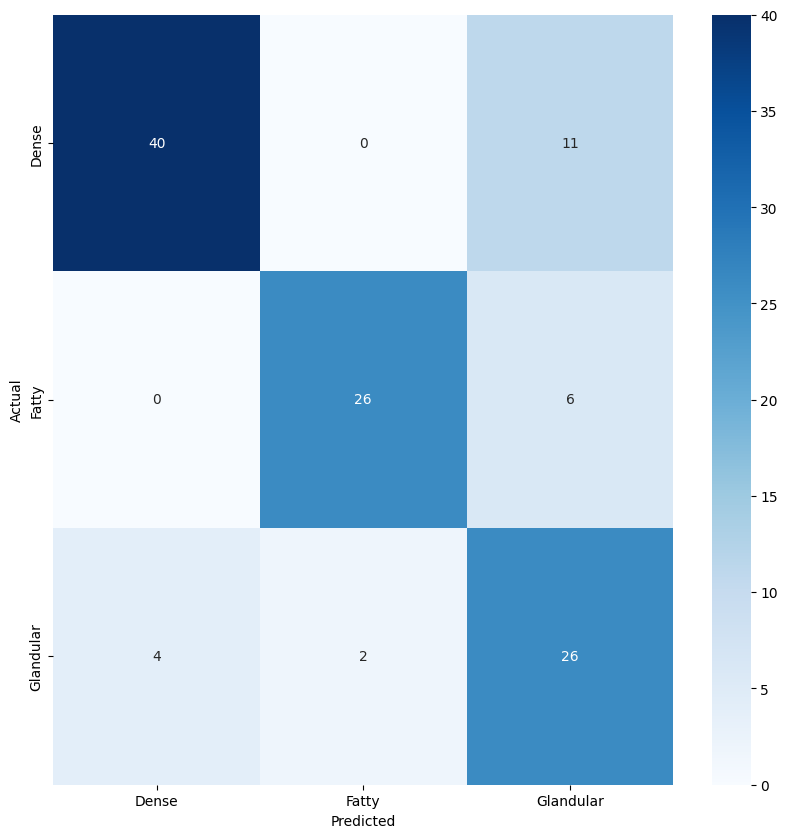

              precision    recall  f1-score   support

       Dense       0.91      0.78      0.84        51
       Fatty       0.93      0.81      0.87        32
   Glandular       0.60      0.81      0.69        32

    accuracy                           0.80       115
   macro avg       0.81      0.80      0.80       115
weighted avg       0.83      0.80      0.81       115



In [11]:
# Load the datasets
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x), data_transforms[x]) for x in ["train", "valid", "test"]}

# Create data loaders
dataloaders = {x: DataLoader(image_datasets[x], batch_size=batch_size, shuffle=True, num_workers=4) for x in ["train", "valid", "test"]}

# Get the dataset sizes
dataset_sizes = {x: len(image_datasets[x]) for x in ["train", "valid", "test"]}

# Get the class names
class_names = image_datasets["train"].classes

# Set device to GPU or CPU
#device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Set the criterion and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9)

# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

# Train the model
model = train_model(model, criterion, optimizer, exp_lr_scheduler, num_epochs=num_epochs)

# Evaluate the model
evaluate_model(model, dataloaders["test"], class_names)

# Save the model
torch.save(model.state_dict(), "model_MIAS_with_se_block0524.pth")

In [17]:
test_corrects = 0
predictions = []
ground_truth = []

with torch.no_grad():
    for inputs, labels in tqdm(dataloaders["valid"]):
        inputs = inputs.to(device)
        labels = labels.to(device)
        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)

        test_corrects += torch.sum(preds == labels.data)
        predictions.extend(preds.cpu().numpy())
        ground_truth.extend(labels.cpu().numpy())
test_acc = test_corrects.double() / dataset_sizes["valid"]
print("Test accuracy: {:.4f}".format(test_acc))

100%|██████████| 9/9 [00:01<00:00,  6.46it/s]

Test accuracy: 0.8182


### 0530 INbreast first SE-block + CNN testing

In [1]:
import mlflow
from datetime import datetime
from torchvision.models import densenet169
import numpy as np

mlflow.set_tracking_uri("http://localhost:5000/")

EXPERIMENT_NAME = "Breast_density_with_SE-attention_INbreast_data_0530"

experiment_id = mlflow.get_experiment_by_name(EXPERIMENT_NAME)  # check if the experiment is already exist
if not experiment_id:
    experiment_id = mlflow.create_experiment(EXPERIMENT_NAME)
else:
    experiment_id = experiment_id.experiment_id

model = densenet169()

mlflow.start_run(
    experiment_id=experiment_id,
    run_name=f'test_{datetime.now().strftime("%Y-%m-%d")}',
    tags={
        "type": "breast_density",
        "task": "mammogram_BD_level"
    }
)

<ActiveRun: >

In [3]:
# Import necessary libraries
import os
import time
import copy
import torch
import torchvision
from torchvision import datasets, models, transforms
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
from torch.utils.data import Dataset, DataLoader
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
from tqdm import tqdm
device = torch.device("cuda:1" if torch.cuda.is_available() else "cuda:2")

In [5]:
# Define the SEBlock
class SEBlock(nn.Module):
    def __init__(self, channel, reduction=16):
        super(SEBlock, self).__init__()
        self.avg_pool = nn.AdaptiveAvgPool2d(1)
        self.fc = nn.Sequential(
            nn.Linear(channel, channel // reduction, bias=False),
            nn.ReLU(inplace=True),
            nn.Linear(channel // reduction, channel, bias=False),
            nn.Sigmoid()
        )

    def forward(self, x):
        b, c, _, _ = x.size()
        y = self.avg_pool(x).view(b, c)
        y = self.fc(y).view(b, c, 1, 1)
        return x * y.expand_as(x)

# Load the pretrained DenseNet model and replace the last fully connected layer
model = models.densenet169(pretrained=True)
num_ftrs = model.classifier.in_features
model.classifier = nn.Linear(num_ftrs, 3)

# Add SEBlock to DenseNet
for name, module in model.named_modules():
    if isinstance(module, nn.Conv2d):
        setattr(module, "se", SEBlock(module.out_channels))

model = model.to(device)

In [6]:
# Set the parameters
data_dir = "/home/kevinluo/breast_density_classification/INbreast"
num_epochs = 100
batch_size = 8
learning_rate = 0.001

# Set the transforms
data_transforms = {
    "train": transforms.Compose([
        transforms.Resize((640, 640)),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    "valid": transforms.Compose([
        transforms.Resize((640, 640)),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    "test": transforms.Compose([
        transforms.Resize((640, 640)),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

In [7]:
epochs = 100
batch_size = 8
lr = 0.001
mlflow.log_params(
    {
        "epochs": epochs,
        "batch_size": batch_size,
        "lr": lr
    }
)

In [8]:
#train_model
from tqdm import tqdm

def train_model(model, criterion, optimizer, scheduler, num_epochs=100):
    since = time.time()

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch, num_epochs - 1))
        print('-' * 10)

        # Each epoch has a training and validation phase
        for phase in ['train', 'valid']:
            if phase == 'train':
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0

            # Iterate over data.
            for inputs, labels in tqdm(dataloaders[phase]):
                inputs = inputs.to(device)
                labels = labels.to(device)

                # zero the parameter gradients
                optimizer.zero_grad()

                # forward
                # track history if only in train
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    # backward + optimize only if in training phase
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                # statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            if phase == 'train':
                scheduler.step()

            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]

            print('{} Loss: {:.4f} Acc: {:.4f}'.format(
                phase, epoch_loss, epoch_acc))
            # Log metrics to MLflow
            mlflow.log_metric("{}_loss".format(phase), epoch_loss, step=epoch)
            mlflow.log_metric("{}_accuracy".format(phase), epoch_acc.item(), step=epoch)

            # deep copy the model
            if phase == 'valid' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())

        print()

    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(
        time_elapsed // 60, time_elapsed % 60))
    print('Best val Acc: {:4f}'.format(best_acc))

    # load best model weights
    model.load_state_dict(best_model_wts)
    return model


#evaluate_model
def evaluate_model(model, dataloader, class_names):
    model.eval()  # set model to evaluation mode

    # Initialize the prediction and label lists
    predlist = torch.zeros(0, dtype=torch.long, device='cpu')
    lbllist = torch.zeros(0, dtype=torch.long, device='cpu')

    with torch.no_grad():
        for inputs, labels in tqdm(dataloader):
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs)  # forward pass
            _, preds = torch.max(outputs, 1)

            # Append batch prediction results
            predlist = torch.cat([predlist, preds.view(-1).cpu()])
            lbllist = torch.cat([lbllist, labels.view(-1).cpu()])

    # Confusion matrix
    conf_mat = confusion_matrix(lbllist.numpy(), predlist.numpy())
    plt.figure(figsize=(10, 10))
    sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.savefig('confusion_matrix0525MIAS.png')
    plt.show()

    # Classification report
    class_report = classification_report(lbllist.numpy(), predlist.numpy(), target_names=class_names)
    print(class_report)

In [9]:
# Load the datasets
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x), data_transforms[x]) for x in ["train", "valid", "test"]}

# Create data loaders
dataloaders = {x: DataLoader(image_datasets[x], batch_size=batch_size, shuffle=True, num_workers=4) for x in ["train", "valid", "test"]}

# Get the dataset sizes
dataset_sizes = {x: len(image_datasets[x]) for x in ["train", "valid", "test"]}

# Get the class names
class_names = image_datasets["train"].classes

# Set device to GPU or CPU
#device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Set the criterion and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9)

# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

# Train the model
model = train_model(model, criterion, optimizer, exp_lr_scheduler, num_epochs=num_epochs)

# Evaluate the model
evaluate_model(model, dataloaders["test"], class_names)

# Save the model
torch.save(model.state_dict(), "model_MIAS_with_se_block0524.pth")

Epoch 0/99
----------


  0%|          | 0/124 [00:00<?, ?it/s]/opt/conda/conda-bld/pytorch_1678411187366/work/aten/src/ATen/native/cuda/Loss.cu:240: nll_loss_forward_reduce_cuda_kernel_2d: block: [0,0,0], thread: [1,0,0] Assertion `t >= 0 && t < n_classes` failed.
/opt/conda/conda-bld/pytorch_1678411187366/work/aten/src/ATen/native/cuda/Loss.cu:240: nll_loss_forward_reduce_cuda_kernel_2d: block: [0,0,0], thread: [5,0,0] Assertion `t >= 0 && t < n_classes` failed.
  0%|          | 0/124 [00:02<?, ?it/s]


RuntimeError: CUDA error: device-side assert triggered
CUDA kernel errors might be asynchronously reported at some other API call, so the stacktrace below might be incorrect.
For debugging consider passing CUDA_LAUNCH_BLOCKING=1.
Compile with `TORCH_USE_CUDA_DSA` to enable device-side assertions.


### 10-fold test for CBIS-DDSM

#### 定義 SE-block 和 SE with Densenet

In [16]:
# Import necessary libraries
import os
import time
import copy
import torch
import torchvision
from torchvision import datasets, models, transforms
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
from torch.utils.data import Dataset, DataLoader
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
from tqdm import tqdm
device = torch.device("cuda:1" if torch.cuda.is_available() else "cuda:2")

In [72]:
import mlflow
from datetime import datetime
from torchvision.models import densenet169
import numpy as np

mlflow.set_tracking_uri("http://localhost:5000/")

EXPERIMENT_NAME = "BD_with_SE-attention_and_k-fold_CBIS-DDSM_data_0608"

experiment_id = mlflow.get_experiment_by_name(EXPERIMENT_NAME)  # check if the experiment is already exist
if not experiment_id:
    experiment_id = mlflow.create_experiment(EXPERIMENT_NAME)
else:
    experiment_id = experiment_id.experiment_id

model = densenet169()

mlflow.start_run(
    nested=True,
    experiment_id=experiment_id,
    run_name=f'test_{datetime.now().strftime("%Y-%m-%d")}',
    tags={
        "type": "breast_density",
        "task": "mammogram_BD_level"
    }
)

<ActiveRun: >

In [ ]:
# Initialize the model
model = models.densenet169(pretrained=True)
num_ftrs = model.classifier.in_features
model.classifier = nn.Linear(num_ftrs, 4)
model = model.to(device)

In [17]:
class SELayer(nn.Module):
    def __init__(self, channel, reduction=16):
        super(SELayer, self).__init__()
        self.avg_pool = nn.AdaptiveAvgPool2d(1)
        self.fc = nn.Sequential(
            nn.Linear(channel, channel // reduction, bias=False),
            nn.ReLU(inplace=True),
            nn.Linear(channel // reduction, channel, bias=False),
            nn.Sigmoid()
        )

    def forward(self, x):
        b, c, _, _ = x.size()
        y = self.avg_pool(x).view(b, c)
        y = self.fc(y).view(b, c, 1, 1)
        return x * y.expand_as(x)

class SEDenseNet(nn.Module):
    def __init__(self, num_classes=4):
        super().__init__()
        # Load the pretrained densenet
        densenet = models.densenet121(pretrained=True)
        
        # Add the SEBlocks after each denseblock
        for i in range(1, 5):
            se_block = SELayer(64 * 2 ** i)
            setattr(densenet.features, f'denseblock{i}_se', se_block)
        
        # Customize the densenet
        self.features = densenet.features
        self.classifier = nn.Sequential(nn.Linear(1024, num_classes), nn.Softmax(dim=1))

    def forward(self, x):
        features = self.features(x)
        out = F.relu(features, inplace=True)
        out = F.adaptive_avg_pool2d(out, (1, 1)).view(features.size(0), -1)
        out = self.classifier(out)
        return out


In [18]:
data_dir = '/home/kevinluo/breast_density_classification/BD_data_newdis'

# Define transformations for the training, validation, and testing sets
# Define transformations for the training, validation, and testing sets
train_transforms = transforms.Compose([transforms.Resize((640,640)),
                                       transforms.RandomHorizontalFlip(),
                                       transforms.ToTensor(),
                                       transforms.Normalize([0.485, 0.456, 0.406],
                                                            [0.229, 0.224, 0.225])])

valid_test_transforms = transforms.Compose([transforms.Resize((640,640)),
                                            transforms.ToTensor(),
                                            transforms.Normalize([0.485, 0.456, 0.406],
                                                                 [0.229, 0.224, 0.225])])


# Load the datasets with ImageFolder
image_datasets = {
    'train': datasets.ImageFolder(os.path.join(data_dir, 'train'), transform=train_transforms),
    'valid': datasets.ImageFolder(os.path.join(data_dir, 'valid'), transform=valid_test_transforms),
    'test': datasets.ImageFolder(os.path.join(data_dir, 'test'), transform=valid_test_transforms)
}

# Using the image datasets and the trainforms, define the dataloaders
dataloaders = {
    'train': DataLoader(image_datasets['train'], batch_size=8, shuffle=True),
    'valid': DataLoader(image_datasets['valid'], batch_size=8, shuffle=True),
    'test': DataLoader(image_datasets['test'], batch_size=8, shuffle=True)
}
# Combine training and validation datasets
full_dataset = torch.utils.data.ConcatDataset([image_datasets["train"], image_datasets["valid"]])

# Extract targets from the dataset
targets = [target for _, target in full_dataset]

# Initialize the KFold object
from sklearn.model_selection import StratifiedKFold
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)


In [76]:
epochs = 50
batch_size = 8
lr = 0.001
mlflow.log_params(
    {
        "epochs": epochs,
        "batch_size": batch_size,
        "lr": lr
    }
)

### train + valid and define 10-fold train model definition

In [19]:
def train_model_cv(model, criterion, optimizer, num_epochs=50):
    since = time.time()

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    train_loss_history = []
    valid_loss_history = []
    valid_acc_history = []

    for fold, (train_index, valid_index) in enumerate(kf.split(full_dataset, targets)):
        print(f'Fold {fold + 1}')
        print('-' * 10)

        # Split the dataset into the training set and the validation set
        train_dataset = torch.utils.data.Subset(full_dataset, train_index)
        valid_dataset = torch.utils.data.Subset(full_dataset, valid_index)

        # Create data loaders for the training and validation sets
        train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=4)
        valid_loader = DataLoader(valid_dataset, batch_size=batch_size, shuffle=True, num_workers=4)
        dataloaders = {'train': train_loader, 'valid': valid_loader}

        # Reset model parameters
        model.load_state_dict(best_model_wts)

        for epoch in range(num_epochs):
            print('Epoch {}/{}'.format(epoch, num_epochs - 1))
            print('-' * 10)
                        # Each epoch has a training and validation phase
            for phase in ['train', 'valid']:
                if phase == 'train':
                    model.train()  # Set model to training mode
                else:
                    model.eval()   # Set model to evaluate mode

                running_loss = 0.0
                running_corrects = 0

                # Iterate over data.
                for inputs, labels in tqdm(dataloaders[phase]):
                    inputs = inputs.to(device)
                    labels = labels.to(device)

                    # zero the parameter gradients
                    optimizer.zero_grad()

                    # forward
                    # track history if only in train
                    with torch.set_grad_enabled(phase == 'train'):
                        outputs = model(inputs)
                        _, preds = torch.max(outputs, 1)
                        loss = criterion(outputs, labels)

                        # backward + optimize only if in training phase
                        if phase == 'train':
                            loss.backward()
                            optimizer.step()

                    # statistics
                    running_loss += loss.item() * inputs.size(0)
                    running_corrects += torch.sum(preds == labels.data)

                epoch_loss = running_loss / len(dataloaders[phase].dataset)
                epoch_acc = running_corrects.double() / len(dataloaders[phase].dataset)

                print('{} Loss: {:.4f} Acc: {:.4f}'.format(phase, epoch_loss, epoch_acc))
                # mlflow.log_metric("{}_loss".format(phase), epoch_loss, step=epoch)
                # mlflow.log_metric("{}_accuracy".format(phase), epoch_acc.item(), step=epoch)

                # deep copy the model
                if phase == 'valid' and epoch_acc > best_acc:
                    best_acc = epoch_acc
                    best_model_wts = copy.deepcopy(model.state_dict())

            print()

        print('Best val Acc: {:4f}'.format(best_acc))
        print('-' * 10)

    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(time_elapsed // 60, time_elapsed % 60))
    print('Best val Acc: {:4f}'.format(best_acc))

    # load best model weights
    model.load_state_dict(best_model_wts)
    return model



In [21]:
# Set up the loss fxn
criterion = nn.CrossEntropyLoss()

# Observe that all parameters are being optimized
optimizer = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

NameError: name 'model' is not defined

In [77]:
#mlflow紀錄版本
import mlflow

def train_model_cv(model, criterion, optimizer, num_epochs=50):
    # Start MLflow run
    with mlflow.start_run():
        since = time.time()

        best_model_wts = copy.deepcopy(model.state_dict())
        best_acc = 0.0

        train_loss_history = []
        valid_loss_history = []
        valid_acc_history = []

        for fold, (train_index, valid_index) in enumerate(kf.split(full_dataset, targets)):
            print(f'Fold {fold + 1}')
            print('-' * 10)

            # Log fold index
            mlflow.log_param("fold", fold+1)

            # Split the dataset into the training set and the validation set
            train_dataset = torch.utils.data.Subset(full_dataset, train_index)
            valid_dataset = torch.utils.data.Subset(full_dataset, valid_index)

            # Create data loaders for the training and validation sets
            train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=4)
            valid_loader = DataLoader(valid_dataset, batch_size=batch_size, shuffle=True, num_workers=4)
            dataloaders = {'train': train_loader, 'valid': valid_loader}

            # Reset model parameters
            model.load_state_dict(best_model_wts)

            for epoch in range(num_epochs):
                print('Epoch {}/{}'.format(epoch, num_epochs - 1))
                print('-' * 10)

                # Log epoch number
                mlflow.log_param("epoch", epoch+1)

                # Each epoch has a training and validation phase
                for phase in ['train', 'valid']:
                    if phase == 'train':
                        model.train()  # Set model to training mode
                    else:
                        model.eval()   # Set model to evaluate mode

                    running_loss = 0.0
                    running_corrects = 0

                    # Iterate over data.
                    for inputs, labels in tqdm(dataloaders[phase]):
                        inputs = inputs.to(device)
                        labels = labels.to(device)

                        # zero the parameter gradients
                        optimizer.zero_grad()

                        # forward
                        # track history if only in train
                        with torch.set_grad_enabled(phase == 'train'):
                            outputs = model(inputs)
                            _, preds = torch.max(outputs, 1)
                            loss = criterion(outputs, labels)

                            # backward + optimize only if in training phase
                            if phase == 'train':
                                loss.backward()
                                optimizer.step()

                        # statistics
                        running_loss += loss.item() * inputs.size(0)
                        running_corrects += torch.sum(preds == labels.data)

                    epoch_loss = running_loss / len(dataloaders[phase].dataset)
                    epoch_acc = running_corrects.double() / len(dataloaders[phase].dataset)

                    print('{} Loss: {:.4f} Acc: {:.4f}'.format(phase, epoch_loss, epoch_acc))

                    # Log metrics
                    mlflow.log_metric("{}_loss".format(phase), epoch_loss, step=epoch)
                    mlflow.log_metric("{}_accuracy".format(phase), epoch_acc.item(), step=epoch)

                    # deep copy the model
                    if phase == 'valid' and epoch_acc > best_acc:
                        best_acc = epoch_acc
                        best_model_wts = copy.deepcopy(model.state_dict())

                print()

            print('Best val Acc: {:4f}'.format(best_acc))
            print('-' * 10)
            # Log best validation accuracy
            mlflow.log_metric("best_val_accuracy", best_acc)

        time_elapsed = time.time() - since
        print('Training complete in {:.0f}m {:.0f}s'.format(time_elapsed // 60, time_elapsed % 60))
        print('Best val Acc: {:4f}'.format(best_acc))

        # load best model weights
        model.load_state_dict(best_model_wts)
    return model



In [12]:
# Train the model
model = train_model_cv(model, criterion, optimizer, num_epochs=num_epochs)

# Evaluate the model
evaluate_model(model, dataloaders["test"], class_names)

# Save the model
torch.save(model.state_dict(), "0608_10-fold-validation_model_with_se_block.pth")


NameError: name 'model' is not defined

In [79]:
mlflow.end_run()

### 10-fold validation to CBIS-DDSM --> 先能跑再說

In [1]:
import torch
from torchvision import models, datasets, transforms
import os
import copy
from torch import nn, optim
from torch.utils.data import DataLoader, ConcatDataset
import time
from sklearn.model_selection import StratifiedKFold

# Data augmentation and normalization for training
# Just normalization for validation
data_transforms = transforms.Compose([
    transforms.Resize((416, 416)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

data_dir = "/home/kevinluo/breast_density_classification/BD_data_newdis"
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x), data_transforms)
                  for x in ['train', 'valid']}

# Combine train and valid datasets
combined_dataset = ConcatDataset([image_datasets['train'], image_datasets['valid']])

# Get the labels for the entire dataset
labels = [label for _, label in combined_dataset]

# Initialize the StratifiedKFold object
skf = StratifiedKFold(n_splits=10)

# Get the indices for the splits
splits = list(skf.split(torch.zeros(len(labels)), labels))

device = torch.device("cuda:2" if torch.cuda.is_available() else "cpu")

def train_model(model, criterion, optimizer, num_epochs=25, accum_iter=4):
    since = time.time()

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    for fold, (train_ids, valid_ids) in enumerate(splits):
        print(f"Fold {fold+1}")
        # SubsetRandomSampler
        train_subsampler = torch.utils.data.SubsetRandomSampler(train_ids)
        valid_subsampler = torch.utils.data.SubsetRandomSampler(valid_ids)

        dataloaders = {"train": DataLoader(combined_dataset, batch_size=32, sampler=train_subsampler),
                       "val": DataLoader(combined_dataset, batch_size=32, sampler=valid_subsampler)}

        for epoch in range(num_epochs):
            print('Epoch {}/{}'.format(epoch, num_epochs - 1))
            print('-' * 10)

            # Each epoch has a training and validation phase
            for phase in ['train', 'val']:
                if phase == 'train':
                    model.train()  # Set model to training mode
                else:
                    model.eval()   # Set model to evaluate mode

                running_loss = 0.0
                running_corrects = 0

                # Iterate over data.
                for i, (inputs, labels) in enumerate(dataloaders[phase]):
                    inputs = inputs.to(device)
                    labels = labels.to(device)

                    # zero the parameter gradients
                    optimizer.zero_grad()

                    # forward
                    # track history if only in train
                    with torch.set_grad_enabled(phase == 'train'):
                        outputs = model(inputs)
                        _, preds = torch.max(outputs, 1)
                        loss = criterion(outputs, labels)

                        # backward + optimize only if in training phase
                        if phase == 'train':
                            loss.backward()  # Backward pass
                            if (i+1) % accum_iter == 0:  # Wait for several backward steps
                                optimizer.step()  # Now we can do an optimizer step
                                optimizer.zero_grad()  # Reset gradients tensors

                    # statistics
                    running_loss += loss.item() * inputs.size(0)
                    running_corrects += torch.sum(preds == labels.data)

                epoch_loss = running_loss / len(dataloaders[phase].sampler)
                epoch_acc = running_corrects.double() / len(dataloaders[phase].sampler)

                print('{} Loss: {:.4f} Acc: {:.4f}'.format(phase, epoch_loss, epoch_acc))

                # deep copy the model
                if phase == 'val' and epoch_acc > best_acc:
                    best_acc = epoch_acc
                    best_model_wts = copy.deepcopy(model.state_dict())

        print()

    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(time_elapsed // 60, time_elapsed % 60))
    print('Best val Acc: {:4f}'.format(best_acc))

    # load best model weights
    model.load_state_dict(best_model_wts)
    return model

model_ft = models.densenet169(pretrained=True)
num_ftrs = model_ft.classifier.in_features
model_ft.classifier = nn.Linear(num_ftrs, 4)

model_ft = model_ft.to(device)

criterion = nn.CrossEntropyLoss()

# Observe that all parameters are being optimized
optimizer_ft = optim.SGD(model_ft.parameters(), lr=0.001, momentum=0.9)

model_ft = train_model(model_ft, criterion, optimizer_ft, num_epochs=25, accum_iter=4)


/home/kevinluo/anaconda3/envs/yolov8/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/kevinluo/anaconda3/envs/yolov8/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DenseNet169_Weights.IMAGENET1K_V1`. You can also use `weights=DenseNet169_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Fold 1
Epoch 0/24
----------
train Loss: 1.3127 Acc: 0.4041
val Loss: 1.2288 Acc: 0.4751
Epoch 1/24
----------
train Loss: 1.1461 Acc: 0.5621
val Loss: 1.0386 Acc: 0.5801
Epoch 2/24
----------
train Loss: 0.9132 Acc: 0.6328
val Loss: 0.7776 Acc: 0.7403
Epoch 3/24
----------
train Loss: 0.6896 Acc: 0.7546
val Loss: 0.6646 Acc: 0.7735
Epoch 4/24
----------
train Loss: 0.5667 Acc: 0.7860
val Loss: 0.5734 Acc: 0.7790
Epoch 5/24
----------
train Loss: 0.4527 Acc: 0.8376
val Loss: 0.5248 Acc: 0.8122
Epoch 6/24
----------
train Loss: 0.4008 Acc: 0.8542
val Loss: 0.4883 Acc: 0.7901
Epoch 7/24
----------
train Loss: 0.3871 Acc: 0.8622
val Loss: 0.4709 Acc: 0.7901
Epoch 8/24
----------
train Loss: 0.3361 Acc: 0.8739
val Loss: 0.4544 Acc: 0.7956
Epoch 9/24
----------
train Loss: 0.3100 Acc: 0.8930
val Loss: 0.4583 Acc: 0.8122
Epoch 10/24
----------
train Loss: 0.2846 Acc: 0.8998
val Loss: 0.4761 Acc: 0.8066
Epoch 11/24
----------
train Loss: 0.2558 Acc: 0.9041
val Loss: 0.4859 Acc: 0.8011
Epoch 1

### 10-fold 嚴格畫圖版 train_model code

/home/kevinluo/anaconda3/envs/yolov8/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/kevinluo/anaconda3/envs/yolov8/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DenseNet169_Weights.IMAGENET1K_V1`. You can also use `weights=DenseNet169_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Fold 1
Epoch 0/24
----------
train Loss: 1.3599 Acc: 0.3352
val Loss: 1.2395 Acc: 0.5470
Epoch 1/24
----------
train Loss: 1.1021 Acc: 0.5923
val Loss: 0.9702 Acc: 0.6464
Epoch 2/24
----------
train Loss: 0.8913 Acc: 0.6138
val Loss: 0.7906 Acc: 0.6464
Epoch 3/24
----------
train Loss: 0.6953 Acc: 0.7374
val Loss: 0.6543 Acc: 0.7569
Epoch 4/24
----------
train Loss: 0.5840 Acc: 0.7872
val Loss: 0.5915 Acc: 0.7680
Epoch 5/24
----------
train Loss: 0.5186 Acc: 0.8032
val Loss: 0.5259 Acc: 0.7735
Epoch 6/24
----------
train Loss: 0.4266 Acc: 0.8339
val Loss: 0.5116 Acc: 0.8066
Epoch 7/24
----------
train Loss: 0.3691 Acc: 0.8585
val Loss: 0.4701 Acc: 0.8011
Epoch 8/24
----------
train Loss: 0.3486 Acc: 0.8715
val Loss: 0.4883 Acc: 0.7845
Epoch 9/24
----------
train Loss: 0.3182 Acc: 0.8930
val Loss: 0.4940 Acc: 0.8066
Epoch 10/24
----------
train Loss: 0.2875 Acc: 0.8924
val Loss: 0.4889 Acc: 0.7790
Epoch 11/24
----------
train Loss: 0.2613 Acc: 0.9059
val Loss: 0.5230 Acc: 0.7845
Epoch 1

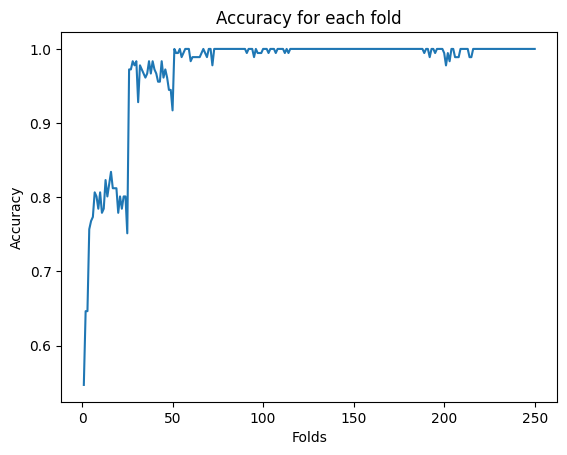

In [1]:
import torch
from torchvision import models, datasets, transforms
import os
import copy
from torch import nn, optim
from torch.utils.data import DataLoader, ConcatDataset
import time
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold

# Data augmentation and normalization for training
# Just normalization for validation
data_transforms = {
    'train': transforms.Compose([
        transforms.Resize((416, 416)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ]),
    'valid': transforms.Compose([
        transforms.Resize((416, 416)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ]),
    'test': transforms.Compose([
        transforms.Resize((416, 416)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ]),
}

data_dir = "/home/kevinluo/breast_density_classification/BD_data_newdis"
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x), data_transforms[x])
                  for x in ['train', 'valid', 'test']}

# Combine train and valid datasets
combined_dataset = ConcatDataset([image_datasets['train'], image_datasets['valid']])

# Get the labels for the entire dataset
labels = [label for _, label in combined_dataset]

# Initialize the StratifiedKFold object
skf = StratifiedKFold(n_splits=10)

# Get the indices for the splits
splits = list(skf.split(torch.zeros(len(labels)), labels))

device = torch.device("cuda:2" if torch.cuda.is_available() else "cpu")

def train_model(model, criterion, optimizer, num_epochs=25, accum_iter=4):
    since = time.time()

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0
    fold_acc = []

    for fold, (train_ids, valid_ids) in enumerate(splits):
        print(f"Fold {fold+1}")
        # SubsetRandomSampler
        train_subsampler = torch.utils.data.SubsetRandomSampler(train_ids)
        valid_subsampler = torch.utils.data.SubsetRandomSampler(valid_ids)

        dataloaders = {"train": DataLoader(combined_dataset, batch_size=32, sampler=train_subsampler),
                       "val": DataLoader(combined_dataset, batch_size=32, sampler=valid_subsampler),
                       "test": DataLoader(image_datasets['test'], batch_size=32)}

        for epoch in range(num_epochs):
            print('Epoch {}/{}'.format(epoch, num_epochs - 1))
            print('-' * 10)

            # Each epoch has a training and validation phase
            for phase in ['train', 'val']:
                if phase == 'train':
                    model.train()  # Set model to training mode
                else:
                    model.eval()   # Set model to evaluate mode

                running_loss = 0.0
                running_corrects = 0

                # Iterate over data.
                for i, (inputs, labels) in enumerate(dataloaders[phase]):
                    inputs = inputs.to(device)
                    labels = labels.to(device)

                    # zero the parameter gradients
                    optimizer.zero_grad()

                    # forward
                    # track history if only in train
                    with torch.set_grad_enabled(phase == 'train'):
                        outputs = model(inputs)
                        _, preds = torch.max(outputs, 1)
                        loss = criterion(outputs, labels)

                        # backward + optimize only if in training phase
                        if phase == 'train':
                            loss.backward()  # Backward pass
                            if (i+1) % accum_iter == 0:  # Wait for several backward steps
                                optimizer.step()  # Now we can do an optimizer step
                                optimizer.zero_grad()  # Reset gradients tensors

                    # statistics
                    running_loss += loss.item() * inputs.size(0)
                    running_corrects += torch.sum(preds == labels.data)

                epoch_loss = running_loss / len(dataloaders[phase].sampler)
                epoch_acc = running_corrects.double() / len(dataloaders[phase].sampler)

                print('{} Loss: {:.4f} Acc: {:.4f}'.format(phase, epoch_loss, epoch_acc))

                # deep copy the model
                if phase == 'val':
                    fold_acc.append(epoch_acc.item())
                    if epoch_acc > best_acc:
                        best_acc = epoch_acc
                        best_model_wts = copy.deepcopy(model.state_dict())
            
        print()

    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(time_elapsed // 60, time_elapsed % 60))
    print('Best val Acc: {:4f}'.format(best_acc))
    print('Average 10-fold Acc: {:4f}'.format(sum(fold_acc) / len(fold_acc)))

    # Plot accuracy for each fold
    plt.plot(range(1, len(fold_acc) + 1), fold_acc)
    plt.xlabel('Folds')
    plt.ylabel('Accuracy')
    plt.title('Accuracy for each fold')
    plt.show()

    # load best model weights
    model.load_state_dict(best_model_wts)
    return model

model_ft = models.densenet169(pretrained=True)
num_ftrs = model_ft.classifier.in_features
model_ft.classifier = nn.Linear(num_ftrs, 4)

model_ft = model_ft.to(device)

criterion = nn.CrossEntropyLoss()

# Observe that all parameters are being optimized
optimizer_ft = optim.SGD(model_ft.parameters(), lr=0.001, momentum=0.9)

model_ft = train_model(model_ft, criterion, optimizer_ft, num_epochs=25, accum_iter=4)


In [2]:
def evaluate_model(model, criterion):
    dataloaders = {"test": DataLoader(image_datasets['test'], batch_size=32)}
    model.eval()
    running_corrects = 0
    running_loss = 0.0

    # Iterate over data.
    for inputs, labels in dataloaders["test"]:
        inputs = inputs.to(device)
        labels = labels.to(device)

        # forward
        with torch.no_grad():
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            loss = criterion(outputs, labels)

        running_loss += loss.item() * inputs.size(0)
        running_corrects += torch.sum(preds == labels.data)

    test_loss = running_loss / len(dataloaders["test"].dataset)
    test_acc = running_corrects.double() / len(dataloaders["test"].dataset)

    print('Test Loss: {:.4f} Acc: {:.4f}'.format(test_loss, test_acc))


# Evaluate on test set
evaluate_model(model_ft, criterion)

Test Loss: 0.2073 Acc: 0.9405


In [1]:
import torch
from torchvision import models, datasets, transforms
import os
import copy
from torch import nn, optim
from torch.utils.data import DataLoader, ConcatDataset
import time
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold

# Data augmentation and normalization for training
# Just normalization for validation
data_transforms = {
    'train': transforms.Compose([
        transforms.Resize((416, 416)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ]),
    'valid': transforms.Compose([
        transforms.Resize((416, 416)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ]),
    'test': transforms.Compose([
        transforms.Resize((416, 416)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ]),
}

data_dir = "/home/kevinluo/breast_density_classification/INbreast"
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x), data_transforms[x])
                  for x in ['train', 'valid', 'test']}

# Combine train and valid datasets
combined_dataset = ConcatDataset([image_datasets['train'], image_datasets['valid']])

# Get the labels for the entire dataset
labels = [label for _, label in combined_dataset]

# Initialize the StratifiedKFold object
skf = StratifiedKFold(n_splits=10)

# Get the indices for the splits
splits = list(skf.split(torch.zeros(len(labels)), labels))

device = torch.device("cuda:2" if torch.cuda.is_available() else "cpu")

def train_model(model, criterion, optimizer, num_epochs=25, accum_iter=4):
    since = time.time()

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0
    fold_acc = []

    for fold, (train_ids, valid_ids) in enumerate(splits):
        print(f"Fold {fold+1}")
        # SubsetRandomSampler
        train_subsampler = torch.utils.data.SubsetRandomSampler(train_ids)
        valid_subsampler = torch.utils.data.SubsetRandomSampler(valid_ids)

        dataloaders = {"train": DataLoader(combined_dataset, batch_size=32, sampler=train_subsampler),
                       "val": DataLoader(combined_dataset, batch_size=32, sampler=valid_subsampler),
                       "test": DataLoader(image_datasets['test'], batch_size=32)}

        for epoch in range(num_epochs):
            print('Epoch {}/{}'.format(epoch, num_epochs - 1))
            print('-' * 10)

            # Each epoch has a training and validation phase
            for phase in ['train', 'val']:
                if phase == 'train':
                    model.train()  # Set model to training mode
                else:
                    model.eval()   # Set model to evaluate mode

                running_loss = 0.0
                running_corrects = 0

                # Iterate over data.
                for i, (inputs, labels) in enumerate(dataloaders[phase]):
                    inputs = inputs.to(device)
                    labels = labels.to(device)

                    # zero the parameter gradients
                    optimizer.zero_grad()

                    # forward
                    # track history if only in train
                    with torch.set_grad_enabled(phase == 'train'):
                        outputs = model(inputs)
                        _, preds = torch.max(outputs, 1)
                        loss = criterion(outputs, labels)

                        # backward + optimize only if in training phase
                        if phase == 'train':
                            loss.backward()  # Backward pass
                            if (i+1) % accum_iter == 0:  # Wait for several backward steps
                                optimizer.step()  # Now we can do an optimizer step
                                optimizer.zero_grad()  # Reset gradients tensors

                    # statistics
                    running_loss += loss.item() * inputs.size(0)
                    running_corrects += torch.sum(preds == labels.data)

                epoch_loss = running_loss / len(dataloaders[phase].sampler)
                epoch_acc = running_corrects.double() / len(dataloaders[phase].sampler)

                print('{} Loss: {:.4f} Acc: {:.4f}'.format(phase, epoch_loss, epoch_acc))

                # deep copy the model
                if phase == 'val':
                    fold_acc.append(epoch_acc.item())
                    if epoch_acc > best_acc:
                        best_acc = epoch_acc
                        best_model_wts = copy.deepcopy(model.state_dict())
            
        print()

    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(time_elapsed // 60, time_elapsed % 60))
    print('Best val Acc: {:4f}'.format(best_acc))
    print('Average 10-fold Acc: {:4f}'.format(sum(fold_acc) / len(fold_acc)))

    # Plot accuracy for each fold
    plt.plot(range(1, len(fold_acc) + 1), fold_acc)
    plt.xlabel('Folds')
    plt.ylabel('Accuracy')
    plt.title('Accuracy for each fold')
    plt.show()

    # load best model weights
    model.load_state_dict(best_model_wts)
    return model

model_ft = models.densenet169(pretrained=True)
num_ftrs = model_ft.classifier.in_features
model_ft.classifier = nn.Linear(num_ftrs, 4)

model_ft = model_ft.to(device)

criterion = nn.CrossEntropyLoss()

# Observe that all parameters are being optimized
optimizer_ft = optim.SGD(model_ft.parameters(), lr=0.001, momentum=0.9)

model_ft = train_model(model_ft, criterion, optimizer_ft, num_epochs=25, accum_iter=4)


KeyboardInterrupt: 

### INbreast test data acc

In [12]:
def evaluate_model(model, criterion):
    dataloaders = {"test": DataLoader(image_datasets['test'], batch_size=32)}
    model.eval()
    running_corrects = 0
    running_loss = 0.0

    # Iterate over data.
    for inputs, labels in dataloaders["test"]:
        inputs = inputs.to(device)
        labels = labels.to(device)

        # forward
        with torch.no_grad():
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            loss = criterion(outputs, labels)

        running_loss += loss.item() * inputs.size(0)
        running_corrects += torch.sum(preds == labels.data)

    test_loss = running_loss / len(dataloaders["test"].dataset)
    test_acc = running_corrects.double() / len(dataloaders["test"].dataset)

    print('Test Loss: {:.4f} Acc: {:.4f}'.format(test_loss, test_acc))


# Evaluate on test set
evaluate_model(model_ft, criterion)


Test Loss: 1.4206 Acc: 0.6923


/home/kevinluo/anaconda3/envs/yolov8/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/kevinluo/anaconda3/envs/yolov8/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DenseNet169_Weights.IMAGENET1K_V1`. You can also use `weights=DenseNet169_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Fold 1
Epoch 0/24
----------
train Loss: 1.1222 Acc: 0.3793
val Loss: 1.1149 Acc: 0.4138
Epoch 1/24
----------
train Loss: 1.1052 Acc: 0.3793
val Loss: 1.0872 Acc: 0.4138
Epoch 2/24
----------
train Loss: 1.0779 Acc: 0.4100
val Loss: 1.0521 Acc: 0.4483
Epoch 3/24
----------
train Loss: 1.0481 Acc: 0.5287
val Loss: 1.0553 Acc: 0.4483
Epoch 4/24
----------
train Loss: 1.0309 Acc: 0.5709
val Loss: 1.0536 Acc: 0.4138
Epoch 5/24
----------
train Loss: 1.0221 Acc: 0.4828
val Loss: 1.0506 Acc: 0.3793
Epoch 6/24
----------
train Loss: 0.9960 Acc: 0.5211
val Loss: 0.9831 Acc: 0.6207
Epoch 7/24
----------
train Loss: 0.9356 Acc: 0.7586
val Loss: 0.9471 Acc: 0.6897
Epoch 8/24
----------
train Loss: 0.9223 Acc: 0.5939
val Loss: 0.9445 Acc: 0.4483
Epoch 9/24
----------
train Loss: 0.9084 Acc: 0.5057
val Loss: 0.9185 Acc: 0.5172
Epoch 10/24
----------
train Loss: 0.8595 Acc: 0.5977
val Loss: 0.8721 Acc: 0.7241
Epoch 11/24
----------
train Loss: 0.7982 Acc: 0.7969
val Loss: 0.8544 Acc: 0.8276
Epoch 1

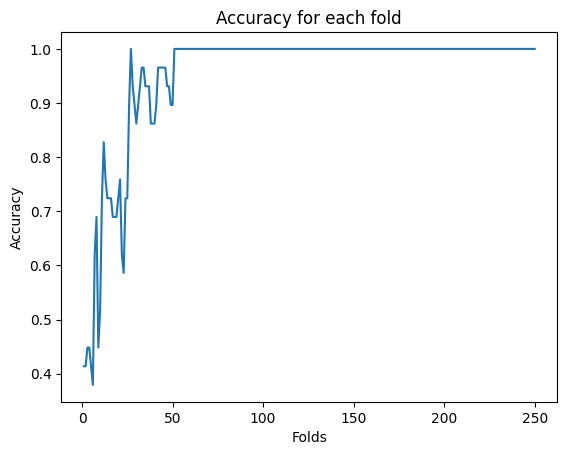

In [14]:
import torch
from torchvision import models, datasets, transforms
import os
import copy
from torch import nn, optim
from torch.utils.data import DataLoader, ConcatDataset
import time
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold

# Data augmentation and normalization for training
# Just normalization for validation
data_transforms = {
    'train': transforms.Compose([
        transforms.Resize((416, 416)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ]),
    'valid': transforms.Compose([
        transforms.Resize((416, 416)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ]),
    'test': transforms.Compose([
        transforms.Resize((416, 416)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ]),
}

data_dir = "/home/kevinluo/breast_density_classification/MIAS_BD_data"
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x), data_transforms[x])
                  for x in ['train', 'valid', 'test']}

# Combine train and valid datasets
combined_dataset = ConcatDataset([image_datasets['train'], image_datasets['valid']])

# Get the labels for the entire dataset
labels = [label for _, label in combined_dataset]

# Initialize the StratifiedKFold object
skf = StratifiedKFold(n_splits=10)

# Get the indices for the splits
splits = list(skf.split(torch.zeros(len(labels)), labels))

device = torch.device("cuda:2" if torch.cuda.is_available() else "cpu")

def train_model(model, criterion, optimizer, num_epochs=25, accum_iter=4):
    since = time.time()

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0
    fold_acc = []

    for fold, (train_ids, valid_ids) in enumerate(splits):
        print(f"Fold {fold+1}")
        # SubsetRandomSampler
        train_subsampler = torch.utils.data.SubsetRandomSampler(train_ids)
        valid_subsampler = torch.utils.data.SubsetRandomSampler(valid_ids)

        dataloaders = {"train": DataLoader(combined_dataset, batch_size=32, sampler=train_subsampler),
                       "val": DataLoader(combined_dataset, batch_size=32, sampler=valid_subsampler),
                       "test": DataLoader(image_datasets['test'], batch_size=32)}

        for epoch in range(num_epochs):
            print('Epoch {}/{}'.format(epoch, num_epochs - 1))
            print('-' * 10)

            # Each epoch has a training and validation phase
            for phase in ['train', 'val']:
                if phase == 'train':
                    model.train()  # Set model to training mode
                else:
                    model.eval()   # Set model to evaluate mode

                running_loss = 0.0
                running_corrects = 0

                # Iterate over data.
                for i, (inputs, labels) in enumerate(dataloaders[phase]):
                    inputs = inputs.to(device)
                    labels = labels.to(device)

                    # zero the parameter gradients
                    optimizer.zero_grad()

                    # forward
                    # track history if only in train
                    with torch.set_grad_enabled(phase == 'train'):
                        outputs = model(inputs)
                        _, preds = torch.max(outputs, 1)
                        loss = criterion(outputs, labels)

                        # backward + optimize only if in training phase
                        if phase == 'train':
                            loss.backward()  # Backward pass
                            if (i+1) % accum_iter == 0:  # Wait for several backward steps
                                optimizer.step()  # Now we can do an optimizer step
                                optimizer.zero_grad()  # Reset gradients tensors

                    # statistics
                    running_loss += loss.item() * inputs.size(0)
                    running_corrects += torch.sum(preds == labels.data)

                epoch_loss = running_loss / len(dataloaders[phase].sampler)
                epoch_acc = running_corrects.double() / len(dataloaders[phase].sampler)

                print('{} Loss: {:.4f} Acc: {:.4f}'.format(phase, epoch_loss, epoch_acc))

                # deep copy the model
                if phase == 'val':
                    fold_acc.append(epoch_acc.item())
                    if epoch_acc > best_acc:
                        best_acc = epoch_acc
                        best_model_wts = copy.deepcopy(model.state_dict())
            
        print()

    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(time_elapsed // 60, time_elapsed % 60))
    print('Best val Acc: {:4f}'.format(best_acc))
    print('Average 10-fold Acc: {:4f}'.format(sum(fold_acc) / len(fold_acc)))

    # Plot accuracy for each fold
    plt.plot(range(1, len(fold_acc) + 1), fold_acc)
    plt.xlabel('Folds')
    plt.ylabel('Accuracy')
    plt.title('Accuracy for each fold')
    plt.show()

    # load best model weights
    model.load_state_dict(best_model_wts)
    return model

model_ft = models.densenet169(pretrained=True)
num_ftrs = model_ft.classifier.in_features
model_ft.classifier = nn.Linear(num_ftrs, 3)

model_ft = model_ft.to(device)

criterion = nn.CrossEntropyLoss()

# Observe that all parameters are being optimized
optimizer_ft = optim.SGD(model_ft.parameters(), lr=0.001, momentum=0.9)

model_ft = train_model(model_ft, criterion, optimizer_ft, num_epochs=25, accum_iter=4)


In [15]:
def evaluate_model(model, criterion):
    dataloaders = {"test": DataLoader(image_datasets['test'], batch_size=32)}
    model.eval()
    running_corrects = 0
    running_loss = 0.0

    # Iterate over data.
    for inputs, labels in dataloaders["test"]:
        inputs = inputs.to(device)
        labels = labels.to(device)

        # forward
        with torch.no_grad():
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            loss = criterion(outputs, labels)

        running_loss += loss.item() * inputs.size(0)
        running_corrects += torch.sum(preds == labels.data)

    test_loss = running_loss / len(dataloaders["test"].dataset)
    test_acc = running_corrects.double() / len(dataloaders["test"].dataset)

    print('Test Loss: {:.4f} Acc: {:.4f}'.format(test_loss, test_acc))


# Evaluate on test set
evaluate_model(model_ft, criterion)


Test Loss: 0.4358 Acc: 0.8783
